In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Train dataset
train = pd.read_csv("/content/drive/MyDrive/train.csv", header=None)


In [ ]:
train.shape

(246008, 122)

In [ ]:
num_cols = len(train.columns)

In [ ]:
train.columns = ["col" + str(i+1) for i in range(num_cols)]


In [ ]:
print(train.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10',
       ...
       'col113', 'col114', 'col115', 'col116', 'col117', 'col118', 'col119',
       'col120', 'col121', 'col122'],
      dtype='object', length=122)


In [ ]:
train.head()

col1  col2    col3    col4  col5 col6  col7    col8  col9  col10  ...  \
0   69769  -946  0.1613  0.7960  Panl    N  Bus2  0.0742     0      2  ...   
1  236977   -92     NaN     NaN   NaN    Y  Othr     NaN     0      3  ...   
2  168821 -1646  0.1124  0.8504  Panl    N  Bus3  0.0387     0      2  ...   
3   94708 -1651  0.0263     NaN  Blok    N  Bus3     NaN     0      2  ...   
4   84556  -977     NaN     NaN   NaN    N  Rest     NaN     0      2  ...   

   col113  col114  col115  col116 col117  col118 col119  col120  col121  \
0     1.0   -4670  0.9851     0.0      0    Mard    0.0  0.3333       0   
1     NaN   -1994     NaN     NaN      0    Mard    0.0     NaN       0   
2     2.0   -2842  0.9891     0.0      0    Sind    0.0  0.3750       0   
3     4.0   -1345  0.9682     0.0      0    Sind    0.0  0.0417       0   
4     NaN    -852     NaN     NaN      0    Sind    0.0     NaN       0   

   col122  
0       0  
1       0  
2       1  
3       1  
4       0  

[5 rows x 122 columns]

In [ ]:
# set thresehold for peercentage of missing values
threshold = 0.2

# calculate number of missing values for each column
num_missing = train.isnull().sum()

# calculate percentage of missing values for each column
pct_missing = num_missing / len(train)

# create list of columns to drop
to_drop = list(pct_missing[pct_missing > threshold].index)

# drop columns with too many missing values
train.drop(to_drop, axis=1, inplace=True)

Veri temizliği yapıyoruz.
threshold değişkeni, kabul edilebilir maksimum eksik değer yüzdesini belirler. Bu değerden daha yüksek bir eksik değer yüzdesine sahip sütunlar çıkarılacaktır.



num_missing değişkeni, her bir sütundaki eksik değer sayısını hesaplar. df.isnull().sum() ifadesi ile her sütunda kaç adet eksik değer olduğu bulunur.


pct_missing değişkeni, her bir sütundaki eksik değer yüzdesini hesaplar. num_missing'i toplam veri seti boyutuna bölerek yüzde cinsinden eksik değer oranını elde ederiz.

to_drop değişkeni, pct_missing üzerinde belirtilen eşiğin üzerindeki sütunların listesini oluşturur.

df.drop(to_drop, axis=1, inplace=True) ifadesi, to_drop listesindeki sütunları veri çerçevesinden çıkarır. axis=1 argümanı, sütunların silinmesini belirtir. inplace=True argümanı, veri çerçevesini doğrudan değiştirir.


Bu kod, eksik değerlere sahip sütunları çıkarmak için kullanılan bir yaklaşımdır. Eksik değerleri olan sütunların analiz veya modelleme süreçlerinde yanlış sonuçlara veya performans düşüklüğüne yol açabileceği durumlarda tercih edilebilir.

In [ ]:
train.shape

(246008, 72)

In [ ]:
# get data types of each column
dtypes = train.dtypes

# create 3 groups based on data types
continuous = []
binary = []
categorical = []
label = []

for col in train.columns:
    unique_values = train[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("col122")
label.append("col122")

In [ ]:
# print the 3 groups and their lengths
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)
print("Label:", len(label), label)

#This snippet is used to print grouped variables and the length of each group.

Continuous variables: 28 ['col1', 'col2', 'col10', 'col13', 'col14', 'col26', 'col28', 'col35', 'col36', 'col38', 'col41', 'col42', 'col46', 'col54', 'col58', 'col59', 'col64', 'col67', 'col71', 'col73', 'col74', 'col84', 'col86', 'col91', 'col100', 'col113', 'col114', 'col119']
Binary variables: 32 ['col9', 'col16', 'col20', 'col21', 'col24', 'col25', 'col27', 'col29', 'col30', 'col34', 'col43', 'col47', 'col51', 'col53', 'col56', 'col63', 'col65', 'col66', 'col72', 'col76', 'col77', 'col82', 'col95', 'col98', 'col99', 'col101', 'col105', 'col106', 'col107', 'col109', 'col117', 'col121']
Categorical variables: 11 ['col6', 'col7', 'col17', 'col31', 'col32', 'col48', 'col68', 'col70', 'col94', 'col104', 'col118']
Label: 1 ['col122']


In [ ]:
from sklearn.preprocessing import LabelEncoder

#In this way, we can convert categorical data to numeric values using the LabelEncoder class and make it usable in machine learning algorithms.

In [ ]:
# create a label encoder object
le = LabelEncoder()

# loop through each categorical variable and encode it
for col in categorical:
    train[col] = le.fit_transform(train[col])

# move any variables with only two possible values to the binary group
for col in categorical:
    if len(train[col].unique()) == 2:
        categorical.remove(col)
        binary.append(col)

In [ ]:
# print the 3 groups and their lengths
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)

Continuous variables: 28 ['col1', 'col2', 'col10', 'col13', 'col14', 'col26', 'col28', 'col35', 'col36', 'col38', 'col41', 'col42', 'col46', 'col54', 'col58', 'col59', 'col64', 'col67', 'col71', 'col73', 'col74', 'col84', 'col86', 'col91', 'col100', 'col113', 'col114', 'col119']
Binary variables: 35 ['col9', 'col16', 'col20', 'col21', 'col24', 'col25', 'col27', 'col29', 'col30', 'col34', 'col43', 'col47', 'col51', 'col53', 'col56', 'col63', 'col65', 'col66', 'col72', 'col76', 'col77', 'col82', 'col95', 'col98', 'col99', 'col101', 'col105', 'col106', 'col107', 'col109', 'col117', 'col121', 'col6', 'col48', 'col104']
Categorical variables: 8 ['col7', 'col17', 'col31', 'col32', 'col68', 'col70', 'col94', 'col118']


In [ ]:
# Fill missing values in continuous columns with median
for col in continuous:
    train[col].fillna(train[col].median(), inplace=True)

# Fill missing values in binary columns with mode
for col in binary:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Fill missing values in categorical columns with mode
for col in categorical:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Fill missing values in "col122" with mode
train["col122"].fillna(train["col122"].mode()[0], inplace=True)

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
train.head()

col1  col2  col6  col7  col9  col10  col13     col14  col16  col17  ...  \
0   69769  -946     0     4     0      2    0.0  180000.0      0      6  ...   
1  236977   -92     1    30     0      3    0.0  135000.0      0      6  ...   
2  168821 -1646     0     5     0      2    0.0  553500.0      0      5  ...   
3   94708 -1651     0     5     0      2    0.0  391500.0      0      6  ...   
4   84556  -977     0    35     0      2    0.0  225000.0      0      6  ...   

   col106  col107  col109  col113  col114  col117  col118  col119  col121  \
0       0       0       0     1.0   -4670       0       1     0.0       0   
1       0       0       0     1.0   -1994       0       1     0.0       0   
2       0       0       0     2.0   -2842       0       3     0.0       0   
3       0       0       0     4.0   -1345       0       3     0.0       0   
4       0       0       0     1.0    -852       0       3     0.0       0   

   col122  
0       0  
1       0  
2       1  
3       1  
4       0  

[5 rows x 72 columns]

In [ ]:
train["col122"].value_counts()

0    226148
1     19860
Name: col122, dtype: int64

In [ ]:
train["col122"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: col122, dtype: float64

In [ ]:

# Check if each column is numerical
is_numerical = train.apply(pd.to_numeric, errors='coerce').notnull().all()

# Get the columns that are numerical
numerical_columns = is_numerical[is_numerical].index.tolist()

# Get the columns that are not numerical
non_numerical_columns = is_numerical[~is_numerical].index.tolist()

# Print the results
print("Numerical columns:", numerical_columns)
print("Non-numerical columns:", non_numerical_columns)


Numerical columns: ['col1', 'col2', 'col6', 'col7', 'col9', 'col10', 'col13', 'col14', 'col16', 'col17', 'col20', 'col21', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col34', 'col35', 'col36', 'col38', 'col41', 'col42', 'col43', 'col46', 'col47', 'col48', 'col51', 'col53', 'col54', 'col56', 'col58', 'col59', 'col63', 'col64', 'col65', 'col66', 'col67', 'col68', 'col70', 'col71', 'col72', 'col73', 'col74', 'col76', 'col77', 'col82', 'col84', 'col86', 'col91', 'col94', 'col95', 'col98', 'col99', 'col100', 'col101', 'col104', 'col105', 'col106', 'col107', 'col109', 'col113', 'col114', 'col117', 'col118', 'col119', 'col121', 'col122']
Non-numerical columns: []


In this code, we first loop through the continuous list and fill missing values in each continuous column with its median using the fillna method and median() function.

Next, we loop through the binary list and categorical list separately, and fill missing values in binary and categorical columns with their respective modes using the mode() function.

Finally, we explicitly fill missing values in the "col122" column with its mode using the mode()[0] indexing.

By setting inplace=True, the changes are made directly to the train DataFrame.

This code fills missing values in the continuous columns with the median and missing values in binary, categorical, and specifically "col122" columns with their respective modes.






In [ ]:
missing_values = train.isnull().sum().sum()

if missing_values > 0:
    print("There are missing values in the train dataset.")
    print("Total number of missing values:", missing_values)
else:
    print("There are no missing values in the train dataset.")


There are no missing values in the train dataset.


In [ ]:
# Calculate the correlation matrix
corr_matrix = train.corr().round(2)

# Filter the matrix to show only the values that meet the condition
corr_filtered = corr_matrix[abs(corr_matrix) > 0.80]


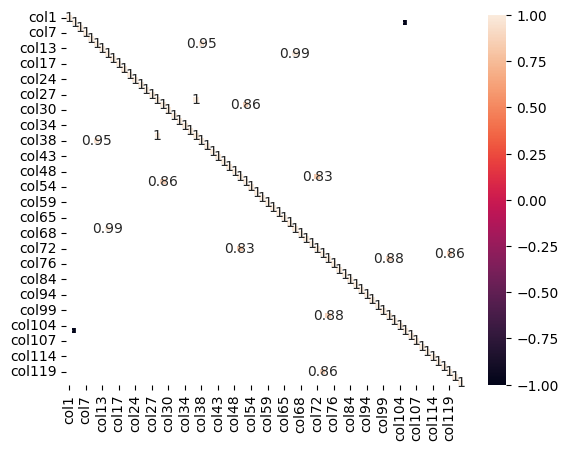

In [ ]:
# Plot the filtered correlation matrix using seaborn's heatmap
sns.heatmap(corr_filtered, annot=True)
plt.show()

In [ ]:
# Identify highly correlated feature pairs based on the threshold
high_corr_pairs = []
threshold = 0.8
for i in range(len(train.columns)):
    for j in range(i+1, len(train.columns)):
        if corr_matrix.iloc[i,j] >= threshold:
            high_corr_pairs.append((train.columns[i], train.columns[j]))

In [ ]:
high_corr_pairs

[('col10', 'col38'),
 ('col14', 'col67'),
 ('col28', 'col36'),
 ('col29', 'col53'),
 ('col51', 'col72'),
 ('col73', 'col119'),
 ('col74', 'col100')]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import numpy as np

# Calculate standard deviation
def calculate_std(X):
    std = np.std(X, axis=0)
    return std

for pair in high_corr_pairs:
    if pair[0] in train.columns and pair[1] in train.columns:
        if pair[0] in continuous:
            train = train.drop(pair[1], axis=1)
        elif pair[1] in continuous:
            train = train.drop(pair[0], axis=1)
        else:
            std_pair_0 = calculate_std(train[pair[0]].values)
            std_pair_1 = calculate_std(train[pair[1]].values)
            if std_pair_0 >= std_pair_1:
                train = train.drop(pair[1], axis=1)
            else:
                train = train.drop(pair[0], axis=1)
#Çİftlerden standart devisionı düşük olanı sildik.


In this example, we calculate the correlation matrix for all features in the dataframe, and then identify highly correlated feature pairs with a threshold of 0.8. We then drop one feature from each highly correlated pair, giving priority to continuous features, as they are more likely to be important for most machine learning algorithms. If both features are continuous, we drop the one with a higher VIF score. If both features have the same VIF score, we drop the first one.

In [ ]:
train.head()

col1  col2  col6  col7  col9  col10  col13     col14  col16  col17  ...  \
0   69769  -946     0     4     0      2    0.0  180000.0      0      6  ...   
1  236977   -92     1    30     0      3    0.0  135000.0      0      6  ...   
2  168821 -1646     0     5     0      2    0.0  553500.0      0      5  ...   
3   94708 -1651     0     5     0      2    0.0  391500.0      0      6  ...   
4   84556  -977     0    35     0      2    0.0  225000.0      0      6  ...   

   col105  col106  col107  col109  col113  col114  col117  col118  col121  \
0       1       0       0       0     1.0   -4670       0       1       0   
1       1       0       0       0     1.0   -1994       0       1       0   
2       1       0       0       0     2.0   -2842       0       3       0   
3       1       0       0       0     4.0   -1345       0       3       0   
4       1       0       0       0     1.0    -852       0       3       0   

   col122  
0       0  
1       0  
2       1  
3       1  
4       0  

[5 rows x 65 columns]

In [ ]:

# Select the data for the respective columns
column_10 = train.iloc[:, 10]   # Index 8 corresponds to "col9"
column_38 = train.iloc[:, 38]  # Index 35 corresponds to "col36"

# Calculate the standard deviations
std_dev_10 = column_10.std()
std_dev_38 = column_38.std()

# Find the column with the lowest standard deviation
if std_dev_10 < std_dev_38:
    lowest_std_dev_column = "col10"
else:
    lowest_std_dev_column = "col38"

print("Column with the lowest standard deviation: ", lowest_std_dev_column)


Column with the lowest standard deviation:  col10


In [ ]:
# İlgili sütunu seçin
column_38 = train.iloc[:, 37]

# Sütunun benzersiz değerlerini sayın
unique_values_count = column_38.nunique()

# Sütunun benzersiz değerlerin yüzdesini hesaplayın
unique_values_percentage = unique_values_count / len(column_38)

# Eşik değeri
threshold = 0.05

# Kategorik veya sürekli olduğunu tahmin edin
if unique_values_percentage < threshold:
    column_type = "Categorical"
else:
    column_type = "Continuous"

print("38. sütunun tahmin edilen türü: ", column_type)


38. sütunun tahmin edilen türü:  Categorical


Datanın içerisindeki korelasyon değeri yüksek olan çiftlerden ikisini aldık ve inceledik. İncelerken categorical mı yoksa continous mu olduğuna dikkat ettik. Çiftlerdeki continous değerlerini tuttuk.

Genel olarak, bir veri setindeki değişkenler iki tür veri olabilir: sayısal (continuous) ve kategorik (categorical) veriler. Sayısal veriler, gerçek sayılar veya sayısal değerler içerirken, kategorik veriler, bir sınıflandırma kategorisi içeren niteliksel verilerdir.

Veri setindeki değişkenlerin türü, veri analizi yöntemlerinin seçiminde önemli bir rol oynar. Örneğin, veri setindeki bir değişken sayısal veri içeriyorsa, bu değişkenin dağılımını ve aralığını gözlemleyebilir ve örneğin ortalamayı, standart sapmayı ve benzeri istatistikleri hesaplayabilirsiniz. Bu tür verilerle yapılacak analizlerin çoğu, istatistiksel yöntemler veya makine öğrenimi algoritmaları kullanarak gerçekleştirilir.

Öte yandan, kategorik verilerin analizi, sınıflandırma algoritmaları veya kategorik verilerin dağılımını incelemek gibi farklı yöntemler gerektirir.

Bu nedenle, veri setindeki değişkenlerin türünü belirlemek, veri analizi sürecinde yapılacak işlemlerin doğru bir şekilde seçilmesinde önemli bir adımdır. Bu açıdan bakıldığında, continuous olan bir değişkenin incelenmesi, verinin daha iyi anlaşılmasına ve uygun analiz yöntemlerinin seçilmesine yardımcı olabilir.

In [ ]:
# Sütun adlarını alın
column_names = train.columns.tolist()

# Sütun adlarını ekrana yazdırın
print("Sütun Adları:")
for column_name in column_names:
    print(column_name)

Sütun Adları:
col1
col2
col6
col7
col9
col10
col13
col14
col16
col17
col20
col21
col24
col25
col26
col27
col28
col30
col31
col32
col34
col35
col41
col42
col43
col46
col47
col48
col53
col54
col56
col58
col59
col63
col64
col65
col66
col68
col70
col71
col72
col73
col74
col76
col77
col82
col84
col86
col91
col94
col95
col98
col99
col101
col104
col105
col106
col107
col109
col113
col114
col117
col118
col121
col122


In [ ]:
twouniquevalue = [col for col in train.columns if train[col].nunique() == 2]
twouniquevalue.remove("col122")
label = ["col122"]

morethan30 = [col for col in train.columns if col not in twouniquevalue and col != "col122" and train[col].nunique() > 30]

leftover = [col for col in train.columns if col not in twouniquevalue and col != "col122" and col not in morethan30]


Bu kod, veri setindeki sütunları döngü kullanarak kontrol eder ve her bir sütunun benzersiz değer sayısına göre ilgili listeye ekler. İki benzersiz değere sahip sütunlar binary_feats listesine eklenirken, 30'dan fazla benzersiz değere sahip olanlar continuous_feats listesine eklenir. Geri kalan sütunlar ise categorical_feats listesine eklenir.

Son olarak, "col122" sütunu binary_feats listesinden çıkarılır ve label listesine eklenir.

Bu şekilde, veri setindeki sütunları benzersiz değer sayısına göre gruplara ayırabilir ve ilgili listeleri basit bir şekilde doldurabilirsiniz.

"30" genellikle bir kural olarak kullanılan bir eşik değerdir. Eğer bir özellik (sütun) 30'dan fazla benzersiz değere sahipse, genellikle kategorik bir özellik olarak kabul edilmez ve continuous (sürekli) bir özellik olarak değerlendirilir. Bu eşik değeri, özelliklerin doğasına ve veri setinin gereksinimlerine bağlı olarak değiştirilebilir.

Örneğin, daha geniş bir veri setiyle çalışırken veya farklı bir problemdeyseniz, eşik değeri olarak farklı bir sayı seçebilirsiniz. Bazı durumlarda, 10 veya 20 gibi daha küçük bir değer daha uygun olabilir. Önemli olan, özellikleri doğru bir şekilde sınıflandırmak ve analiz etmek için bir eşik değeri belirlemektir.

Bu nedenle, hangi eşik değerini kullanacağınız veri setinizin özelliklerine ve analiz amacınıza bağlı olarak değişebilir. Veri setinize ve gereksinimlerinize en uygun eşik değerini belirlemek için veriyi anlamak ve keşfetmek önemlidir.

In [ ]:
print("Continuous Features: ", morethan30)
print("Categorical Features: ", leftover)
print("Binary Features: ", twouniquevalue)

Continuous Features:  ['col1', 'col2', 'col7', 'col14', 'col26', 'col28', 'col41', 'col54', 'col58', 'col59', 'col64', 'col71', 'col86', 'col114']
Categorical Features:  ['col10', 'col13', 'col17', 'col31', 'col32', 'col35', 'col42', 'col46', 'col68', 'col70', 'col73', 'col74', 'col84', 'col91', 'col94', 'col113', 'col118']
Binary Features:  ['col6', 'col9', 'col16', 'col20', 'col21', 'col24', 'col25', 'col27', 'col30', 'col34', 'col43', 'col47', 'col48', 'col53', 'col56', 'col63', 'col65', 'col66', 'col72', 'col76', 'col77', 'col82', 'col95', 'col98', 'col99', 'col101', 'col104', 'col105', 'col106', 'col107', 'col109', 'col117', 'col121']


`kstest`, scipy kütüphanesinde bulunan bir fonksiyondur ve Kolmogorov-Smirnov (KS) testini gerçekleştirmek için kullanılır. Kolmogorov-Smirnov testi, bir veri setinin belirli bir teorik dağılıma uygun olup olmadığını değerlendirmek için kullanılan bir istatistiksel testtir.

KS testi, bir kümülatif dağılım fonksiyonu (CDF) ile bir veri setinin empirik kümülatif dağılım fonksiyonu (ECDF) arasındaki maksimum farkı ölçer. Test istatistiği olarak, bu maksimum farkın büyüklüğü kullanılır. Eğer test istatistiği, bir belirli kritik değeri aşarsa veya altına düşerse, bu durumda veri setinin test edilen teorik dağılıma uymadığı sonucuna varılır.

`kstest` fonksiyonu, bir veri setinin belirli bir dağılıma uygun olup olmadığını test etmek için kullanılır. Fonksiyon, veri seti ve test edilmek istenen teorik dağılım (örneğin, normal dağılım) arasındaki maksimum farkı ve buna karşılık gelen p-değerini hesaplar. P-değeri, test istatistiğinin null hipotezi (veri setinin test edilen teorik dağılıma uymadığı) karşısındaki anlamlılığını gösterir.

Örneğin, `kstest(data, 'norm')` kodu, `data` adlı bir veri setinin normal dağılıma uygun olup olmadığını test eder. Fonksiyon, KS testi istatistiğini ve p-değerini döndürür. P-değeri, veri setinin normal dağılıma uygun olup olmadığı konusunda istatistiksel bir karar vermek için kullanılabilir.

In [ ]:
from scipy.stats import kstest

In [ ]:

alpha = 0.05

numeric_columns = train.select_dtypes(include=np.number).columns

for column in numeric_columns:
    ks_statistic, p_value = kstest(train[column], 'norm')

    print("Column:", column)
    print("KS Statistic:", ks_statistic)
    print("p-value:", p_value)

    if p_value > 0.05:
        print("Veri normal dağılıma uyuyor (H0 kabul ediliyor)")
    else:
        print("Veri normal dağılıma uymuyor (H0 reddediliyor)")

    print("------------------------")

Column: col1
KS Statistic: 0.9999834537145951
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col2
KS Statistic: 0.8205299400077237
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col6
KS Statistic: 0.5
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col7
KS Statistic: 0.9811466061470958
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col9
KS Statistic: 0.5
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col10
KS Statistic: 0.8661843742467413
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col13
KS Statistic: 0.5
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col14
KS Statistic: 1.0
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: c

Bu kod parçası, `scipy.stats` kütüphanesinden `kstest` fonksiyonunu kullanarak bir veri setinin normal dağılıma uygun olup olmadığını değerlendirmek için yazılmıştır. Burada `alpha = 0.05` olarak belirlenen bir anlamlılık düzeyi kullanılır.

Aşağıdaki adımları izler:

1. İlk olarak, `train` veri kümesi üzerinde sayısal sütunları seçer (`select_dtypes(include=np.number)`). Bu, yalnızca sayısal veri tiplerine sahip sütunları alır ve normal dağılım testini uygulayacaktır.

2. Daha sonra, her bir sayısal sütun için `kstest` fonksiyonu kullanılarak normal dağılım testi yapılır. `kstest` fonksiyonu, bir veri setinin belirli bir dağılıma (bu durumda normal dağılım) uygunluğunu test etmek için Kolmogorov-Smirnov testini uygular.

3. Her bir sütun için hesaplanan Kolmogorov-Smirnov istatistiği (`ks_statistic`) ve p-değeri (`p_value`) yazdırılır.

4. Son olarak, p-değeri (`p_value`) belirlenen anlamlılık düzeyine (`alpha`) göre karşılaştırılır. Eğer p-değeri (`p_value`) anlamlılık düzeyinden büyükse (`p_value > 0.05`), o zaman "Veri normal dağılıma uyuyor (H0 kabul ediliyor)" yazdırılır. Eğer p-değeri (`p_value`) anlamlılık düzeyinden küçükse (`p_value <= 0.05`), o zaman "Veri normal dağılıma uymuyor (H0 reddediliyor)" yazdırılır.

Bu kod parçası, veri setindeki sayısal sütunların normal dağılıma uygun olup olmadığını değerlendirmek için istatistiksel bir test yapar. Normal dağılıma uymayan veri setleri, analizlerin sonuçlarını etkileyebilir ve bazı istatistiksel yöntemlerin doğruluğunu etkileyebilir. Bu nedenle, normal dağılım testi, veri setinin istatistiksel özelliklerini anlamak ve uygun analiz yöntemlerini seçmek için önemlidir.

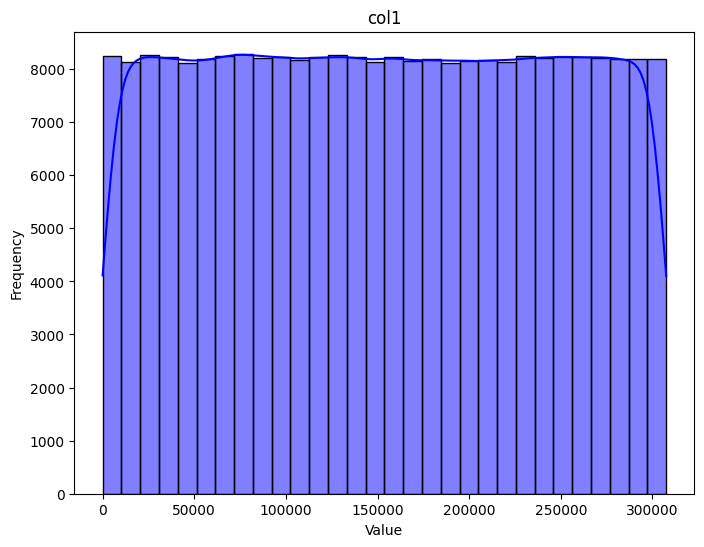

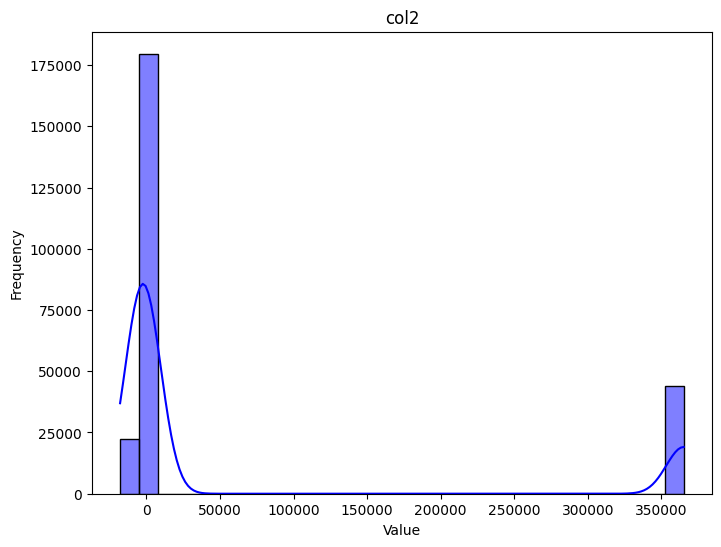

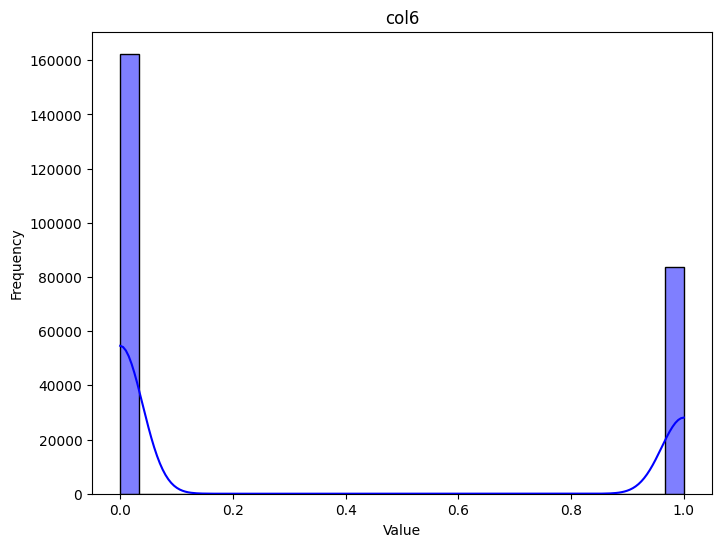

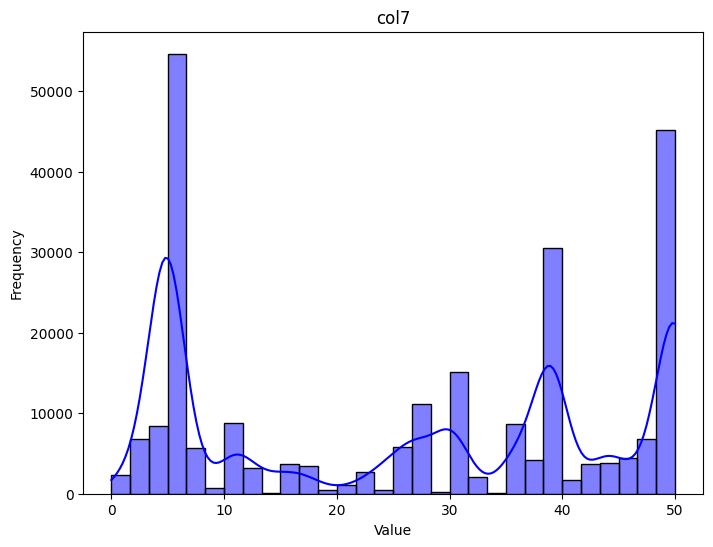

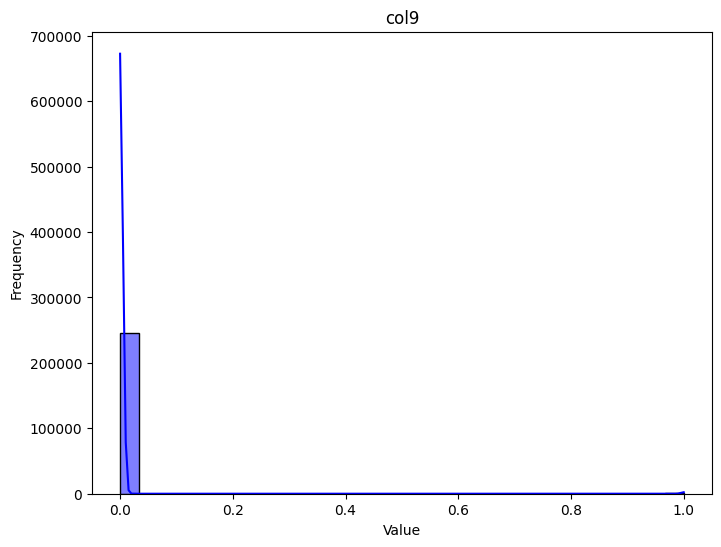

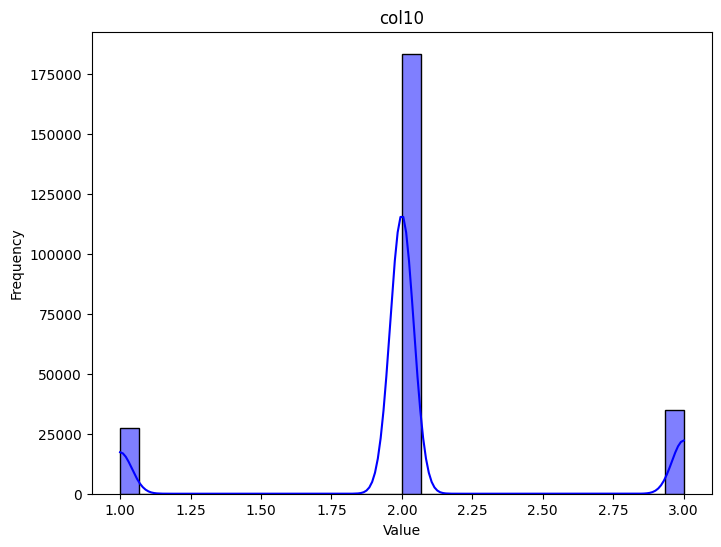

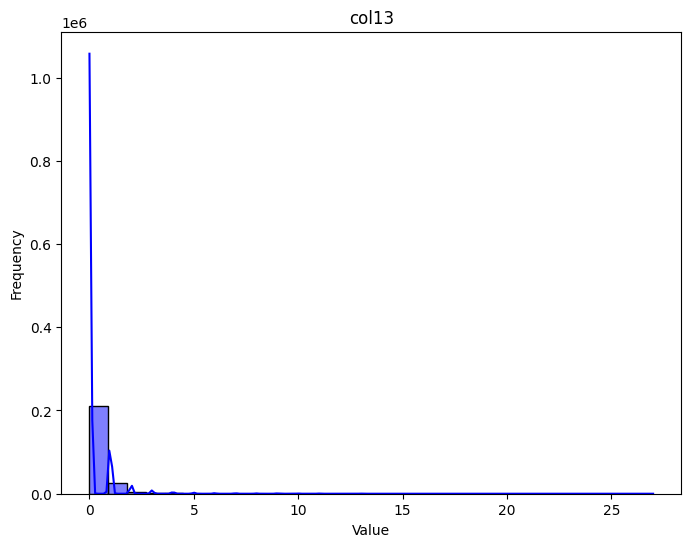

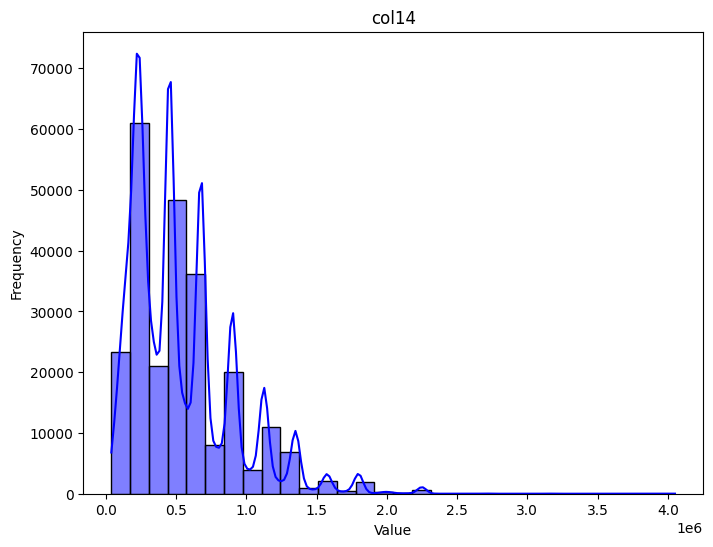

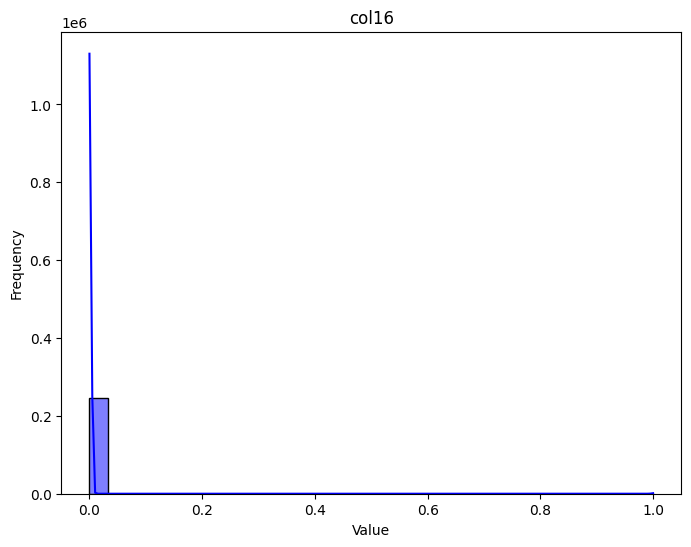

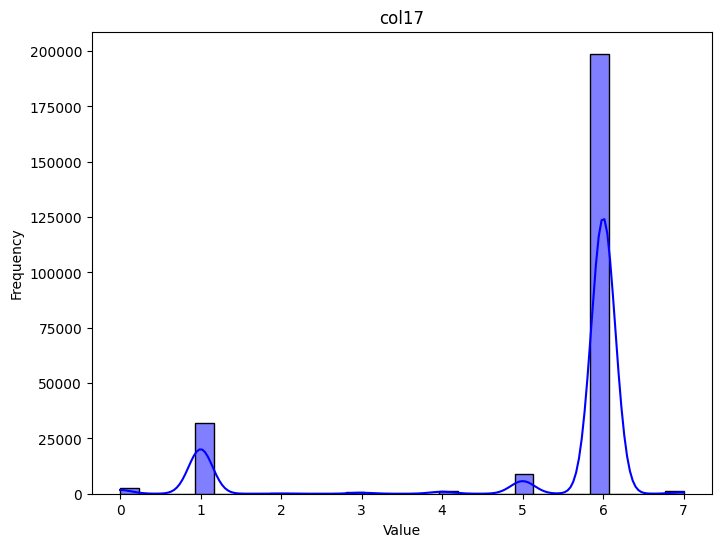

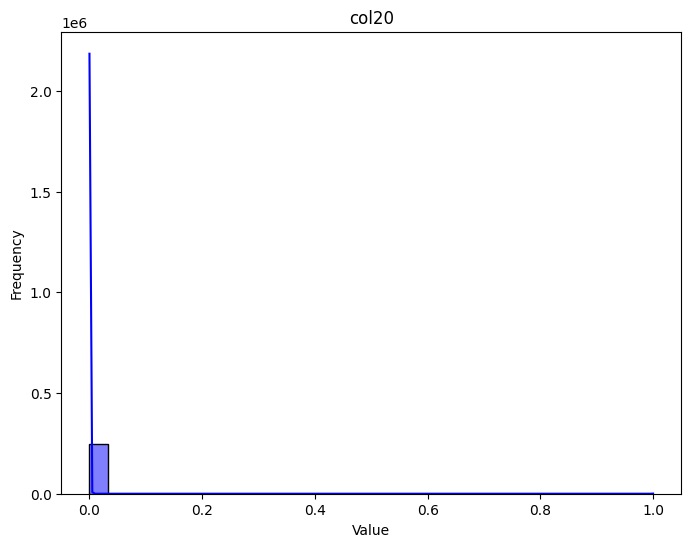

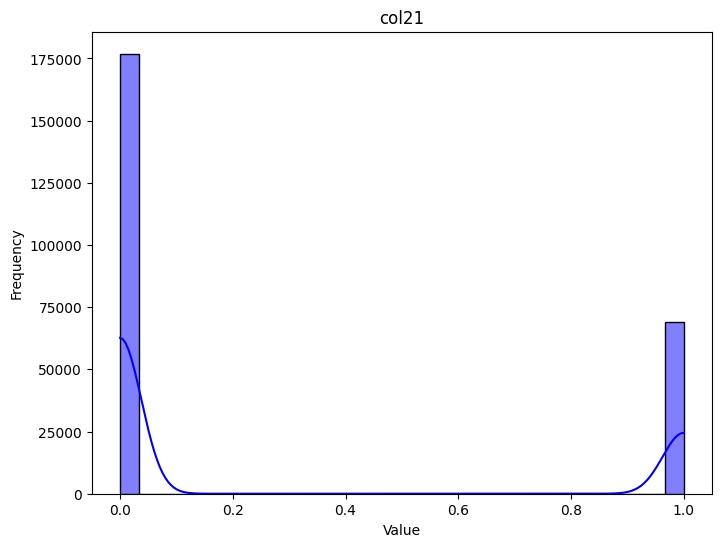

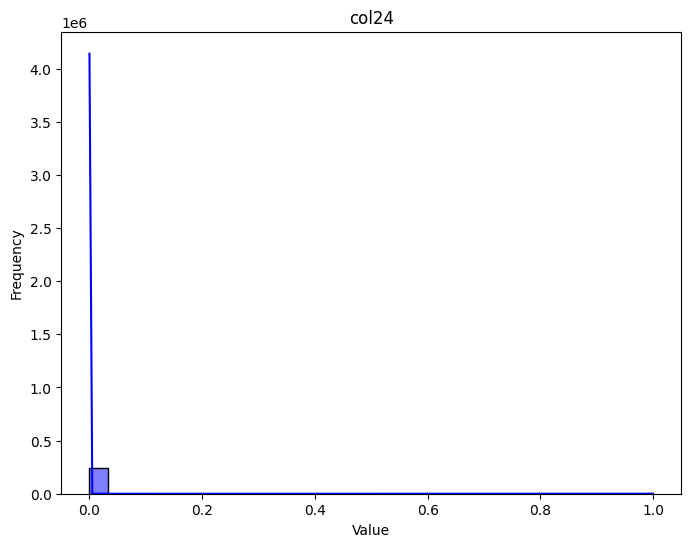

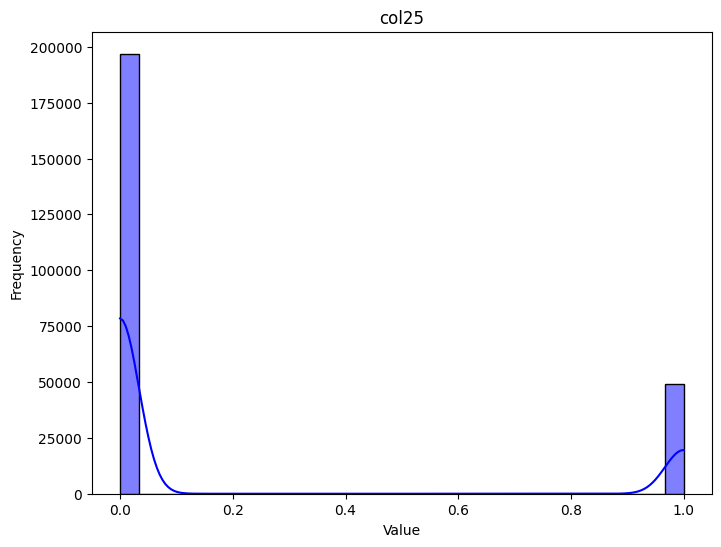

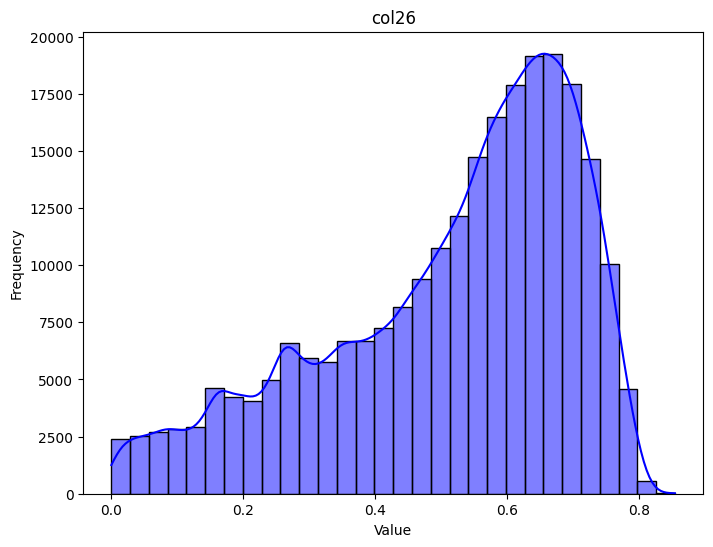

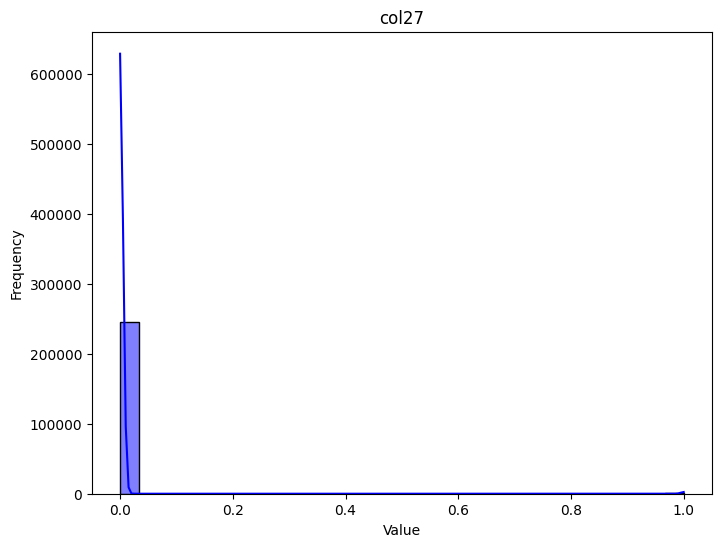

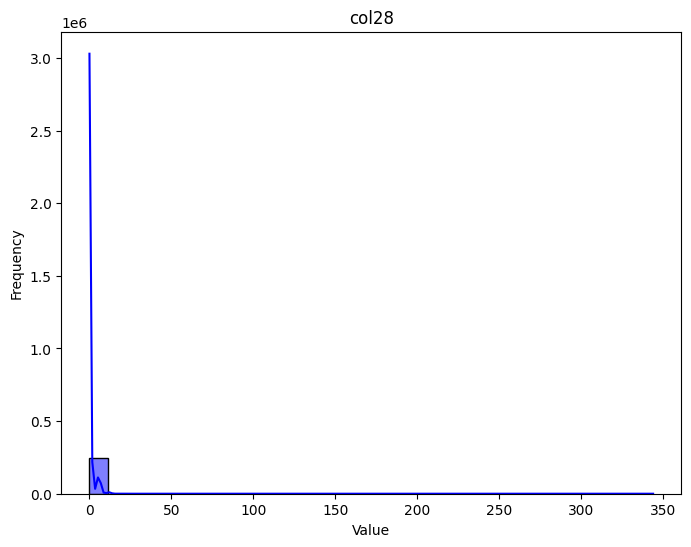

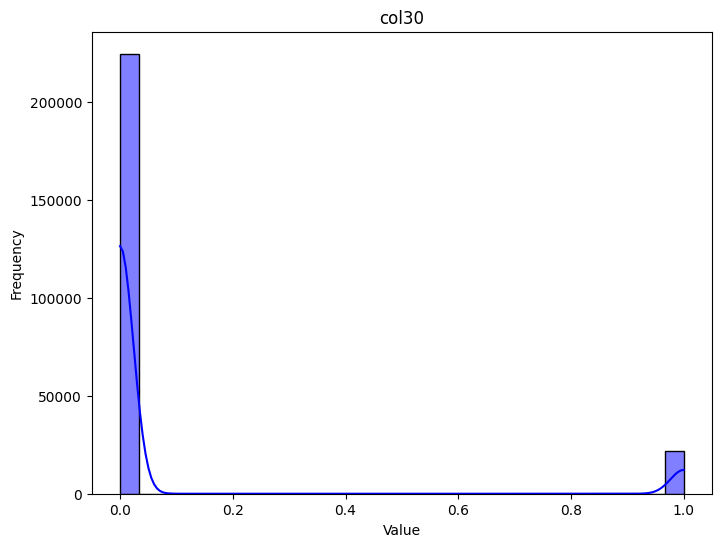

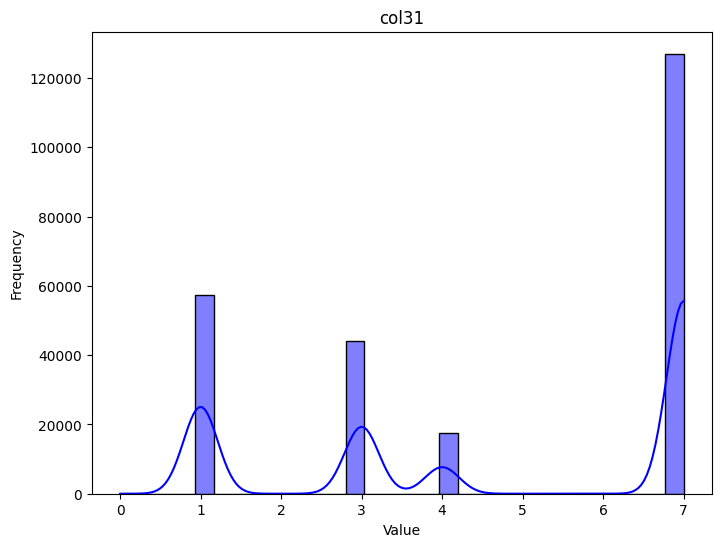

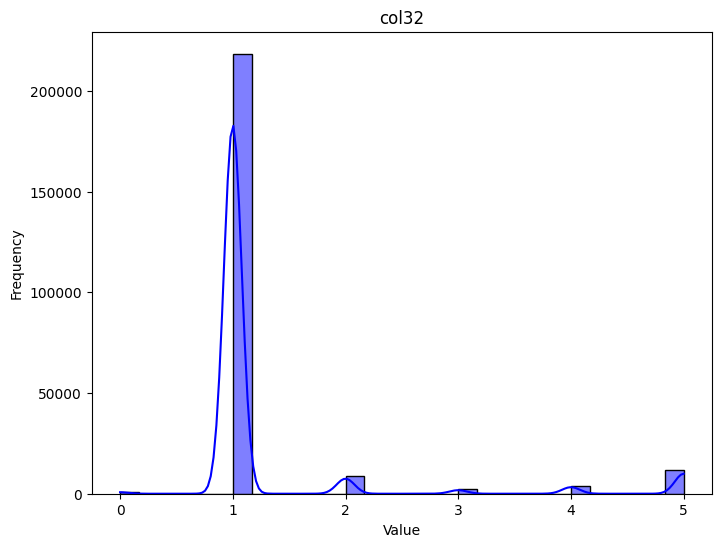

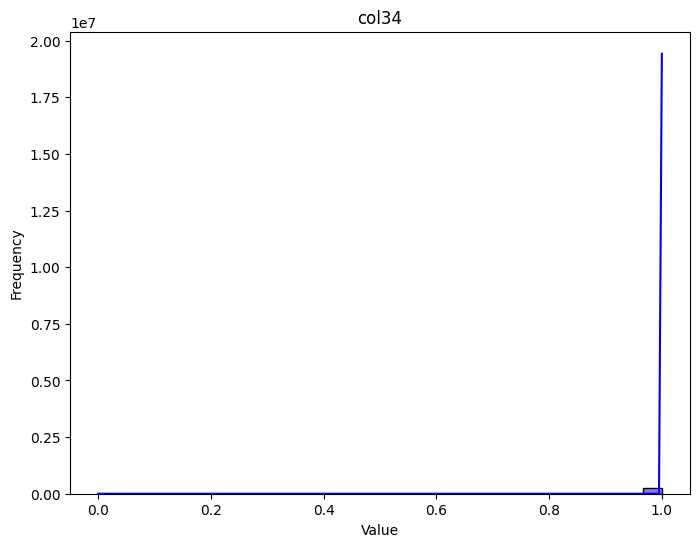

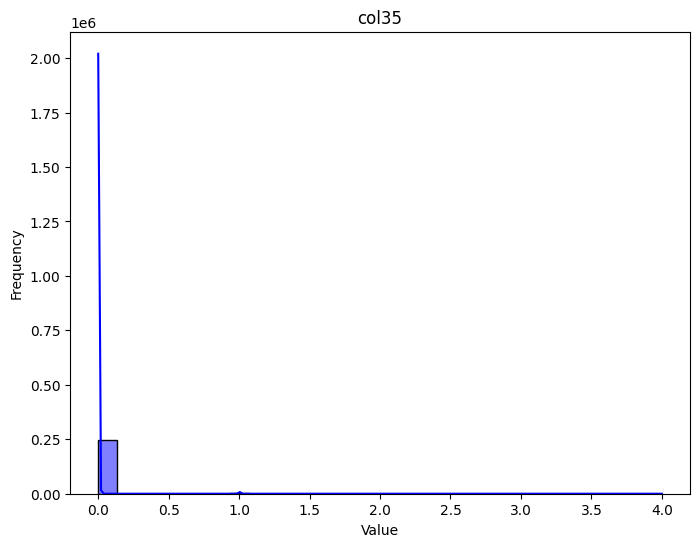

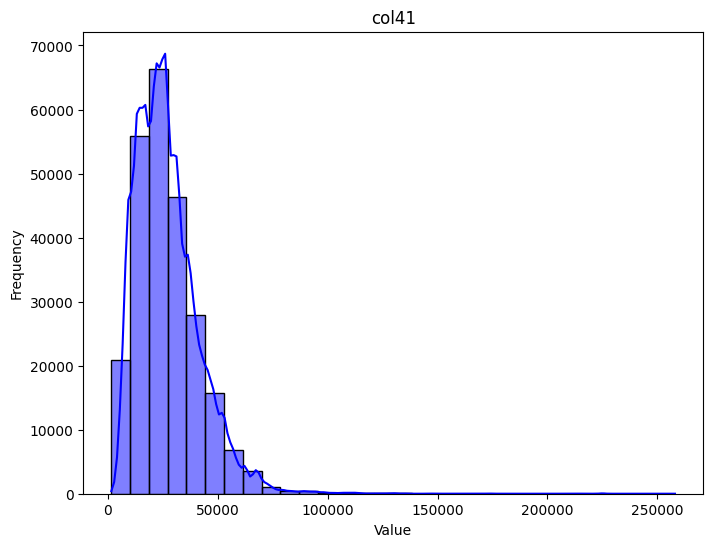

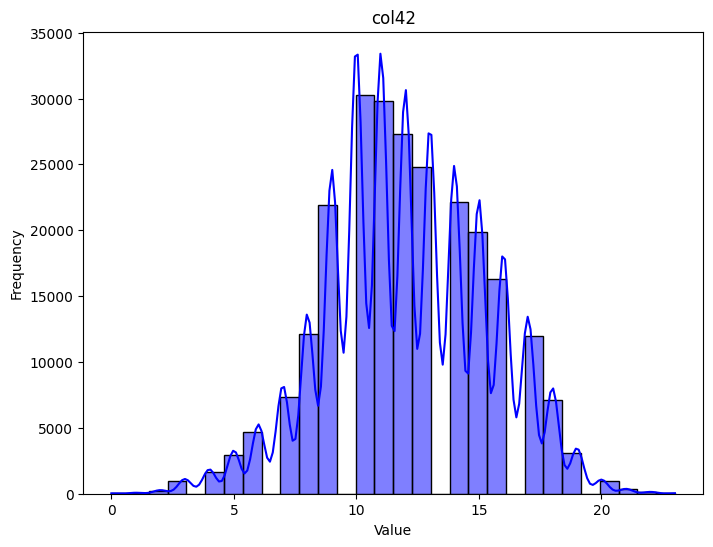

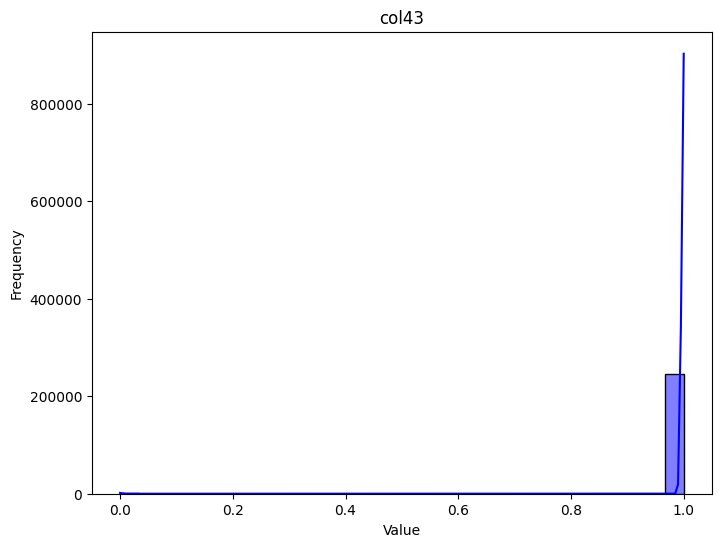

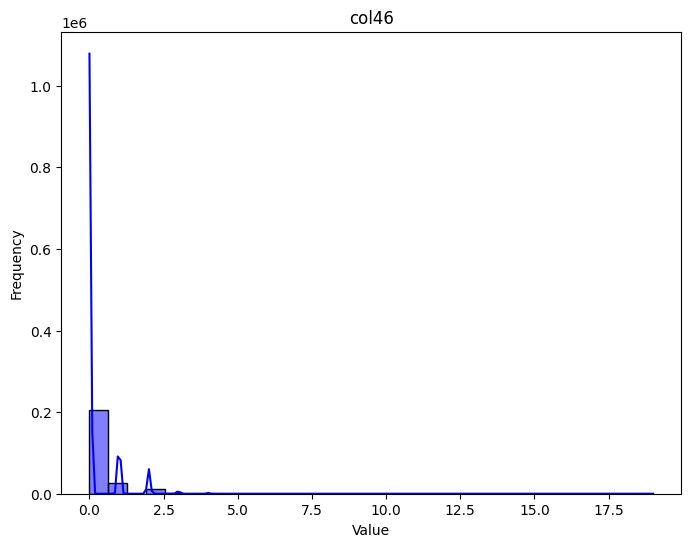

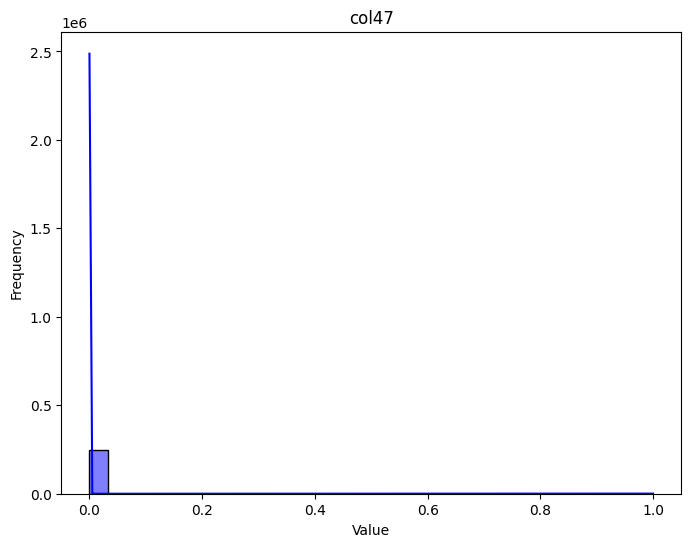

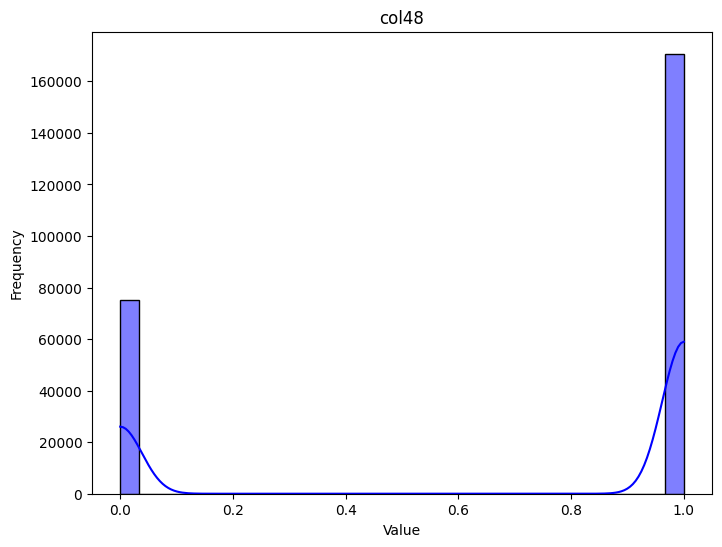

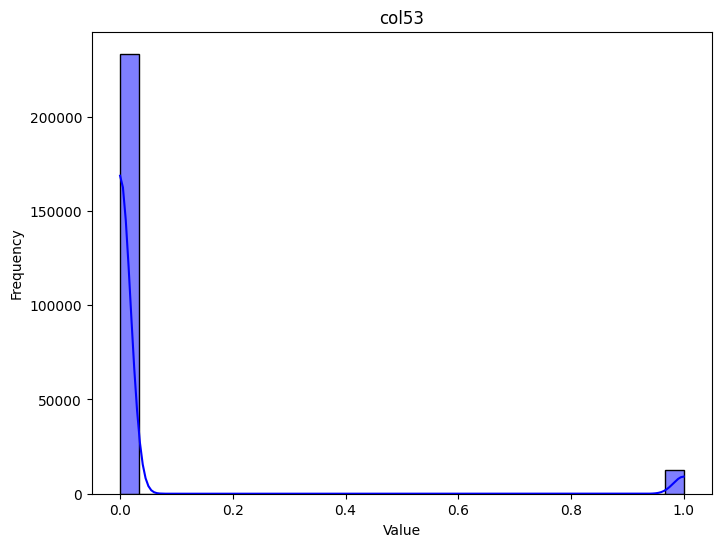

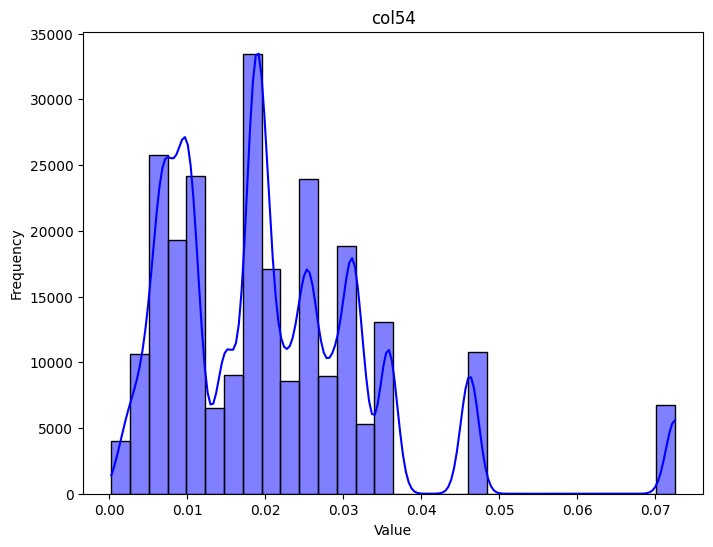

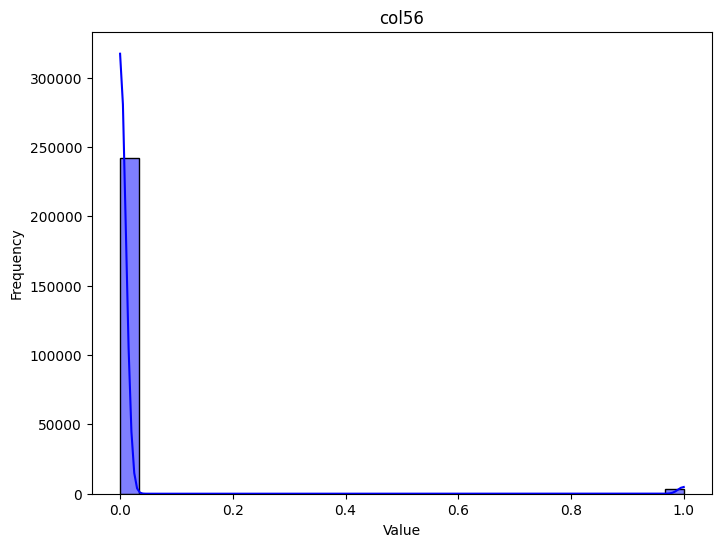

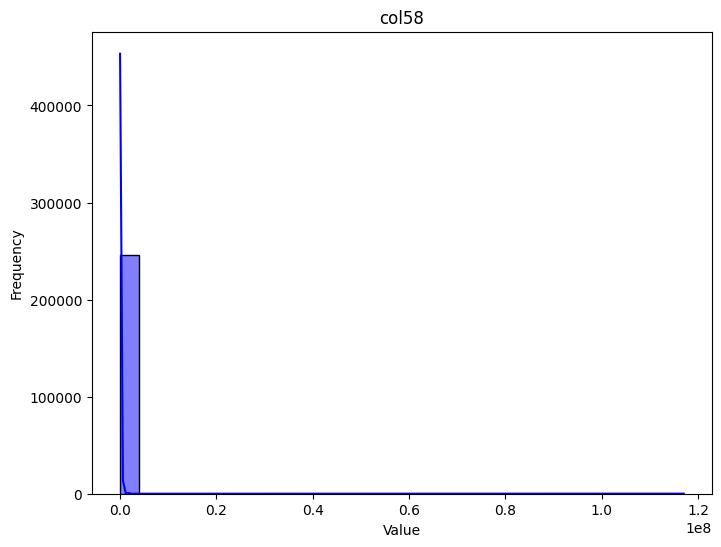

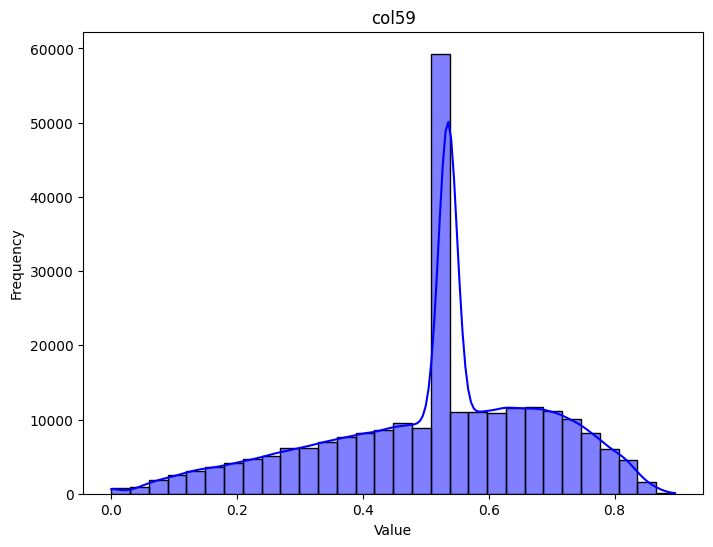

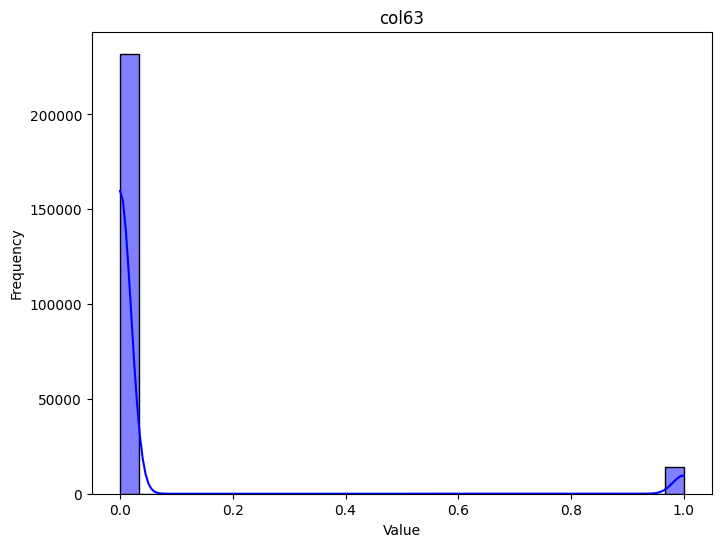

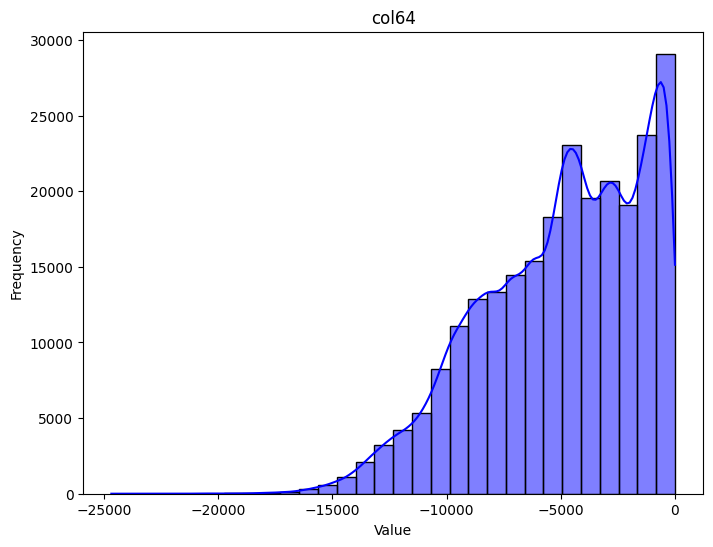

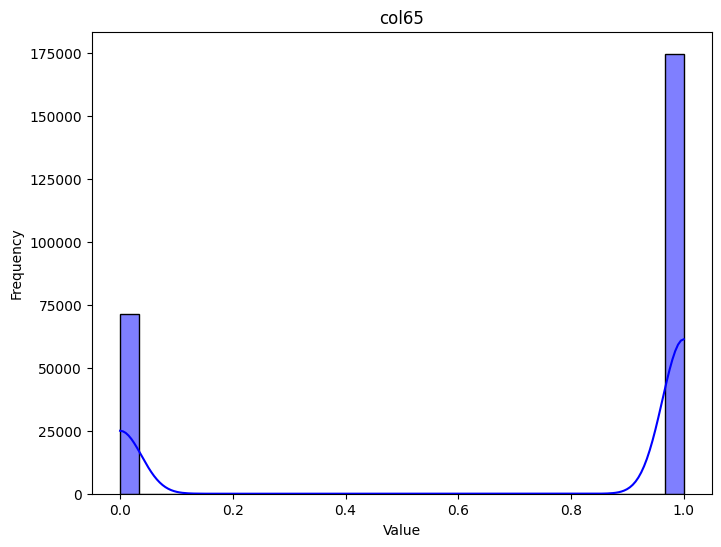

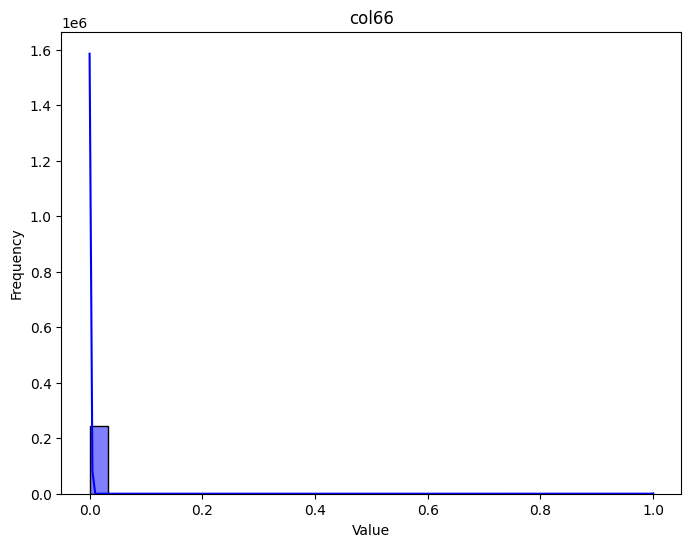

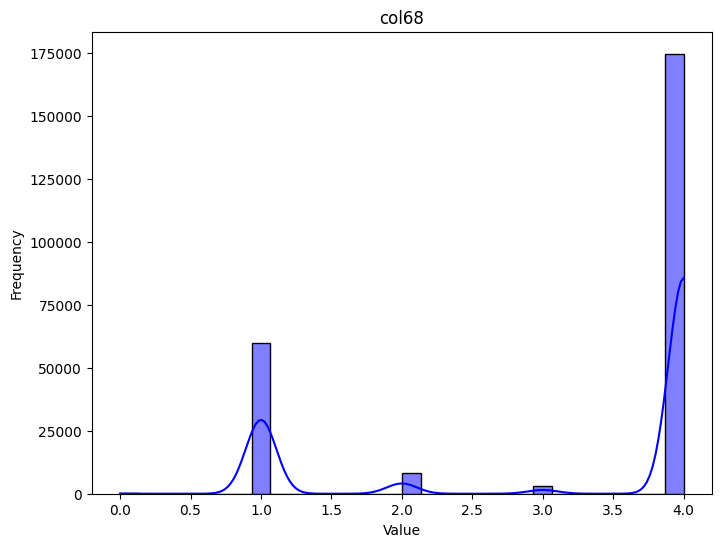

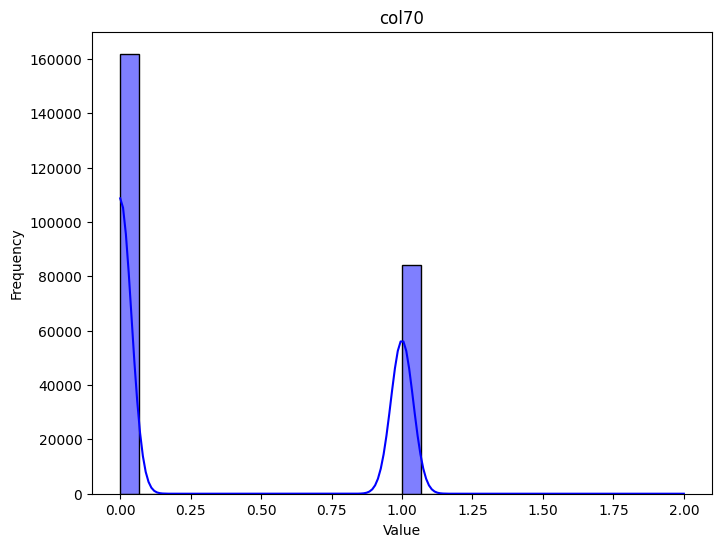

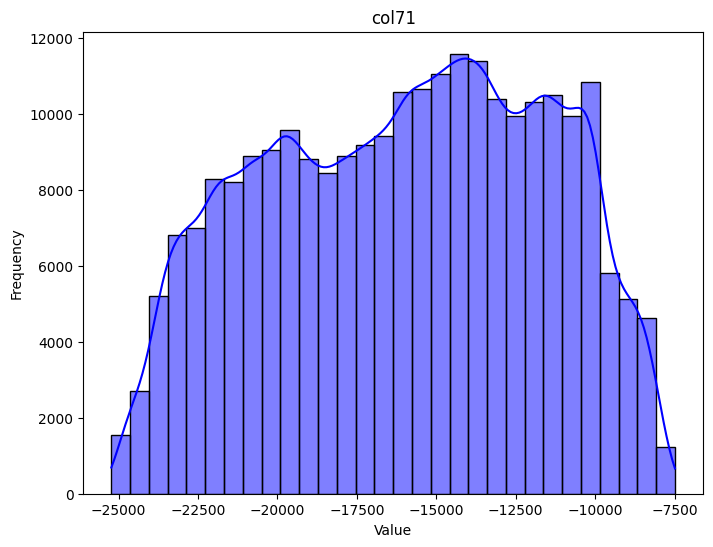

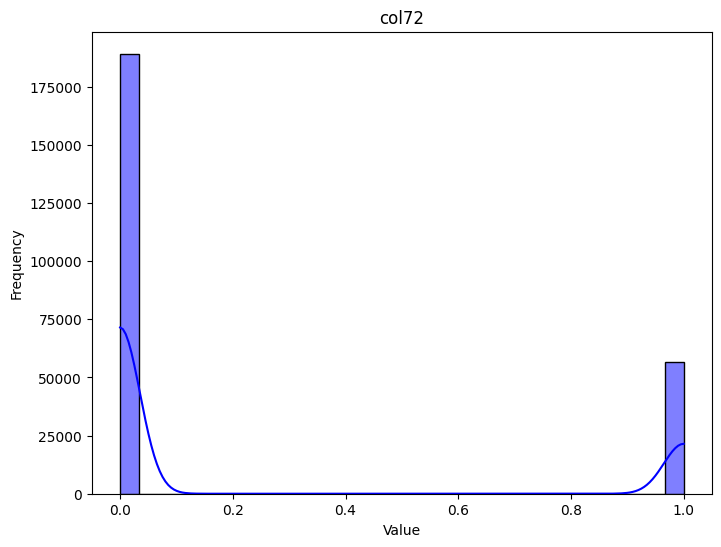

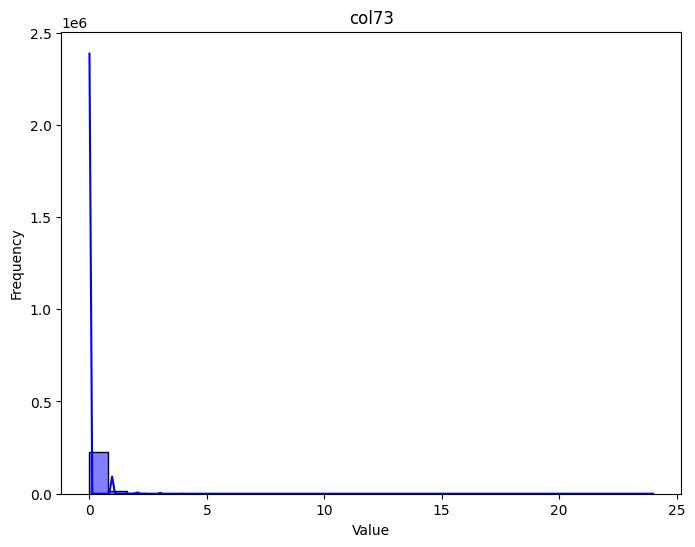

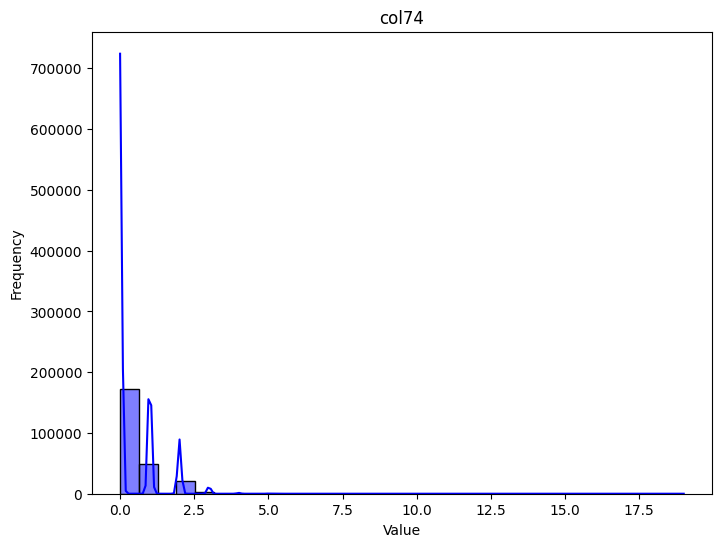

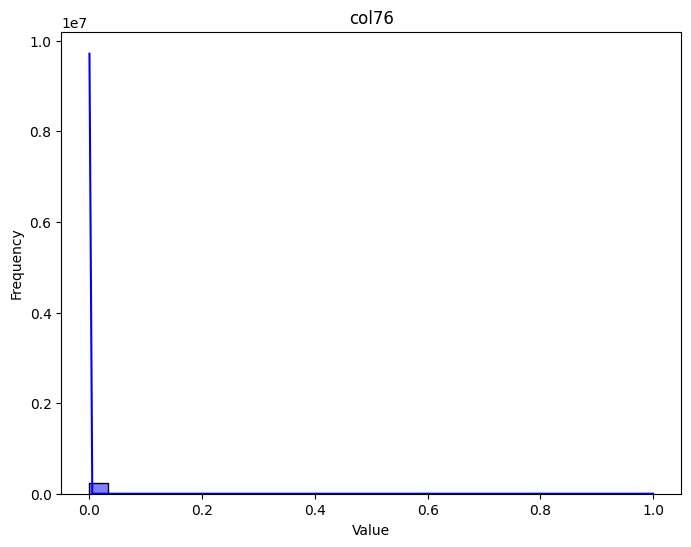

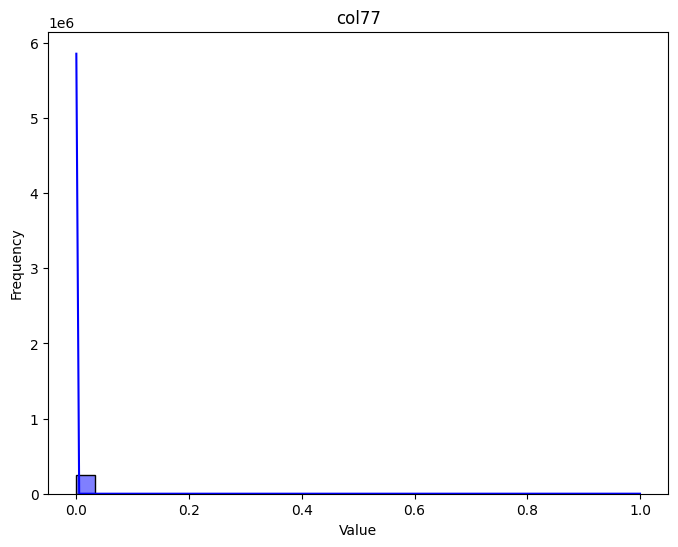

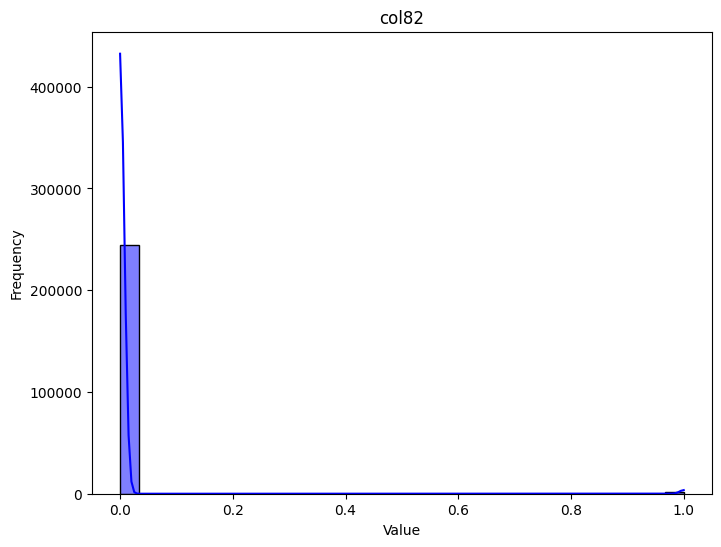

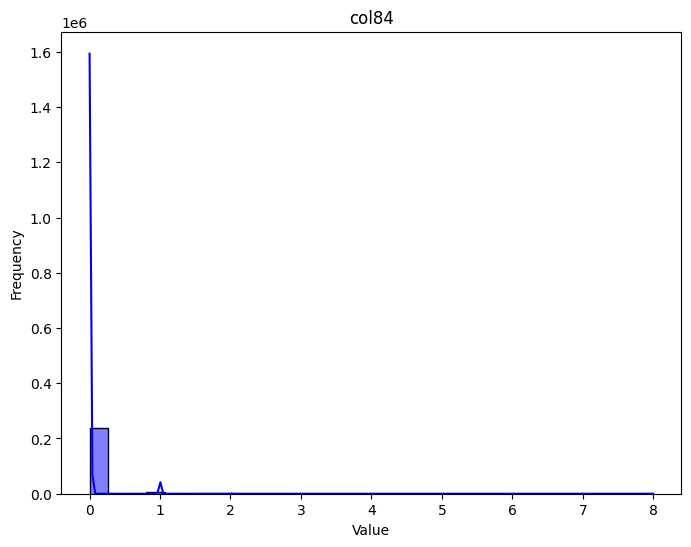

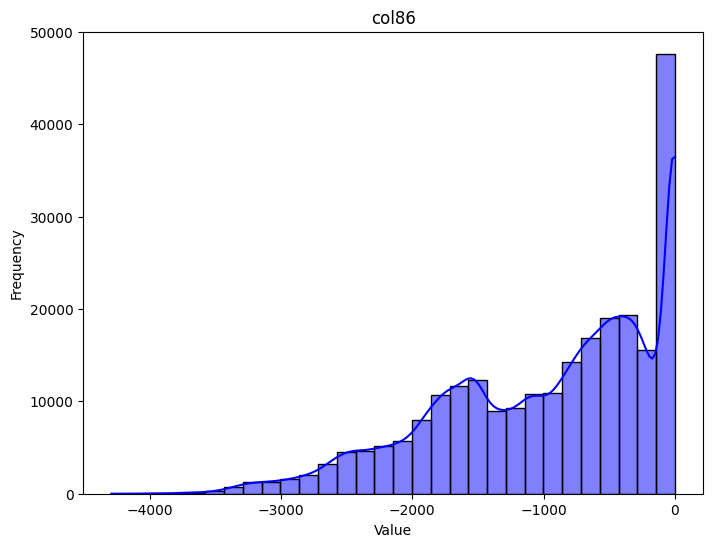

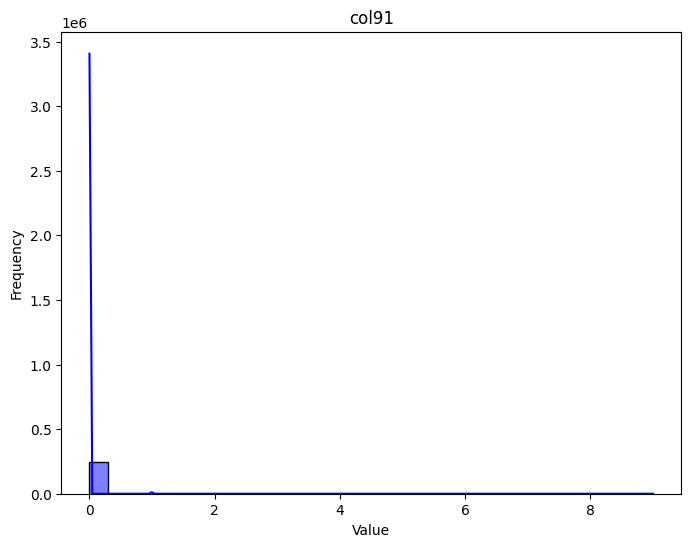

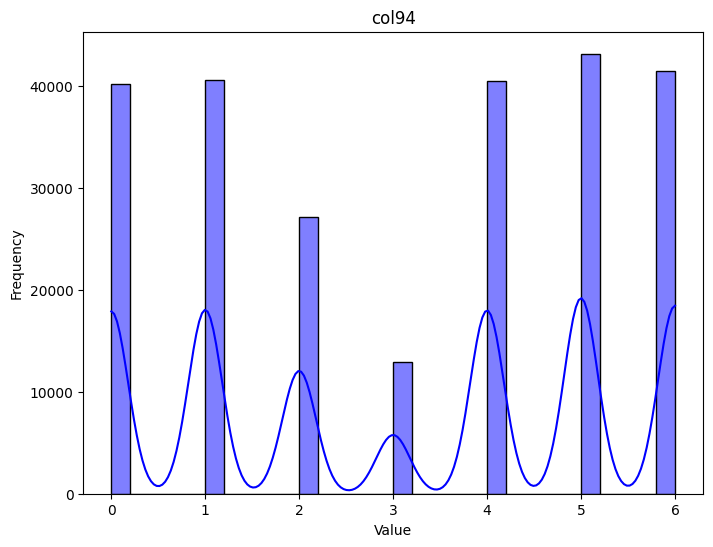

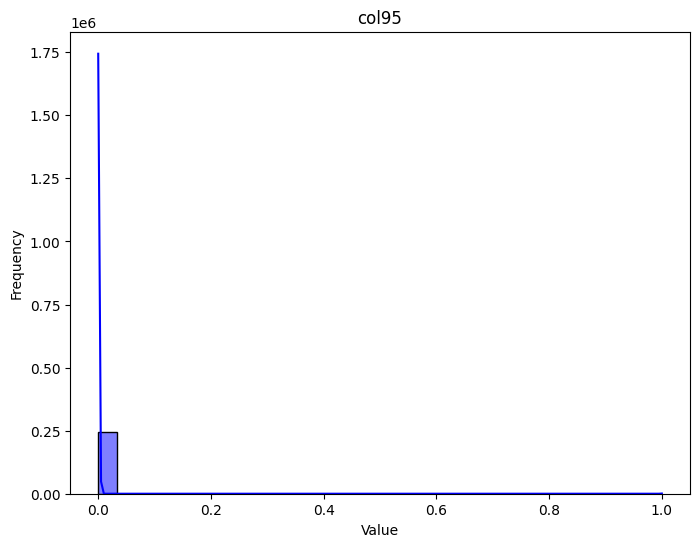

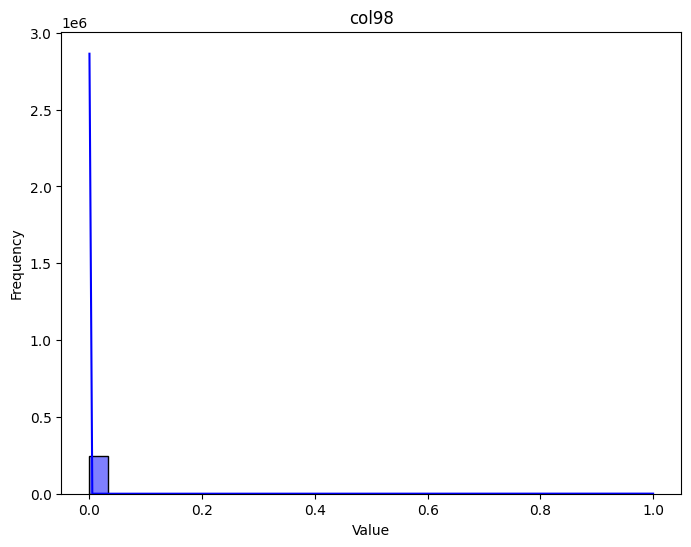

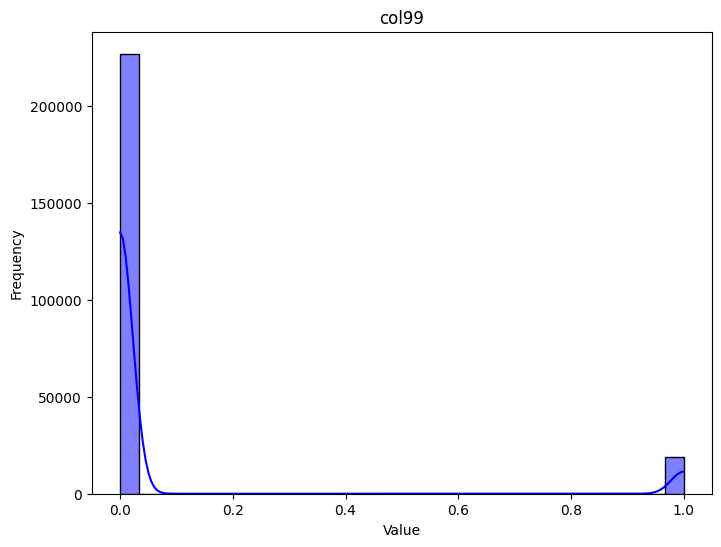

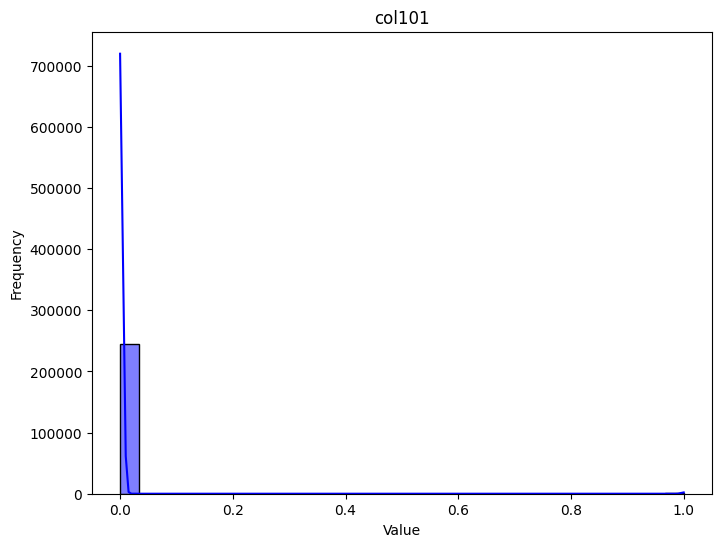

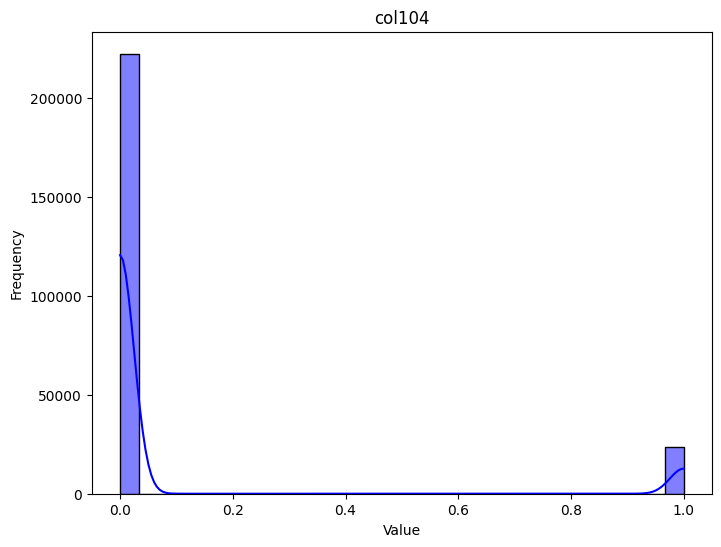

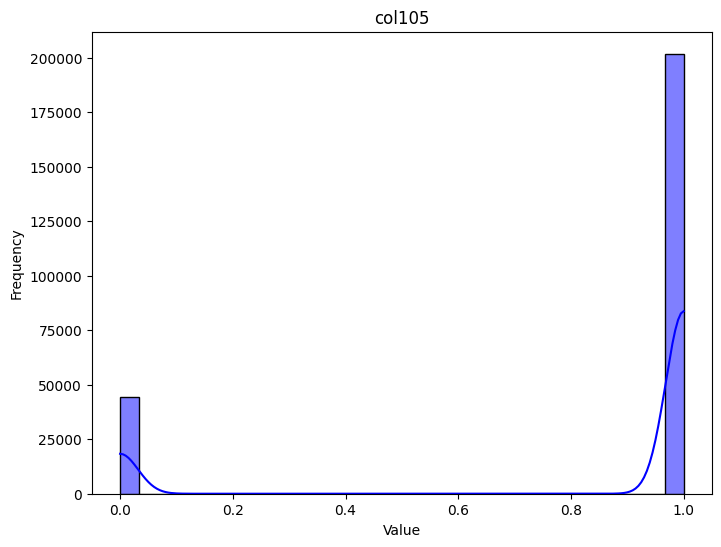

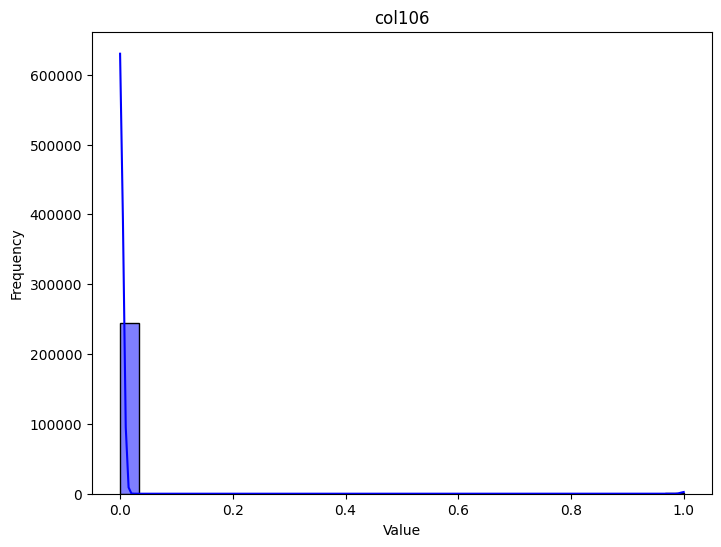

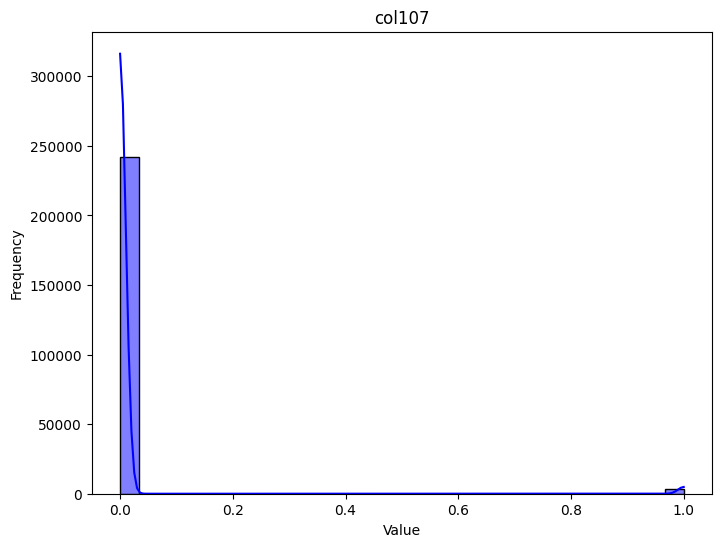

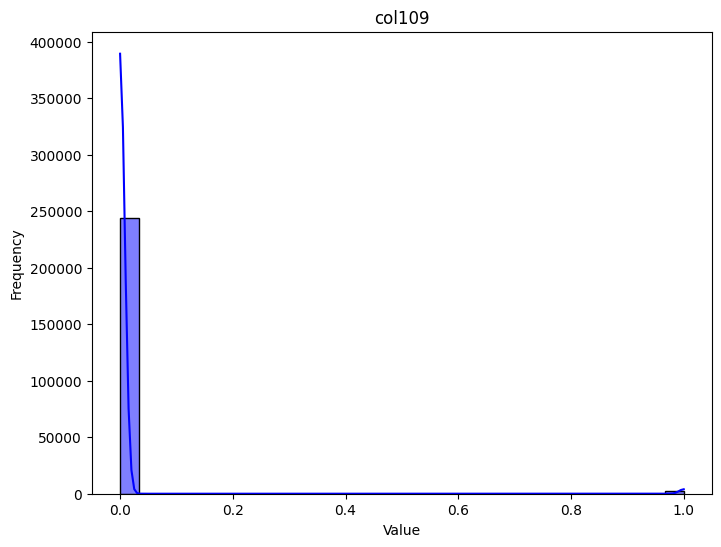

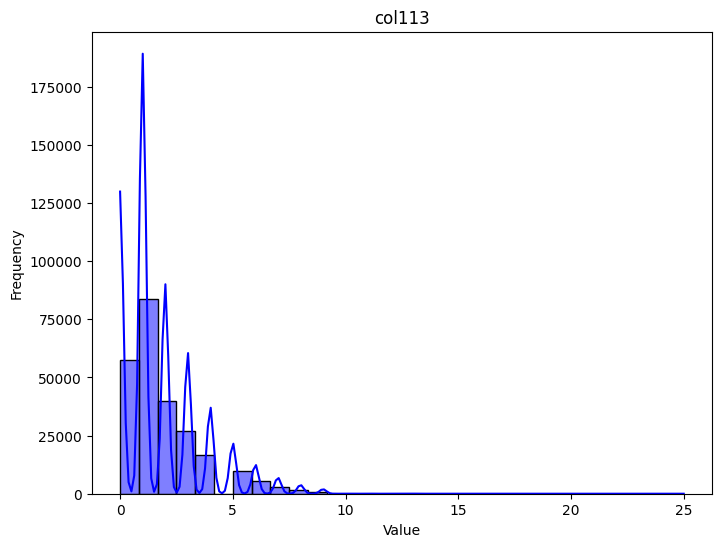

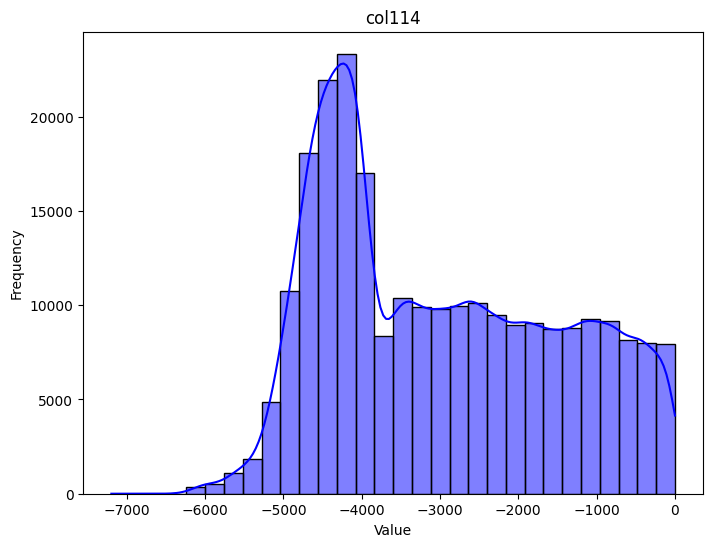

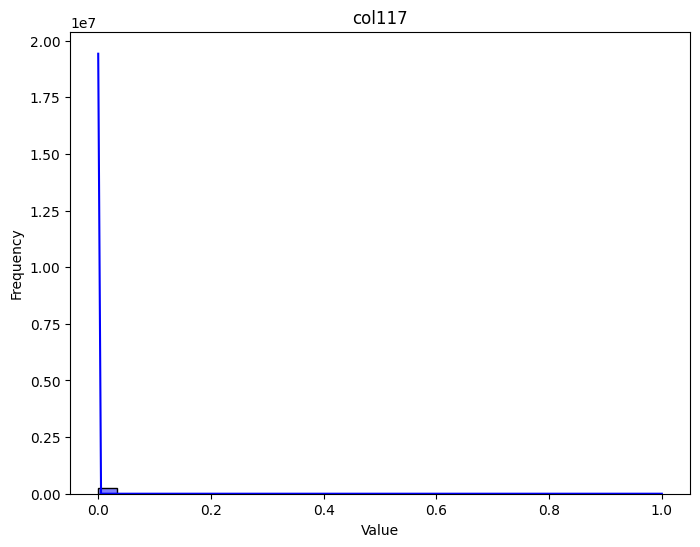

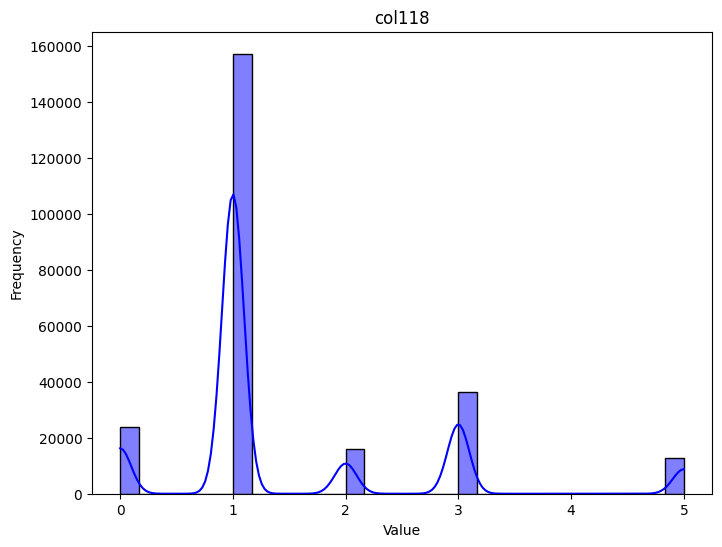

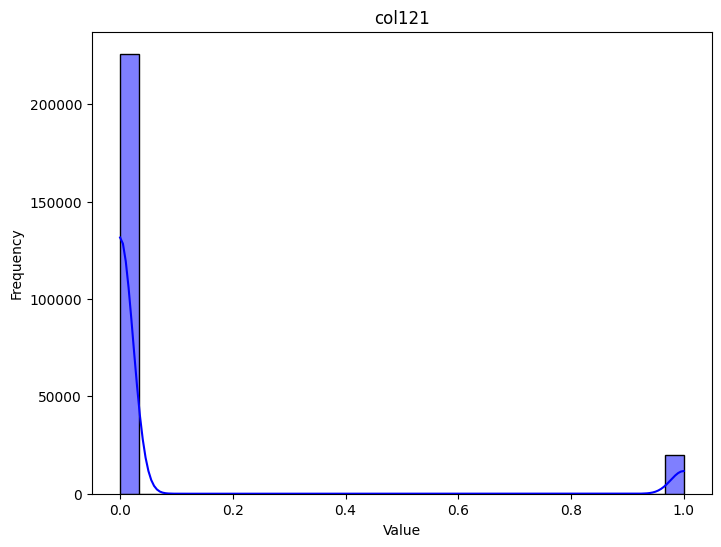

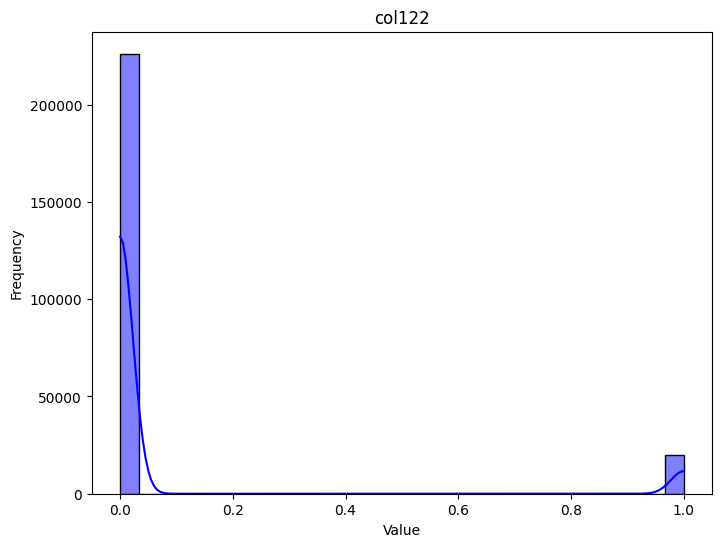

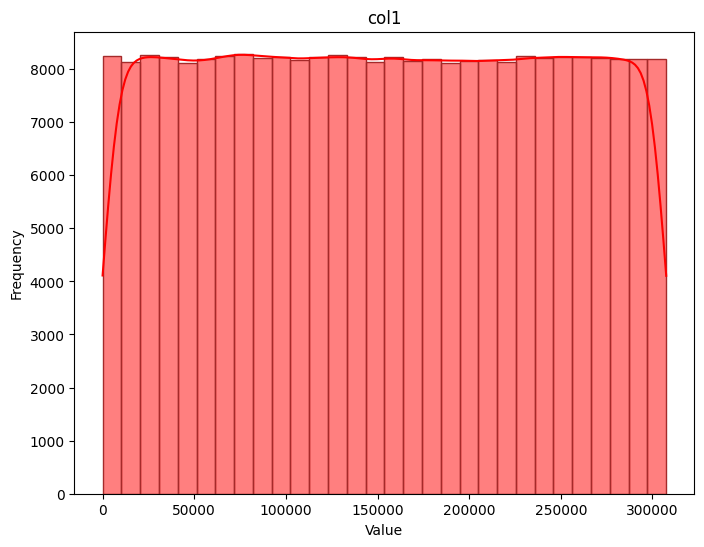

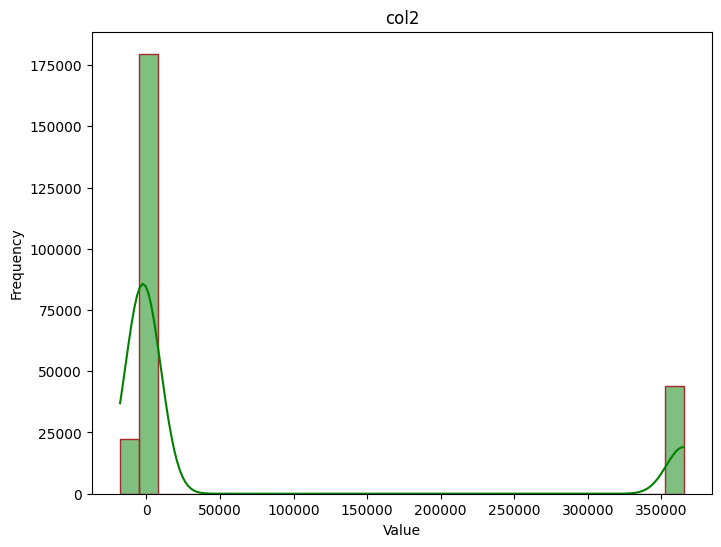

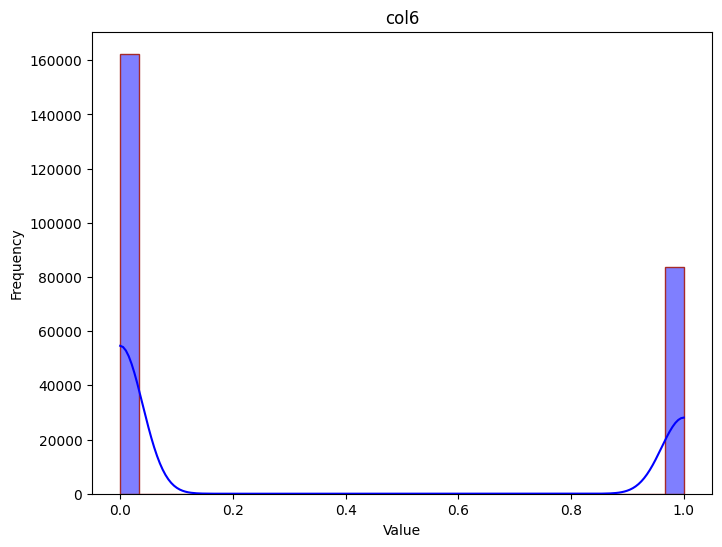

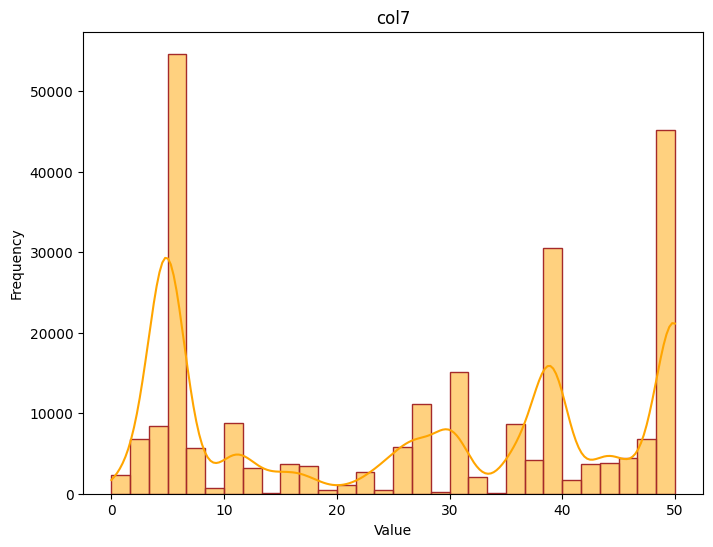

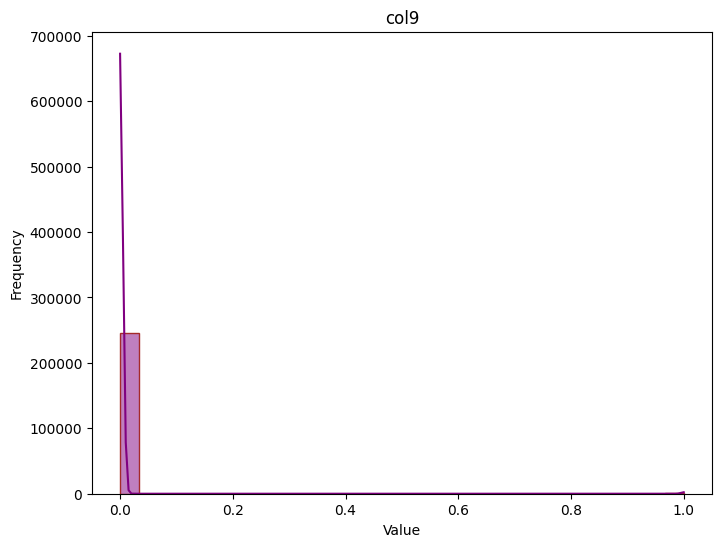

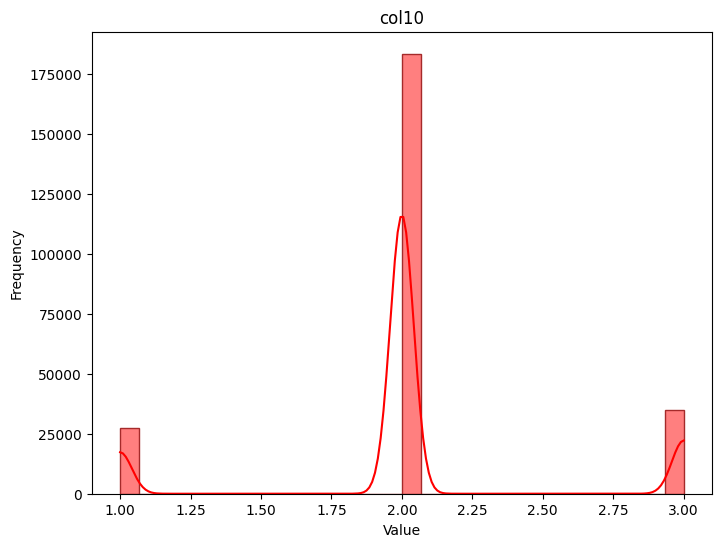

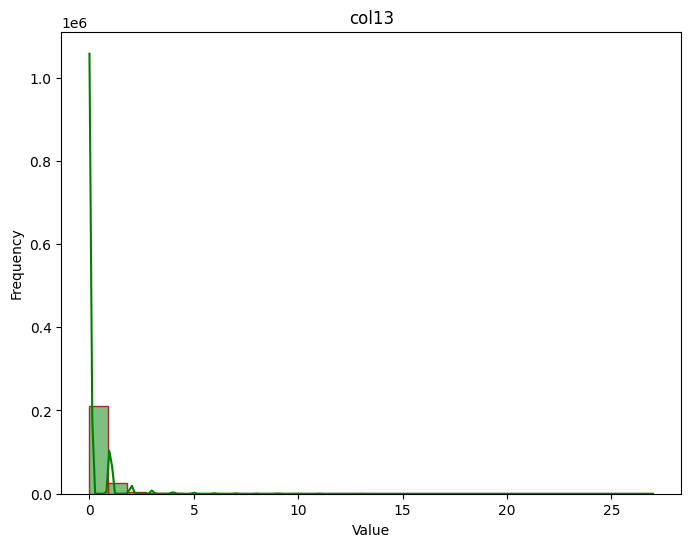

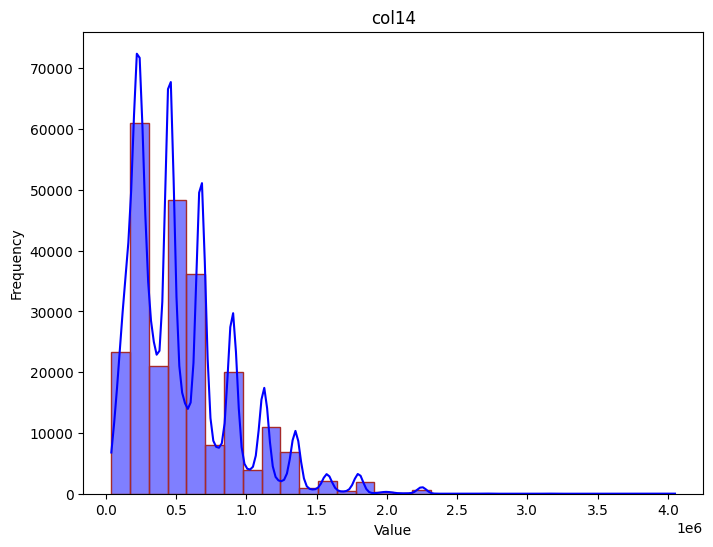

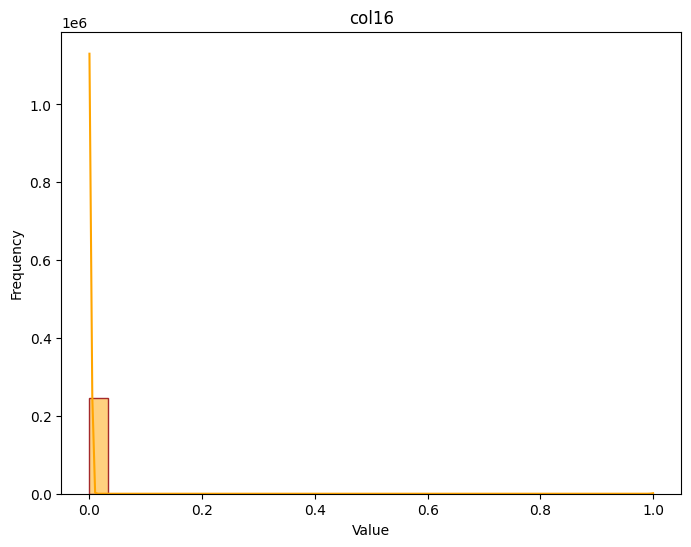

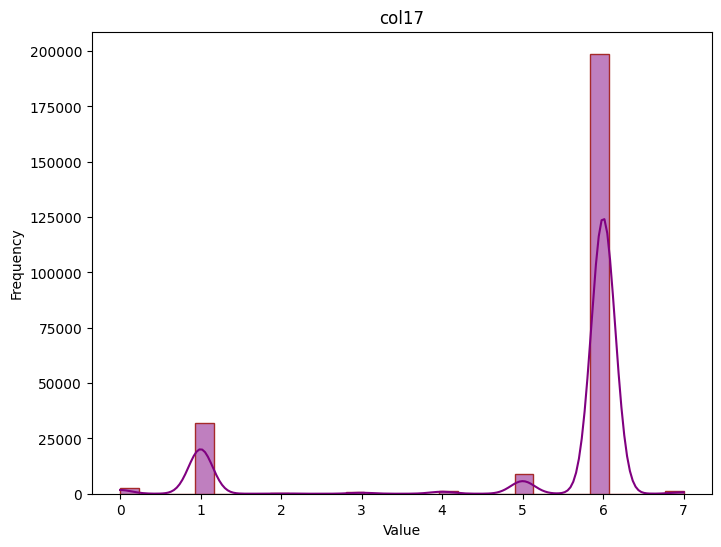

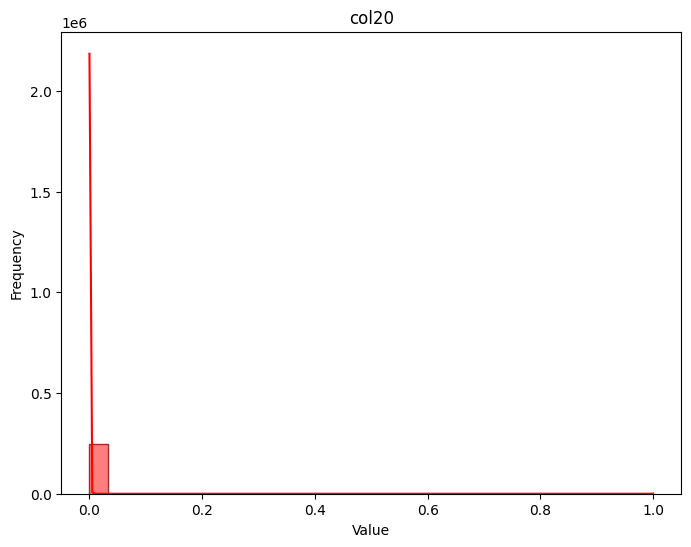

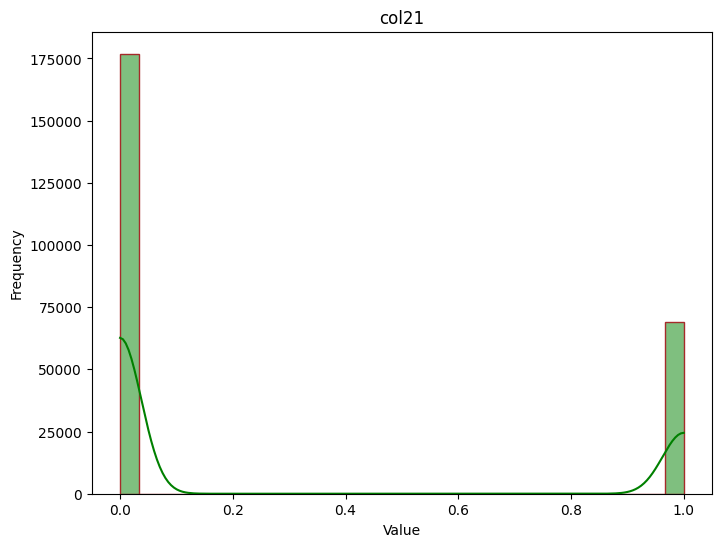

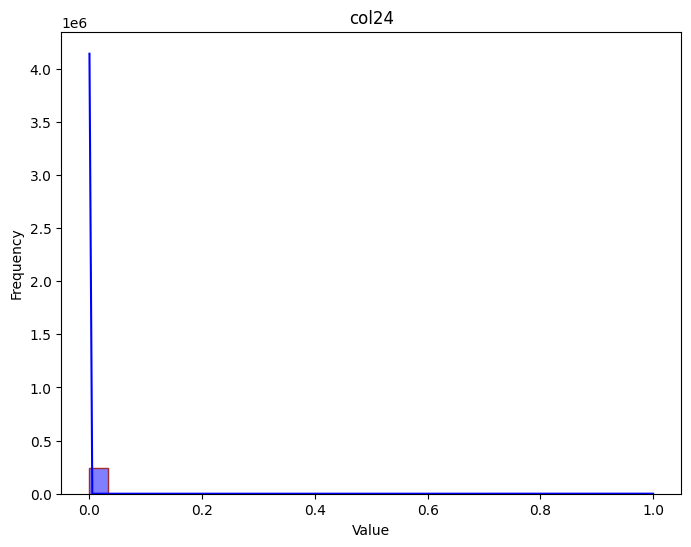

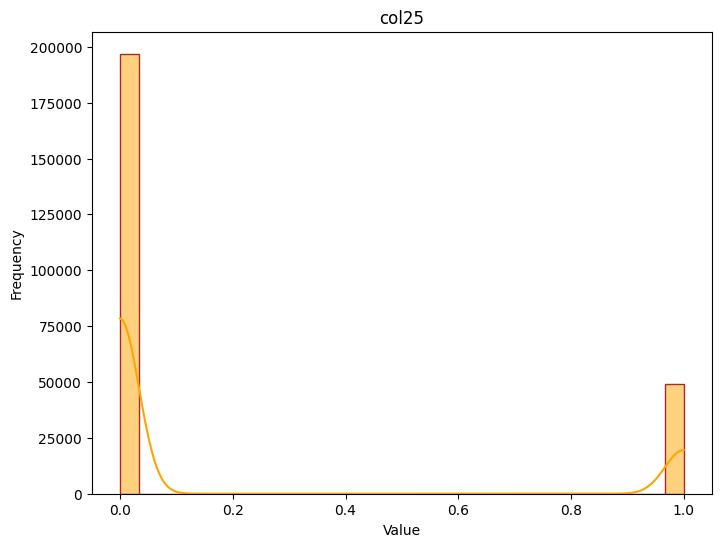

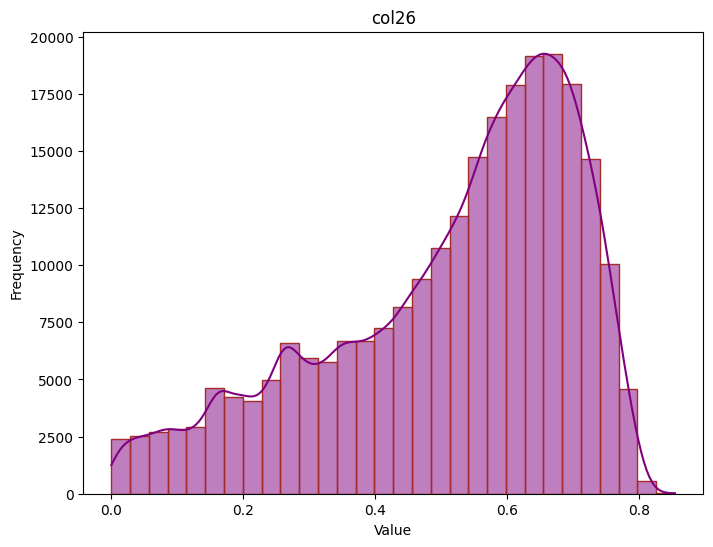

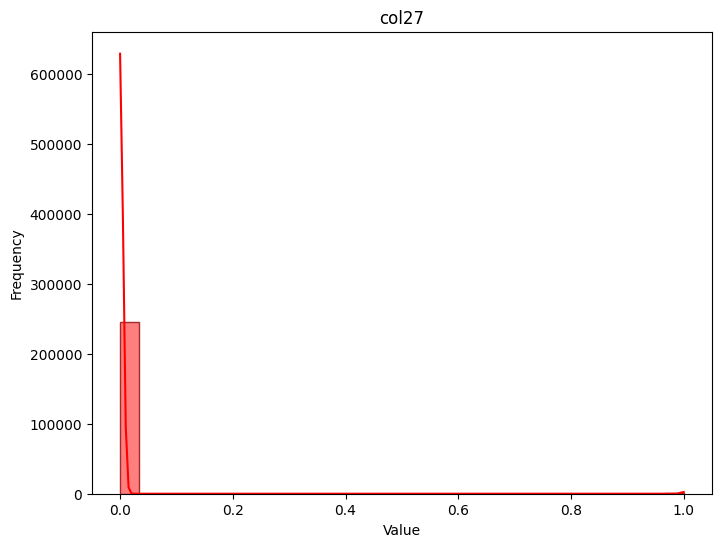

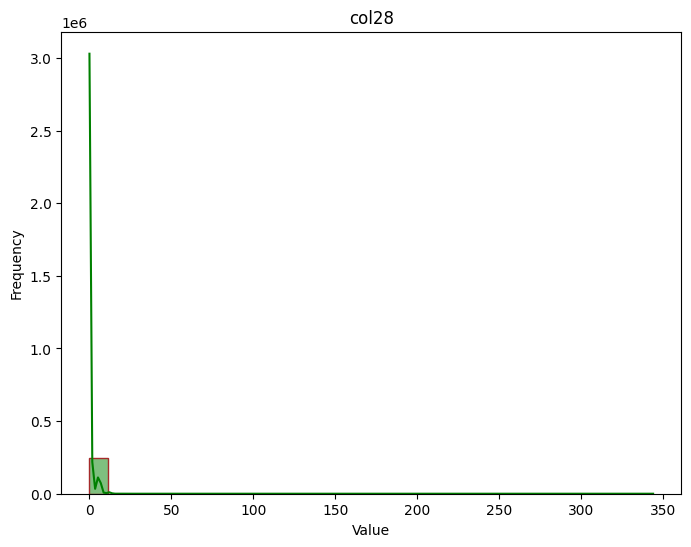

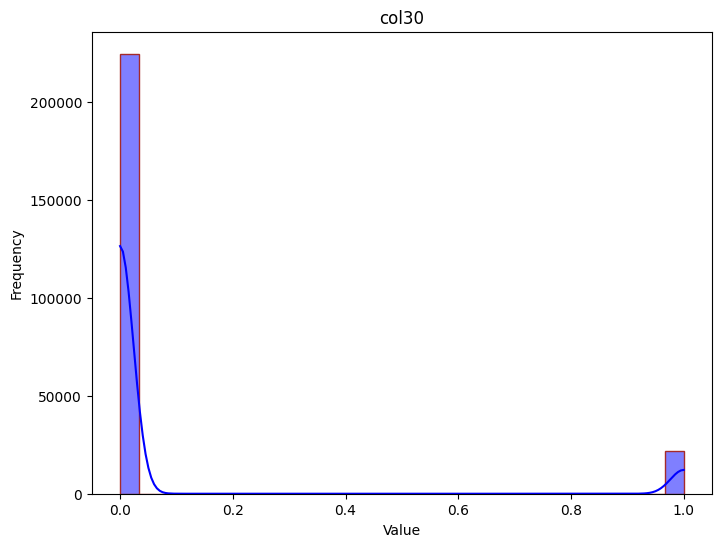

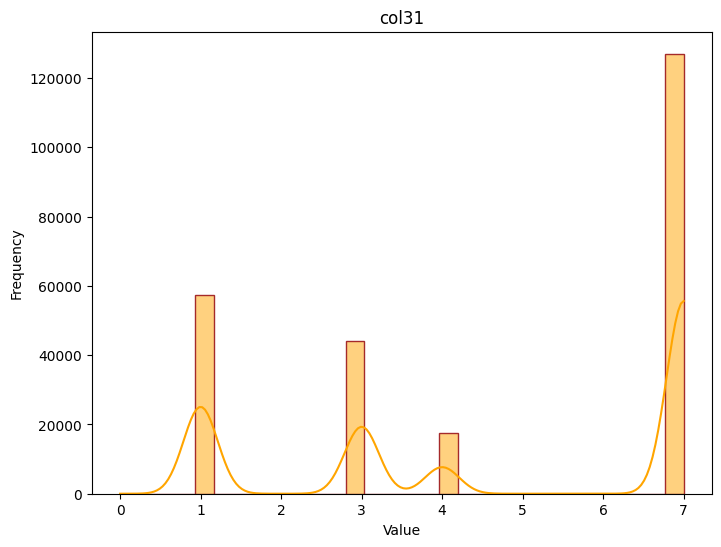

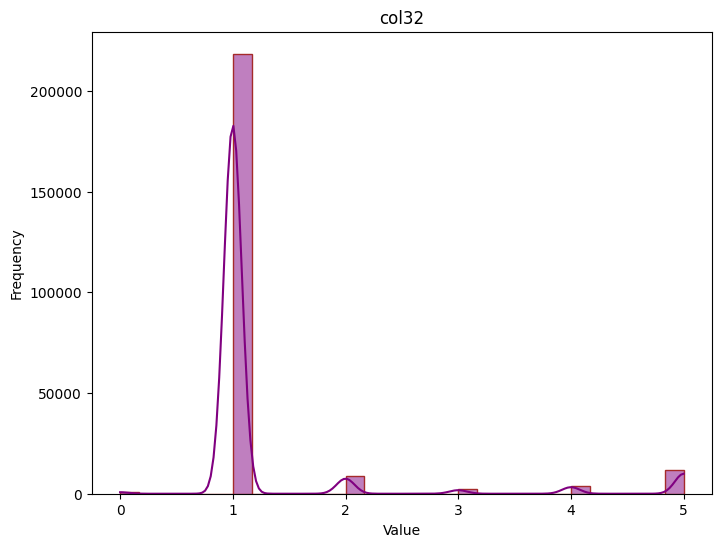

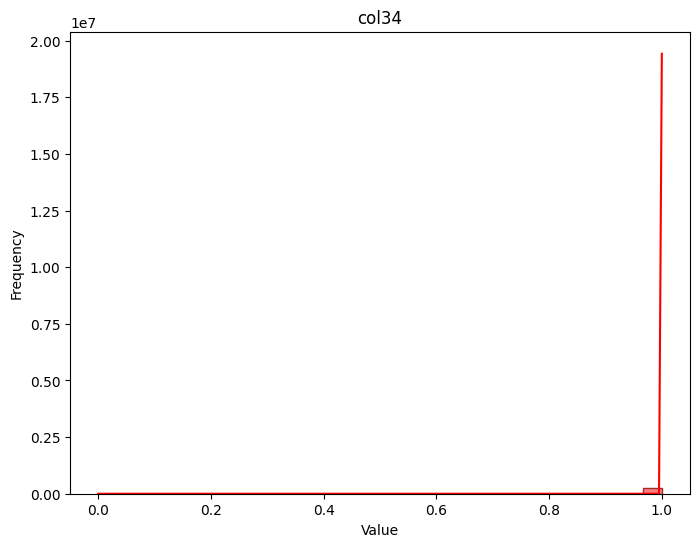

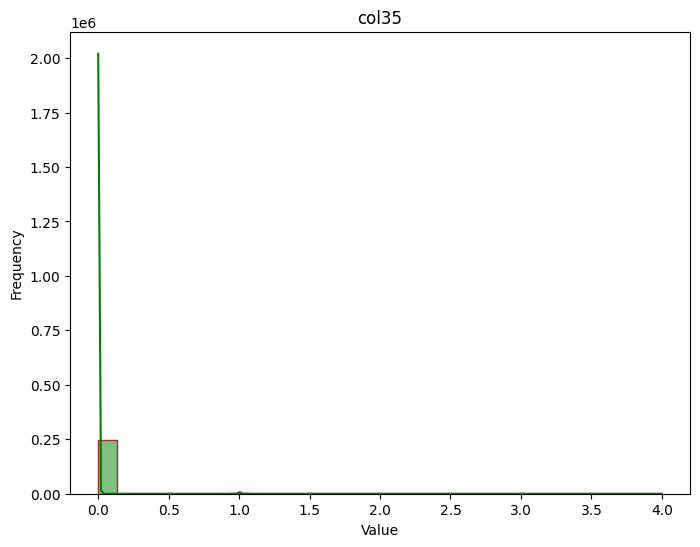

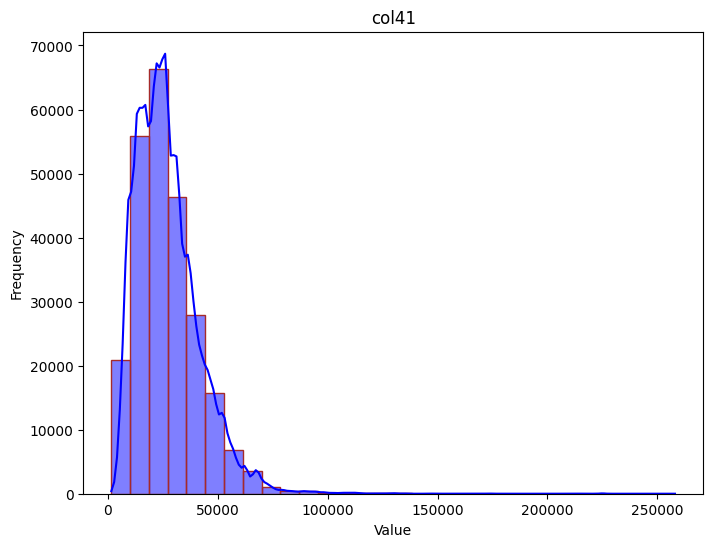

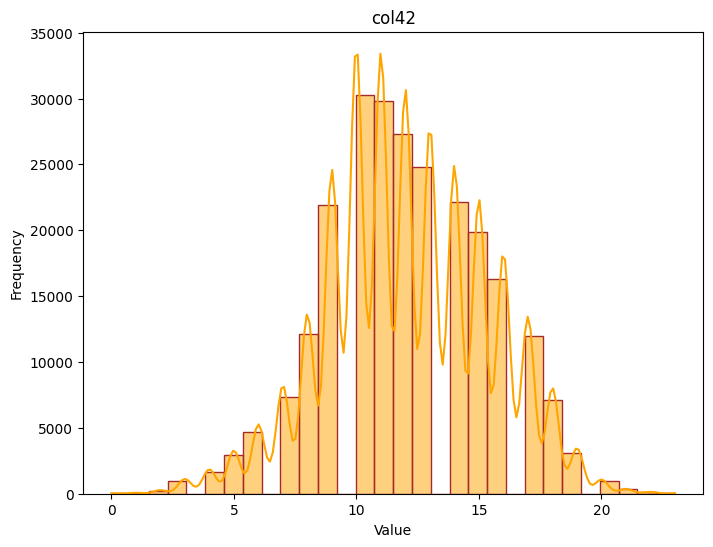

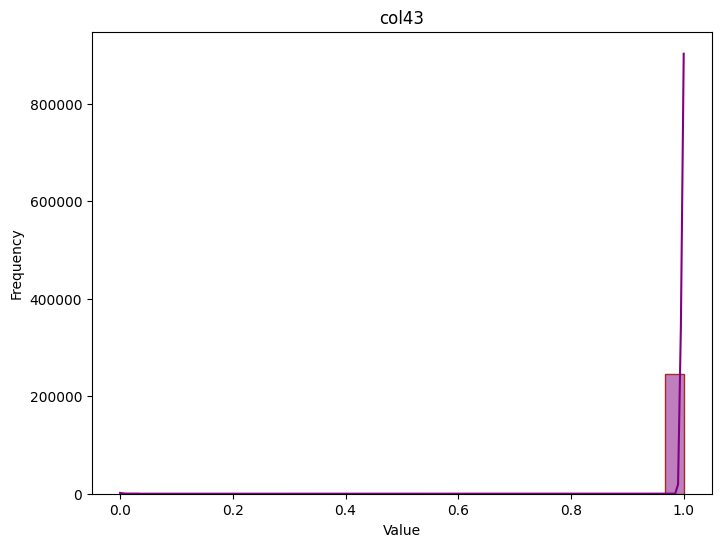

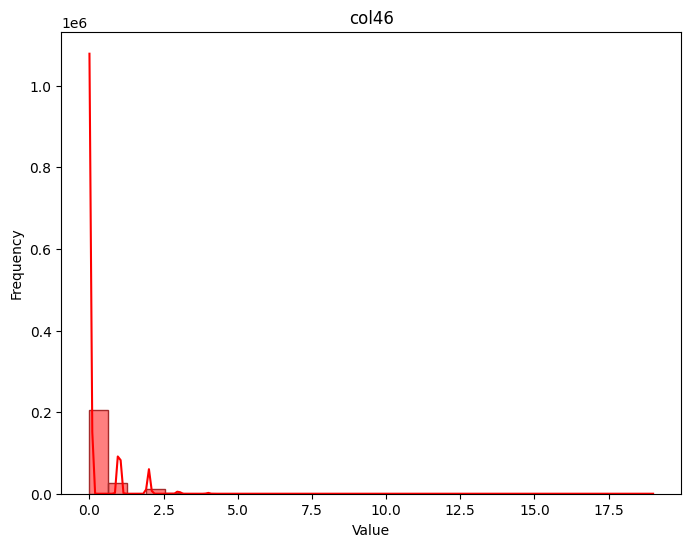

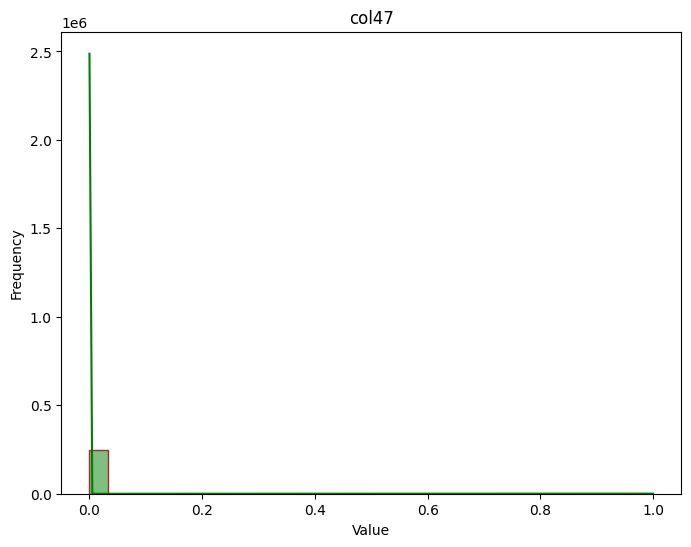

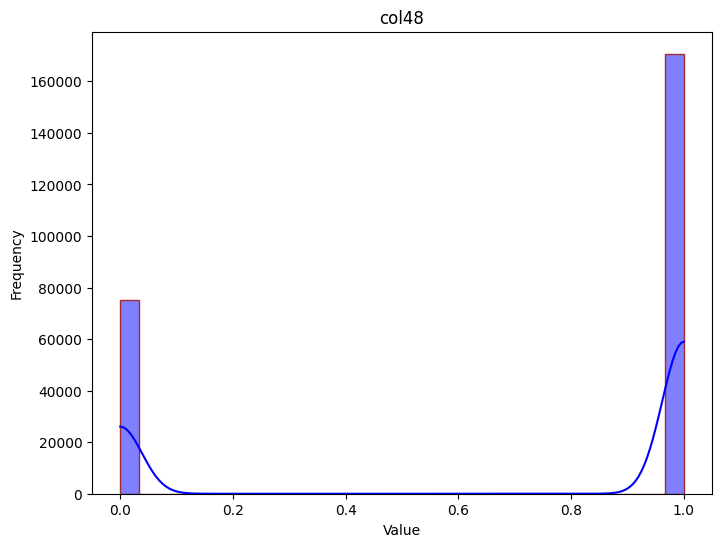

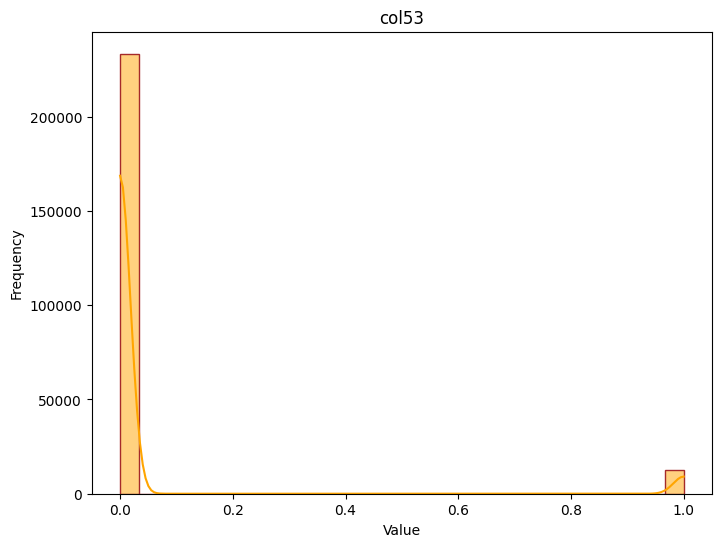

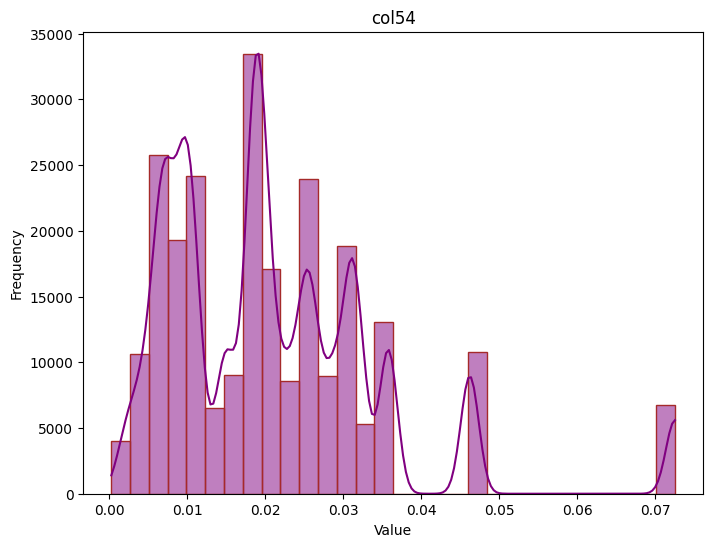

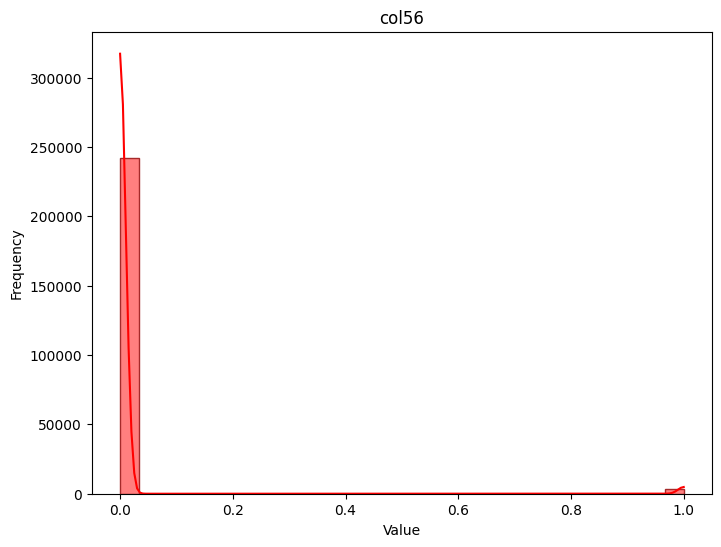

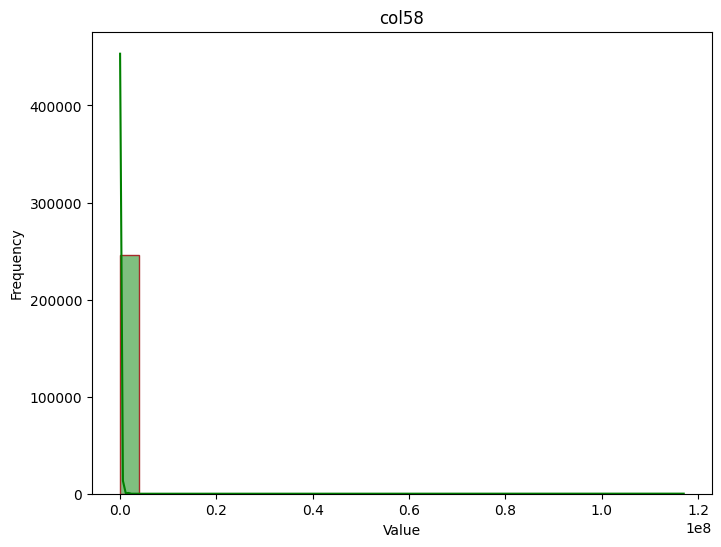

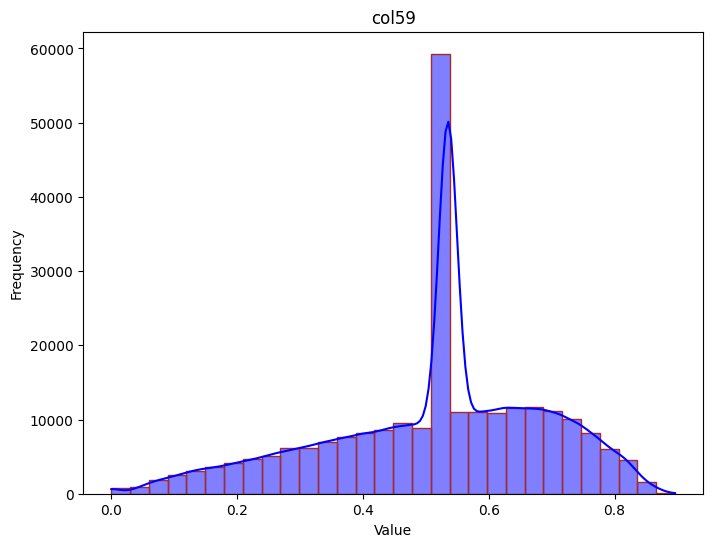

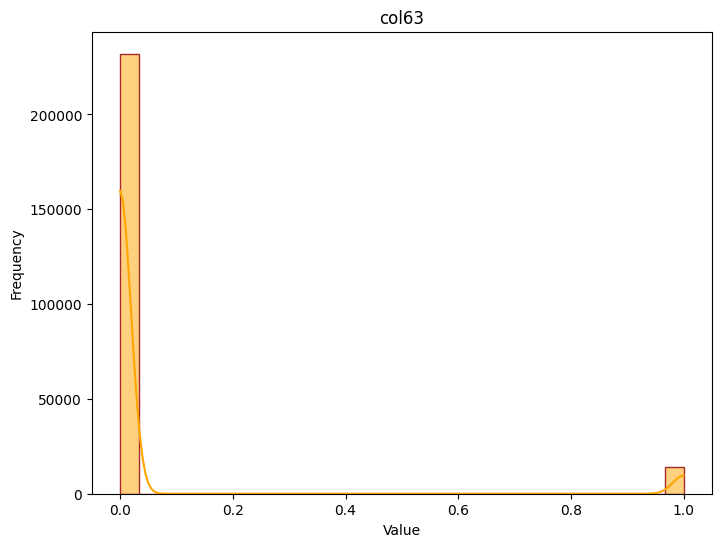

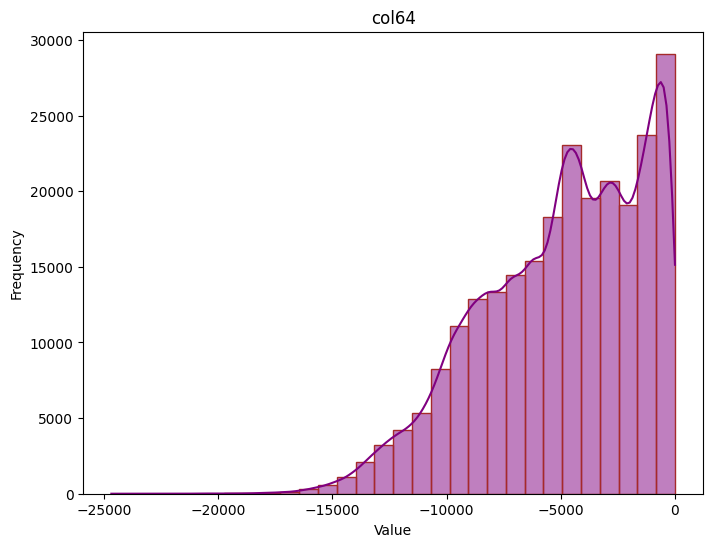

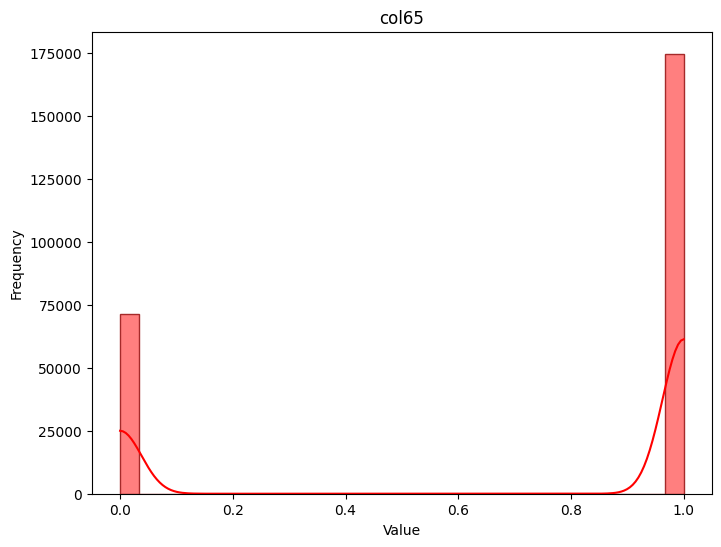

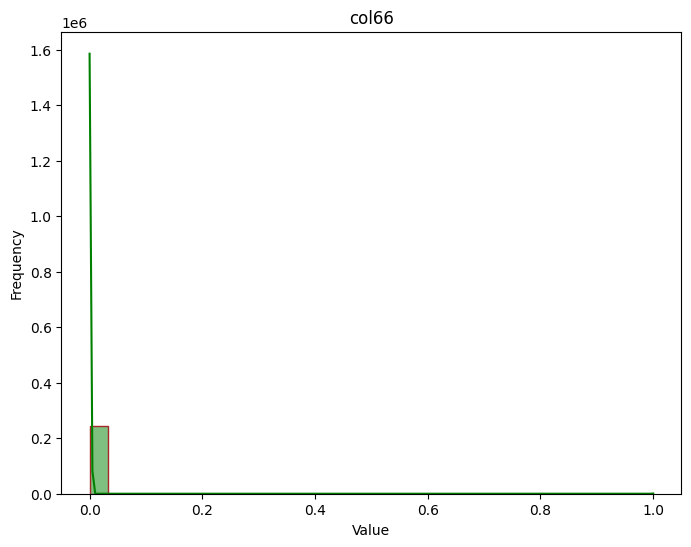

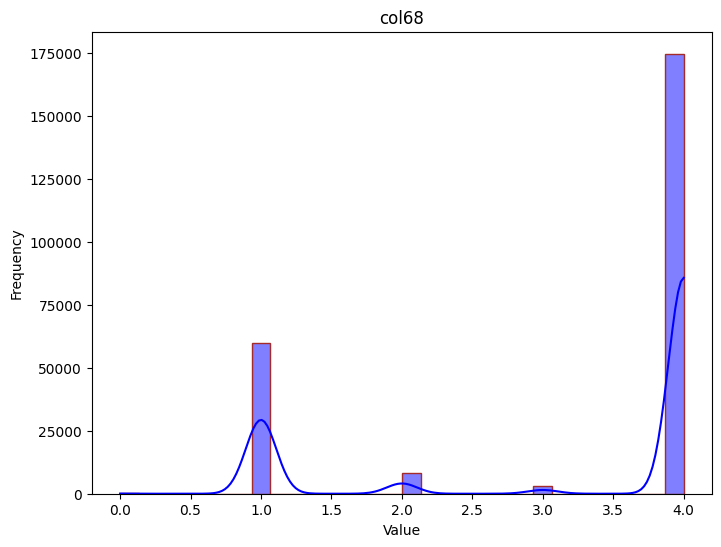

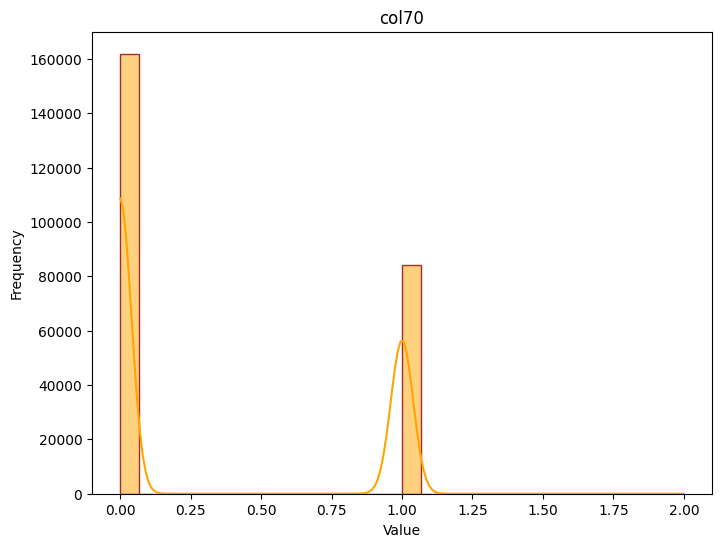

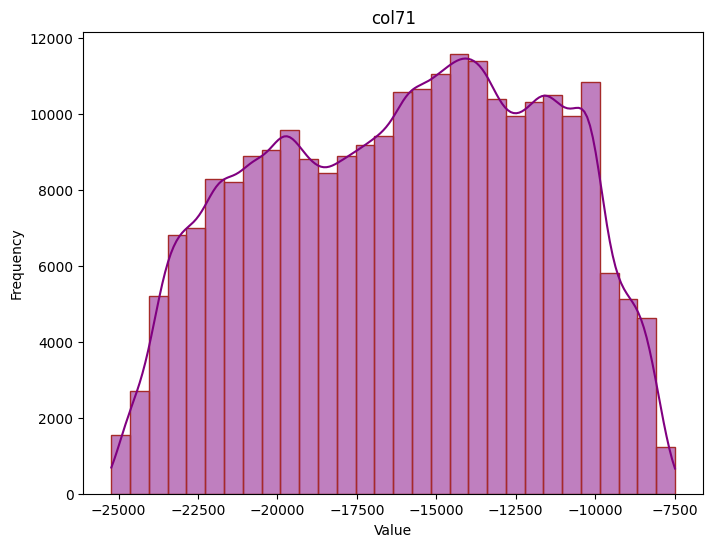

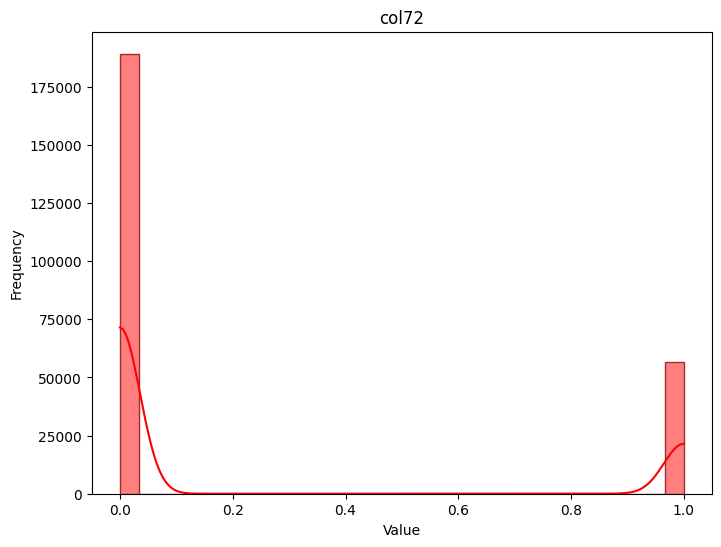

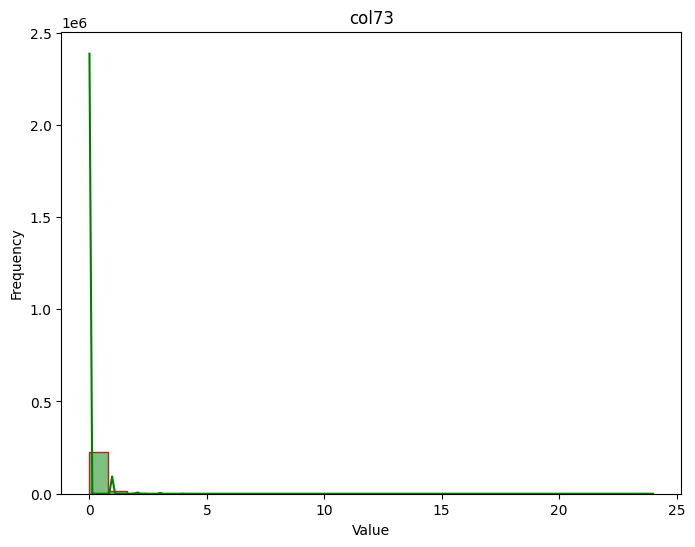

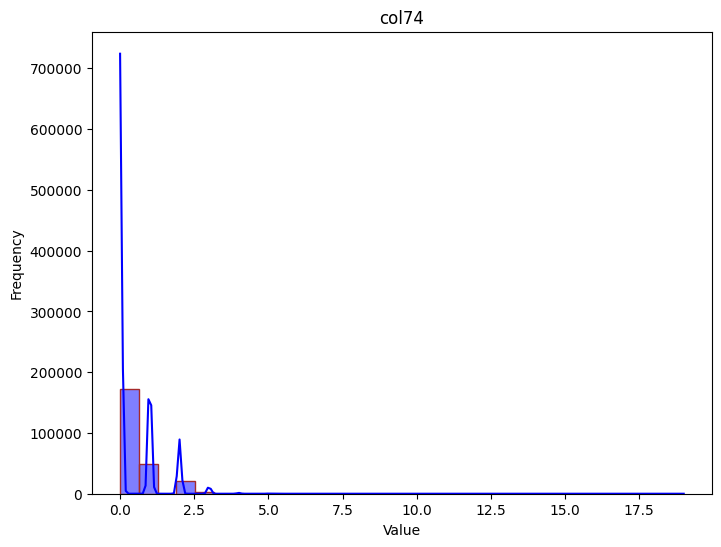

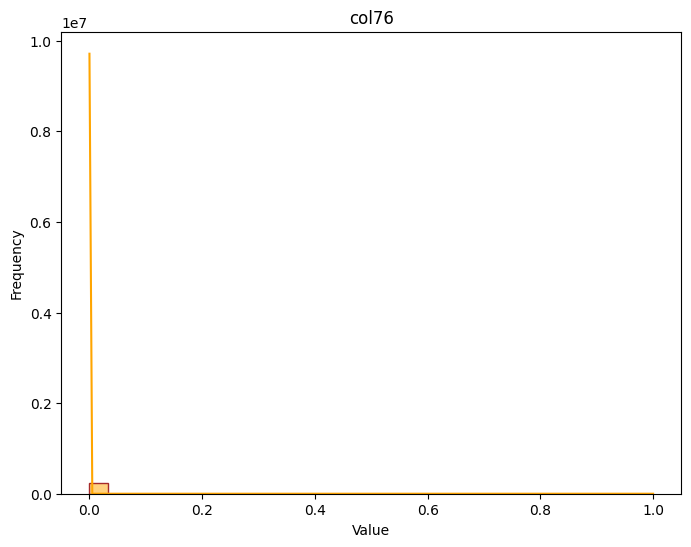

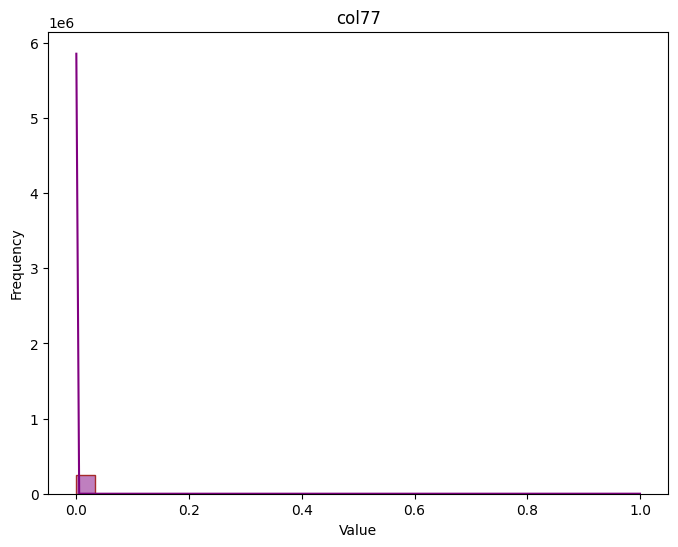

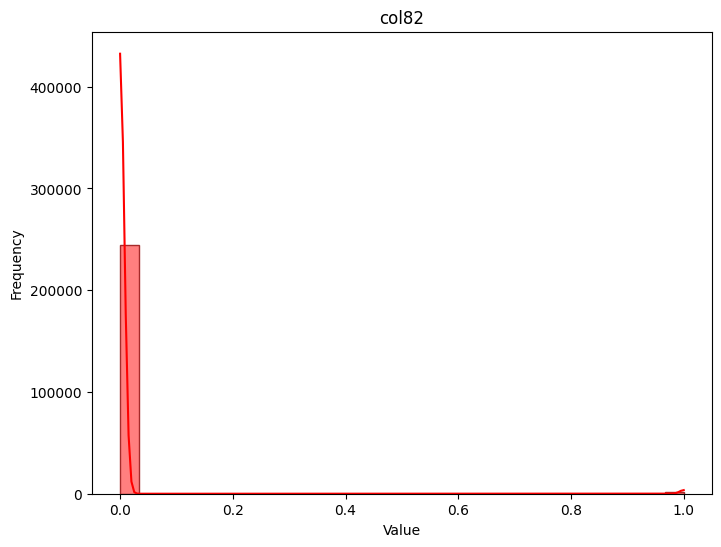

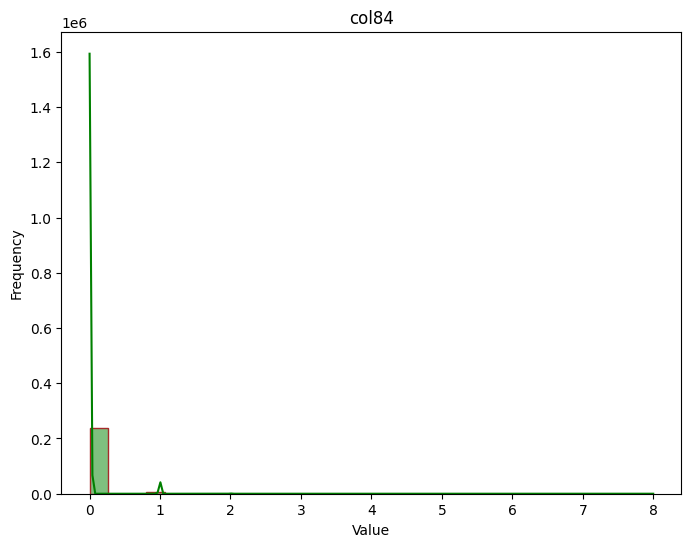

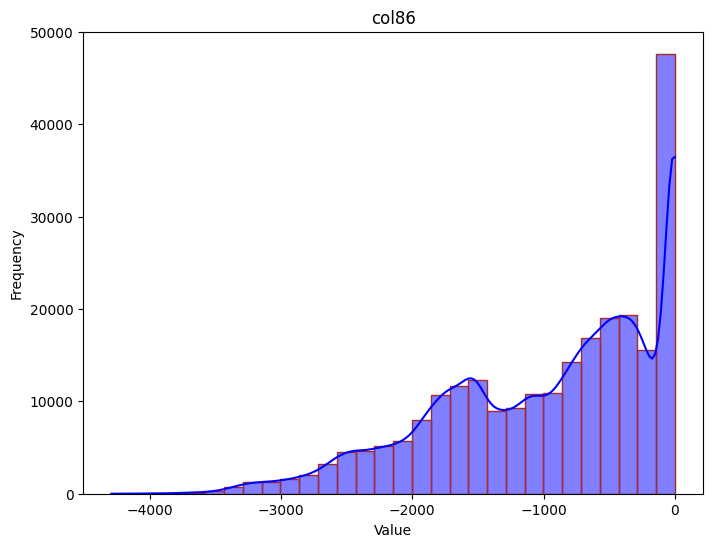

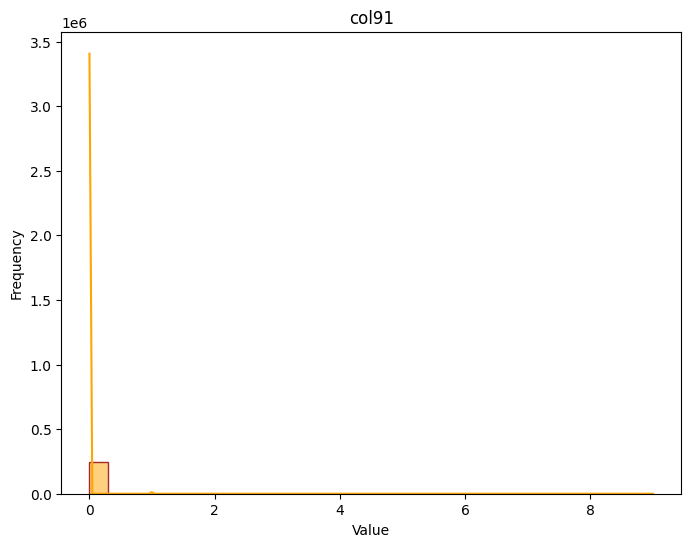

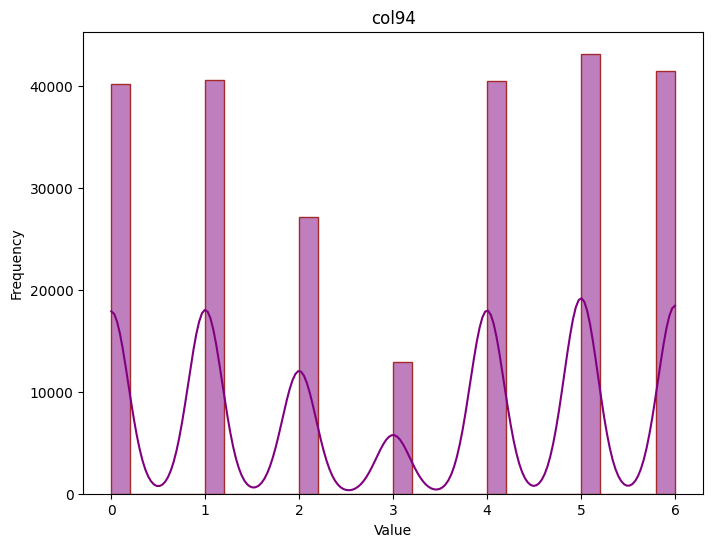

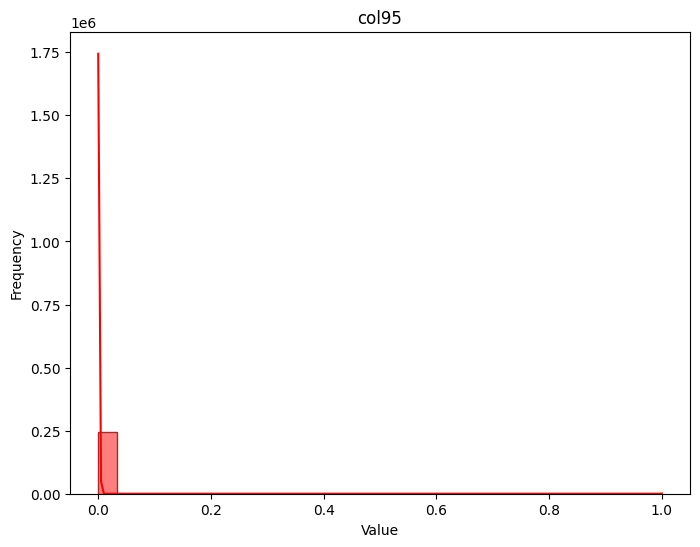

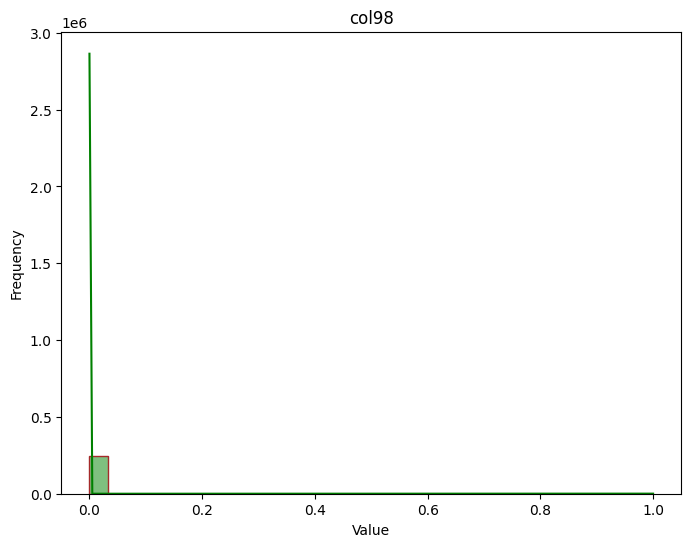

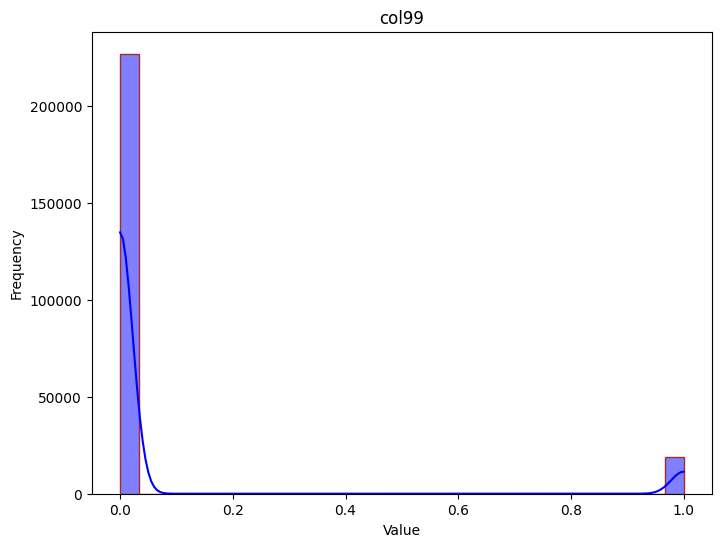

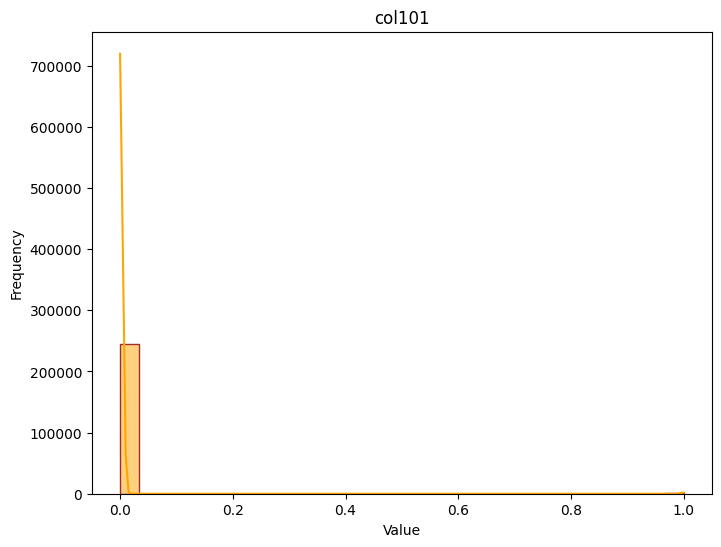

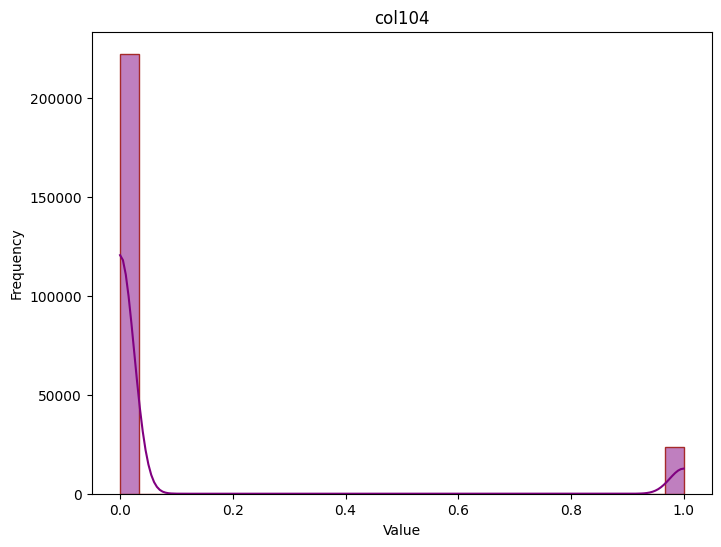

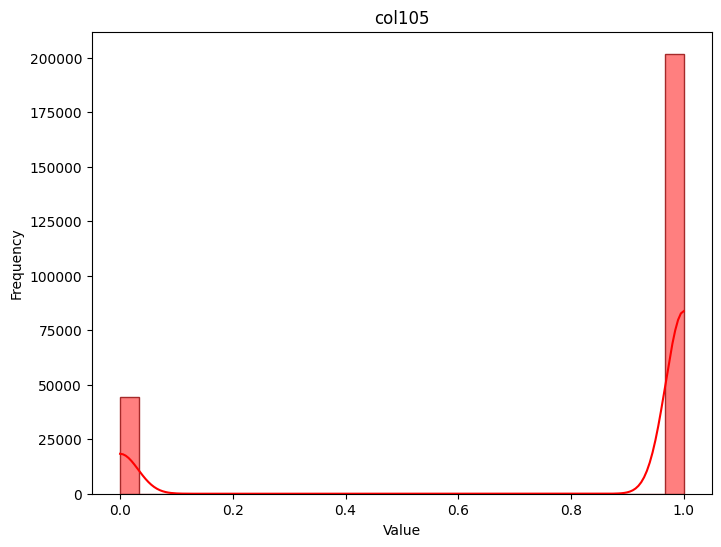

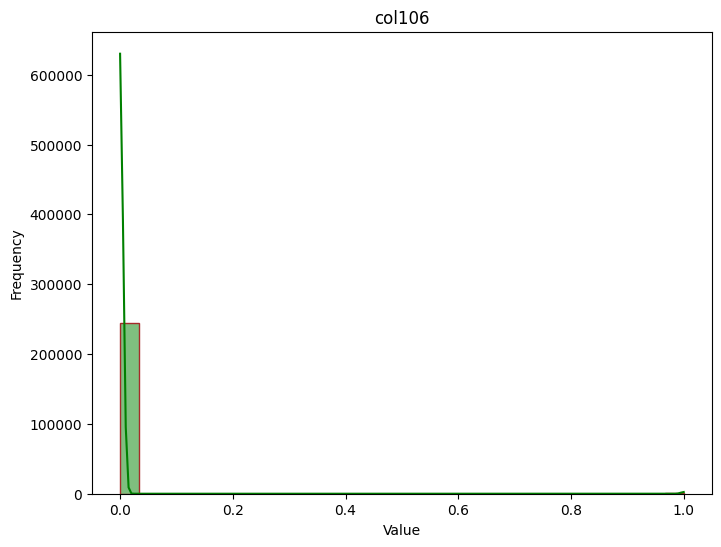

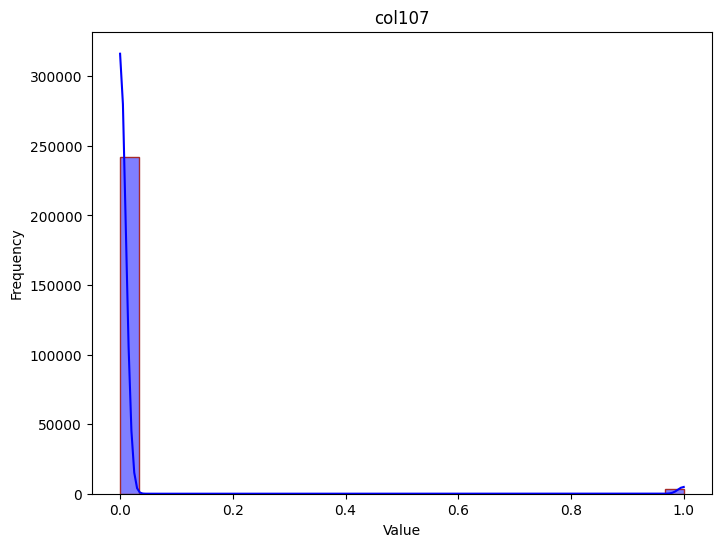

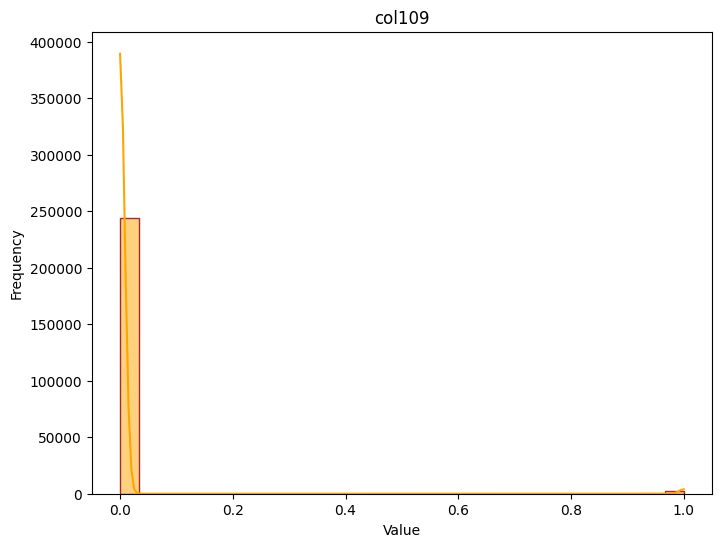

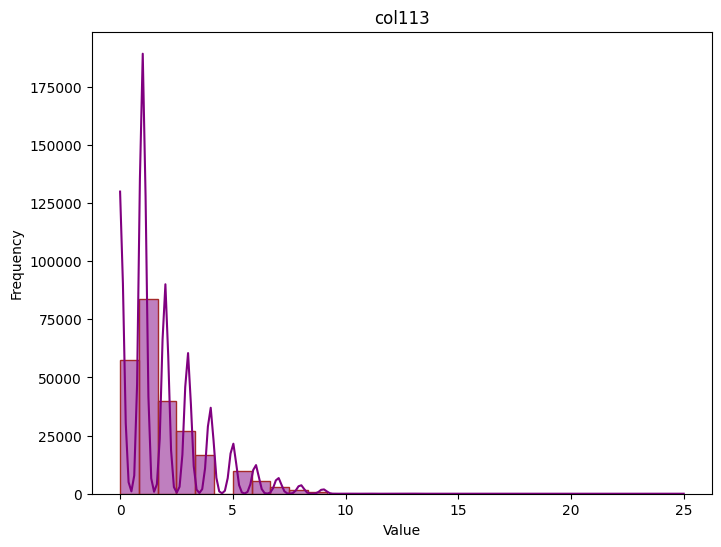

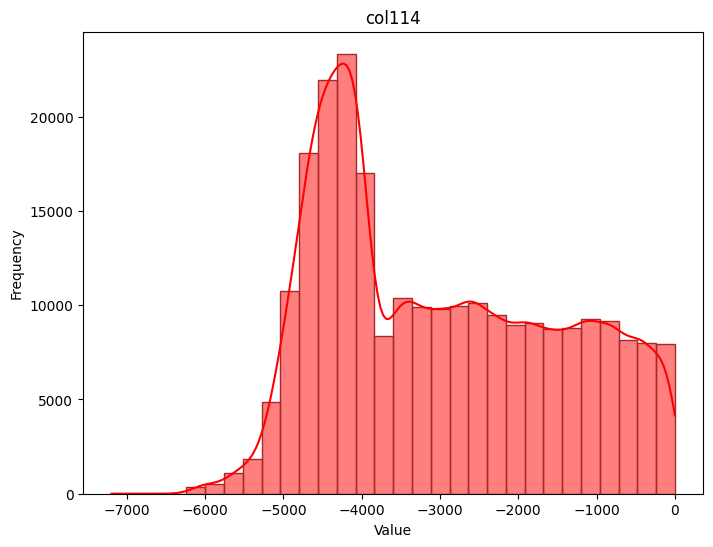

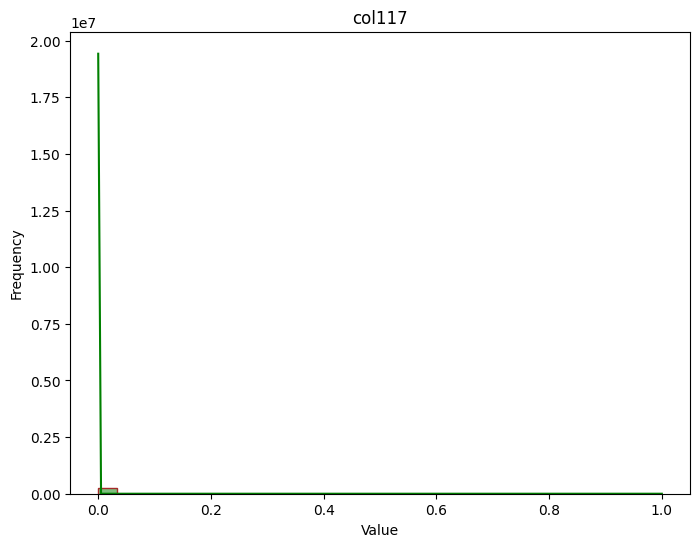

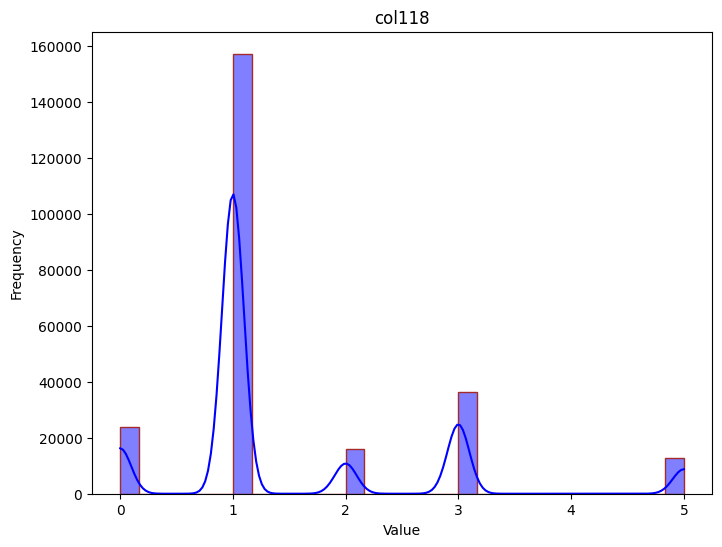

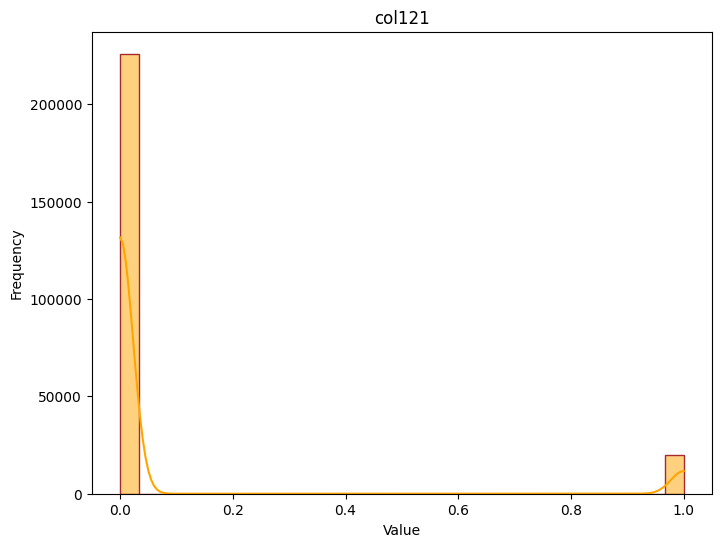

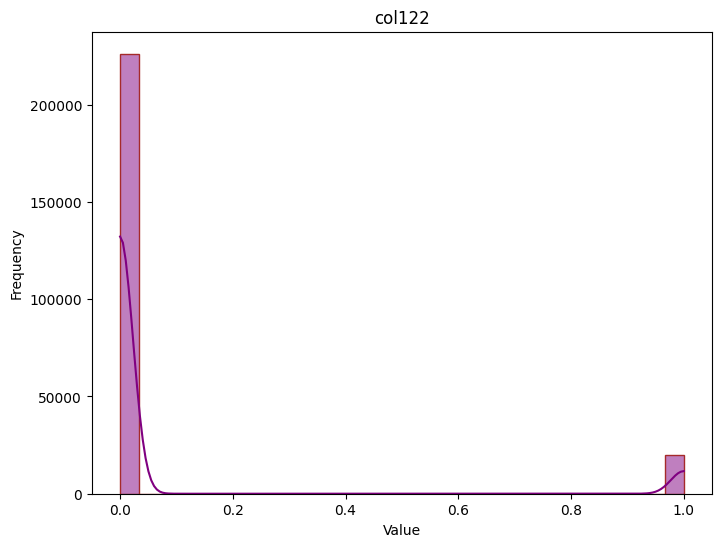

In [ ]:
# Farklı şekillerde histogram
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[col], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Renkli histogram
colors = ['red', 'green', 'blue', 'orange', 'purple']  # Renklerin listesi

for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(train[col], bins=30, kde=True, color=colors[i % len(colors)], edgecolor='brown')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


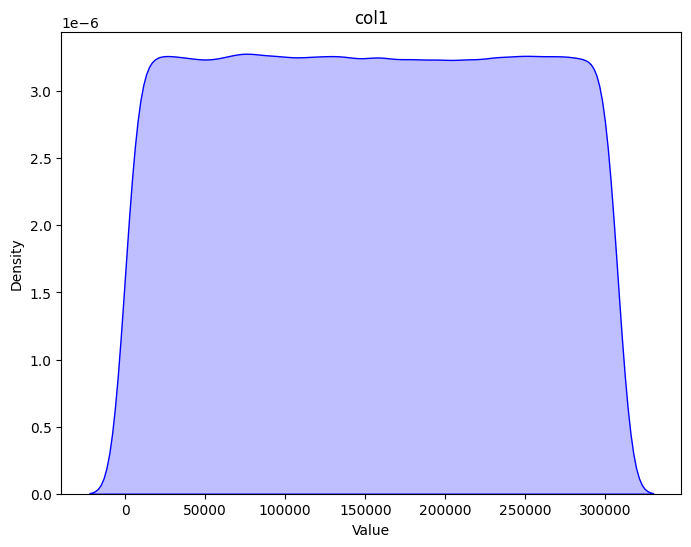

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


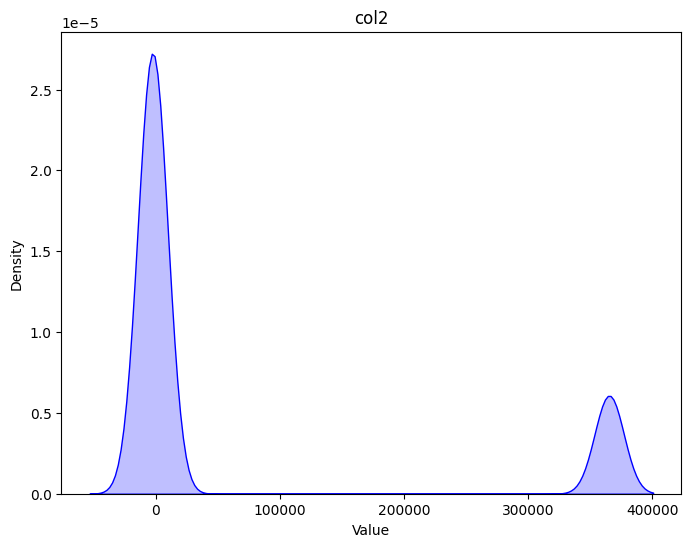

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


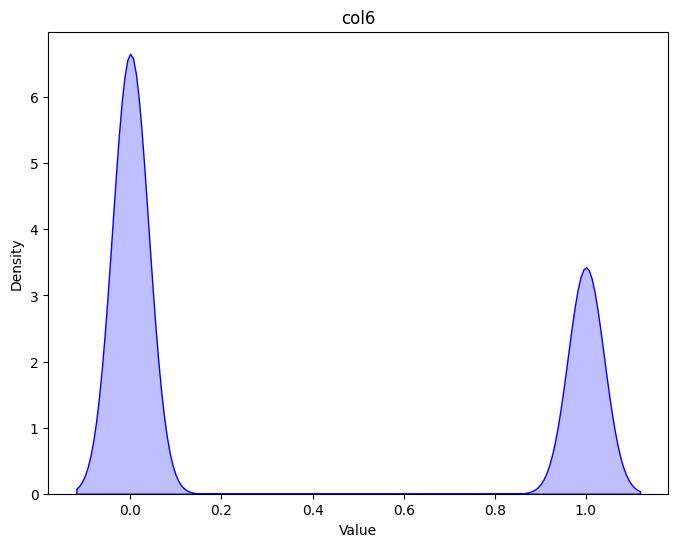

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


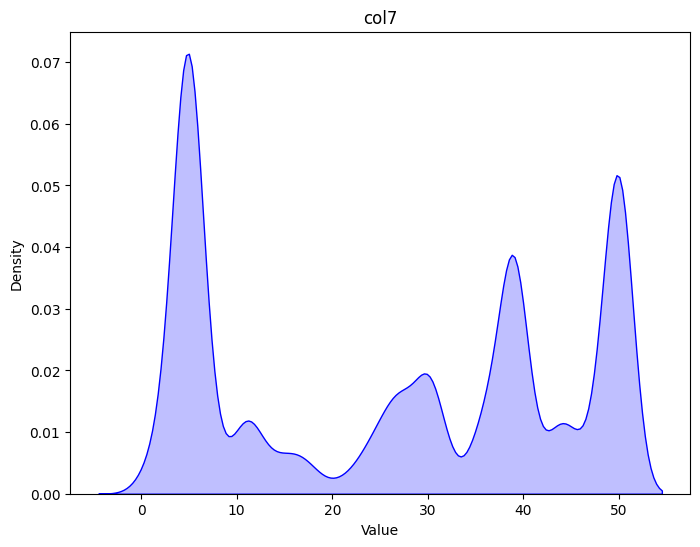

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


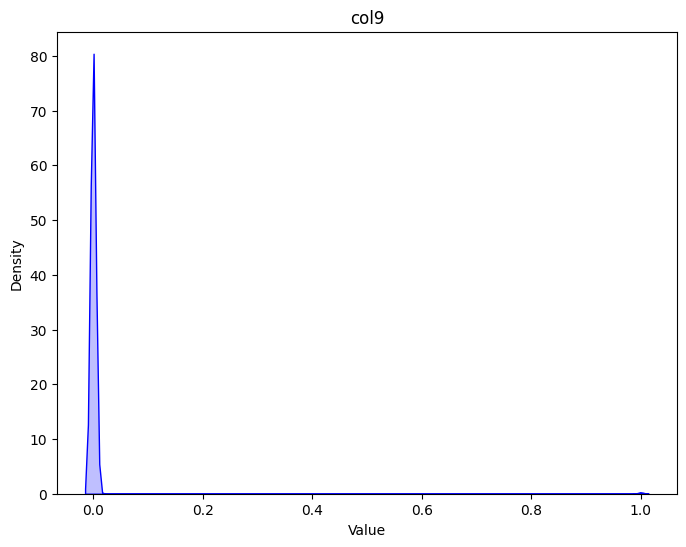

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


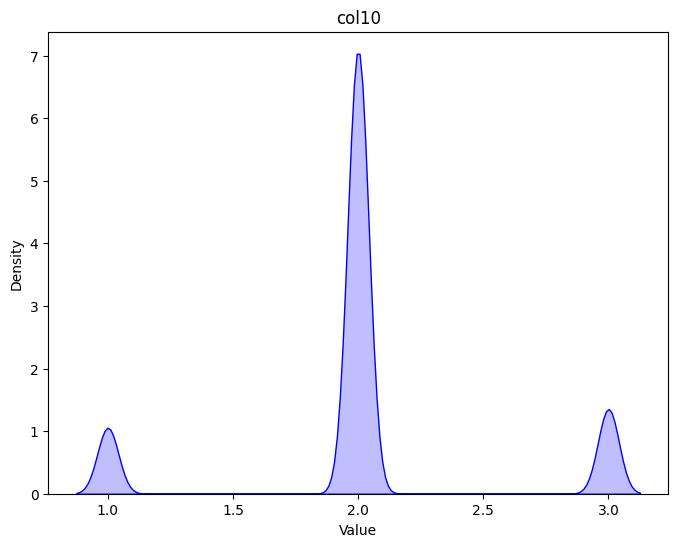

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


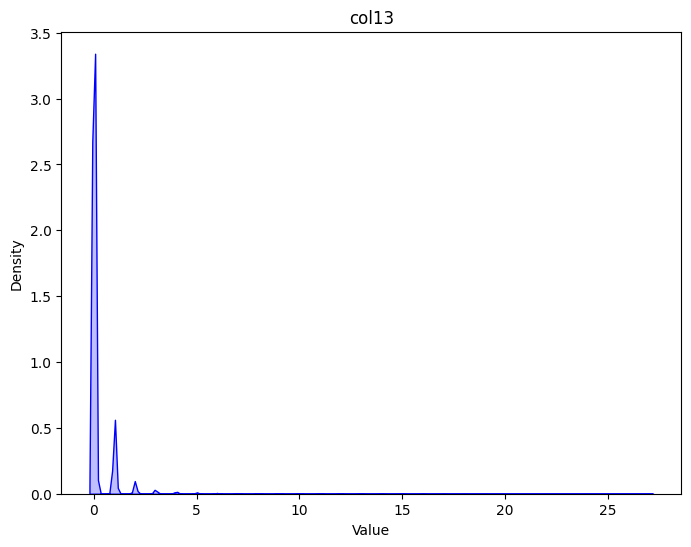

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


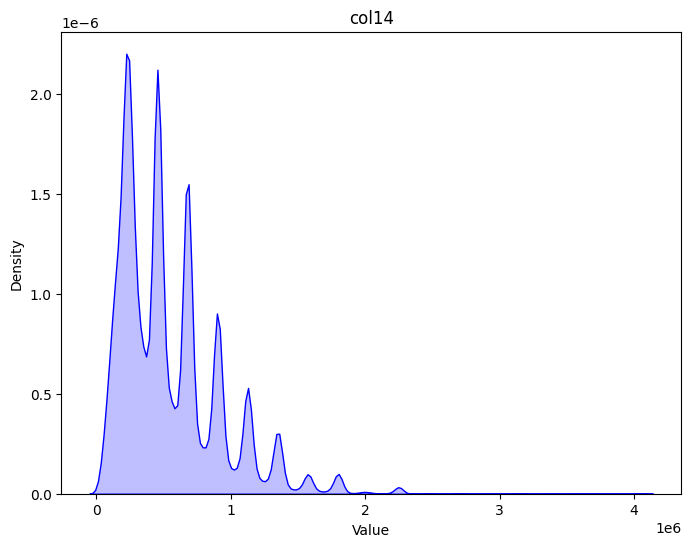

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


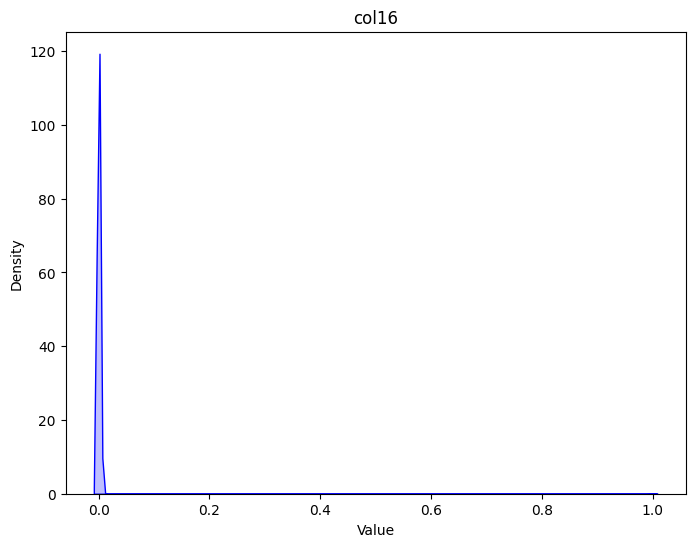

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


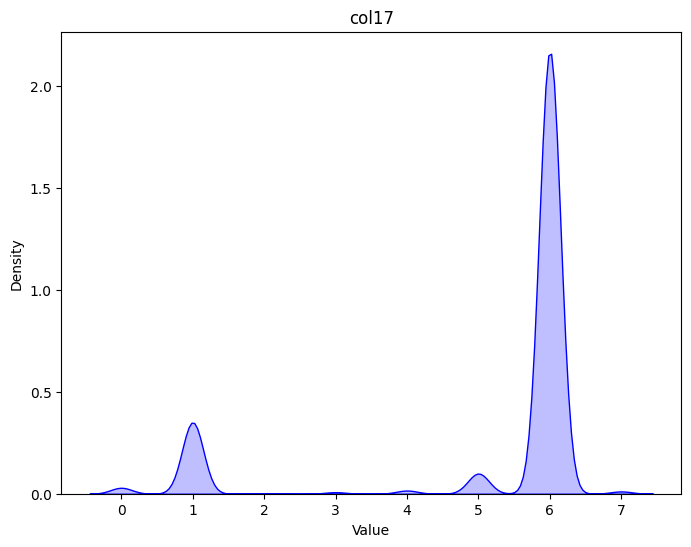

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


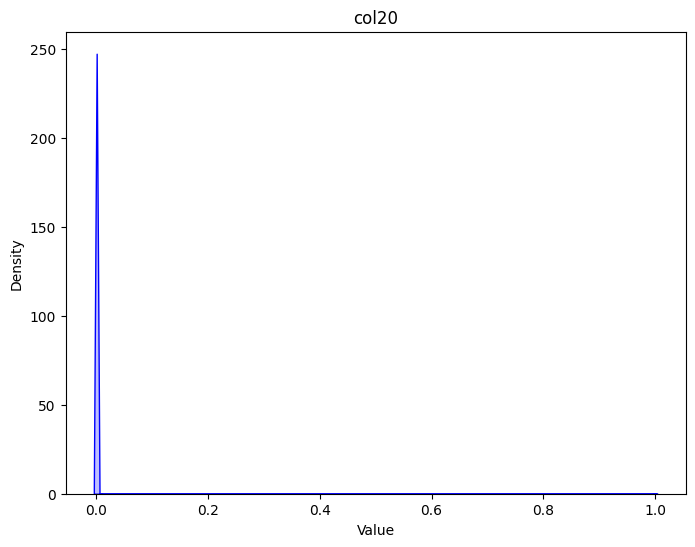

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


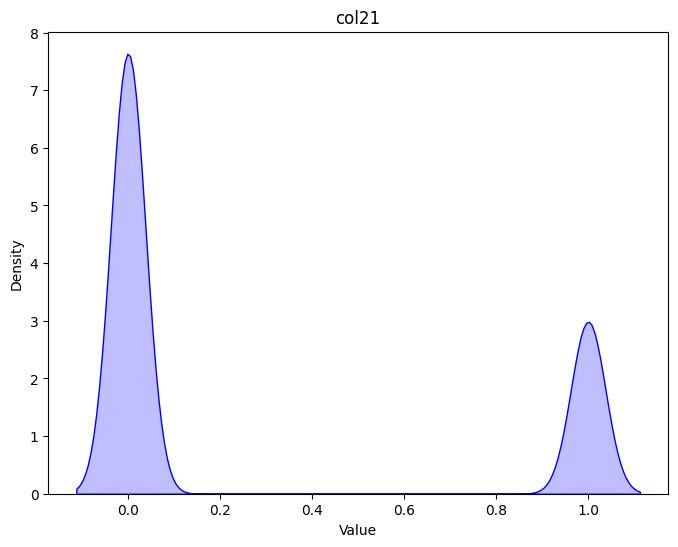

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


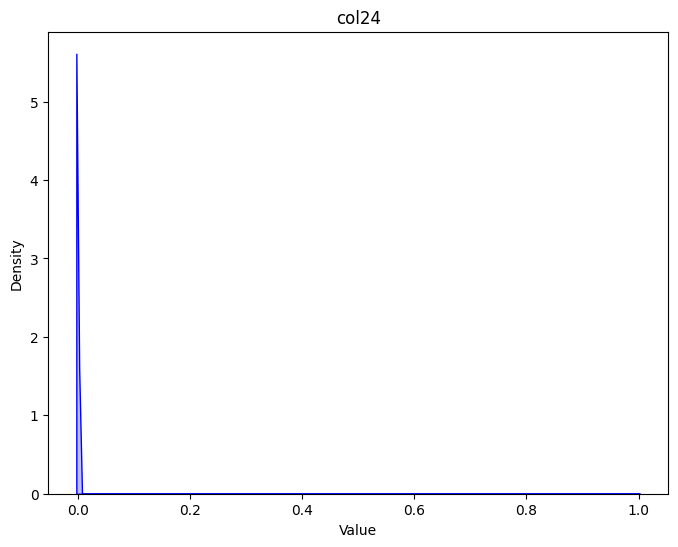

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


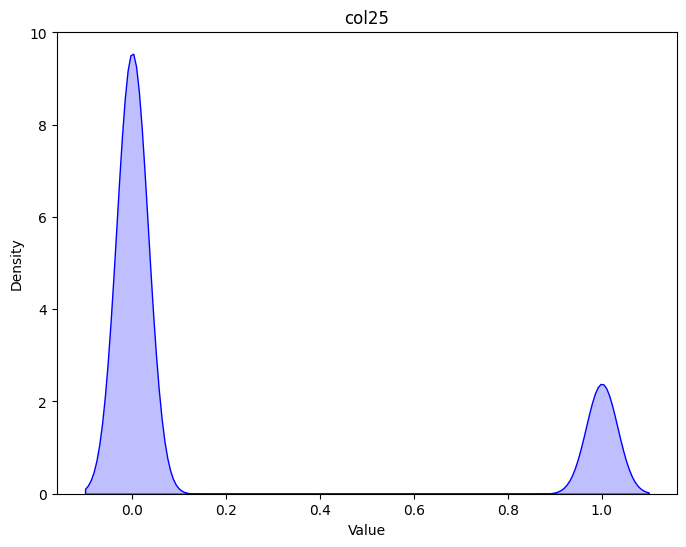

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


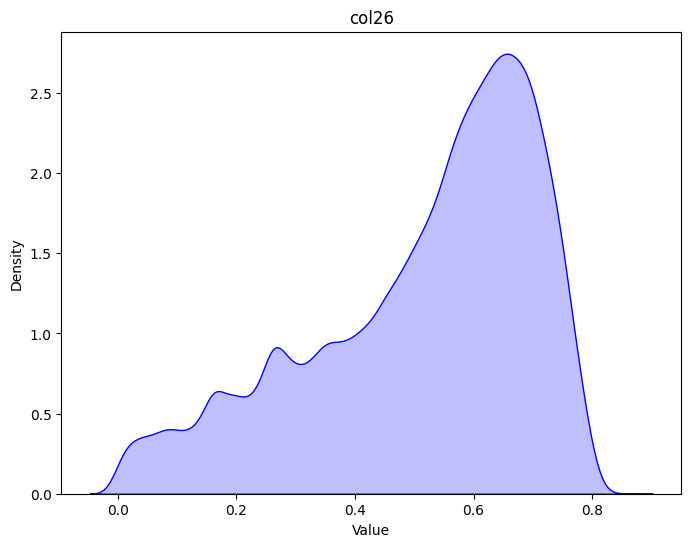

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


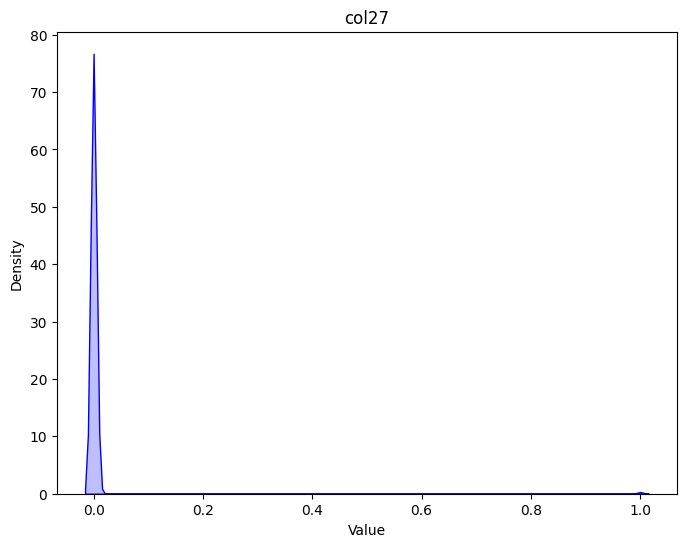

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


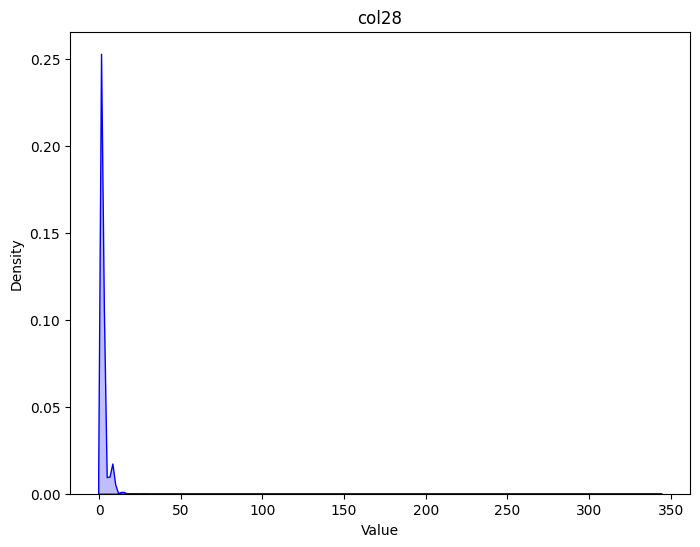

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


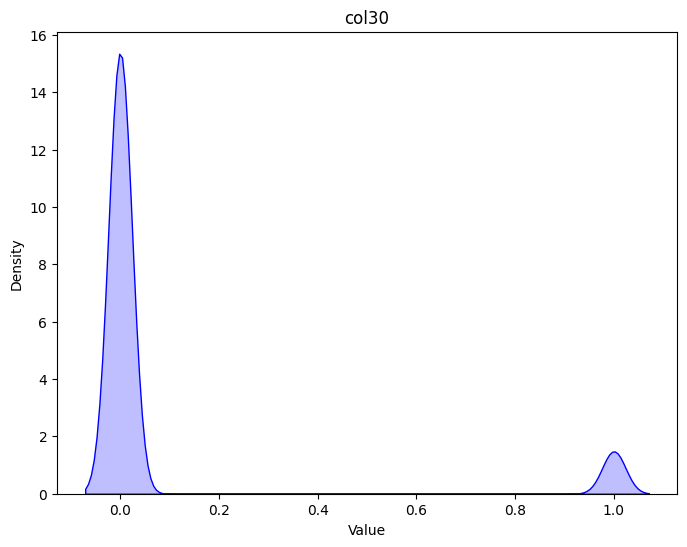

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


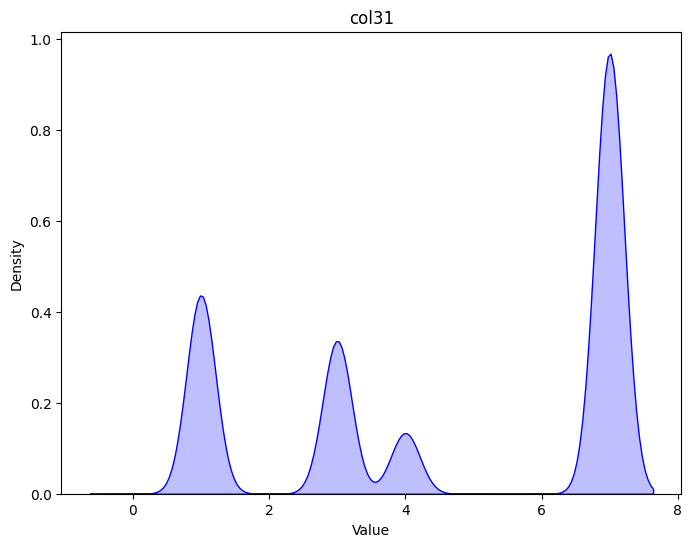

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


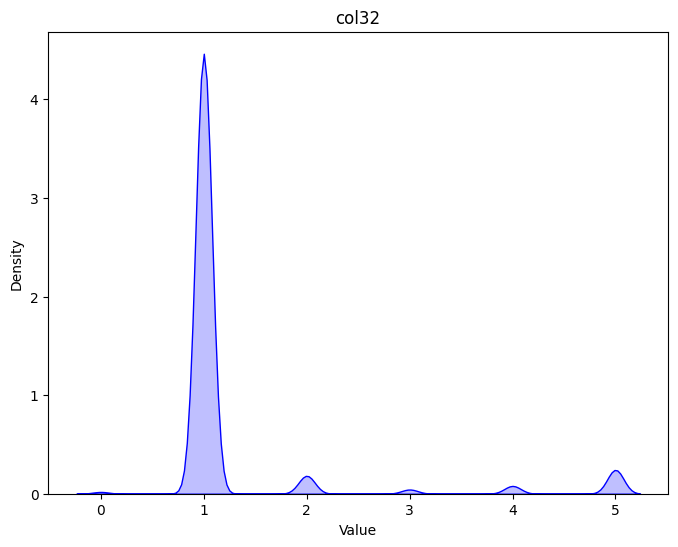

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


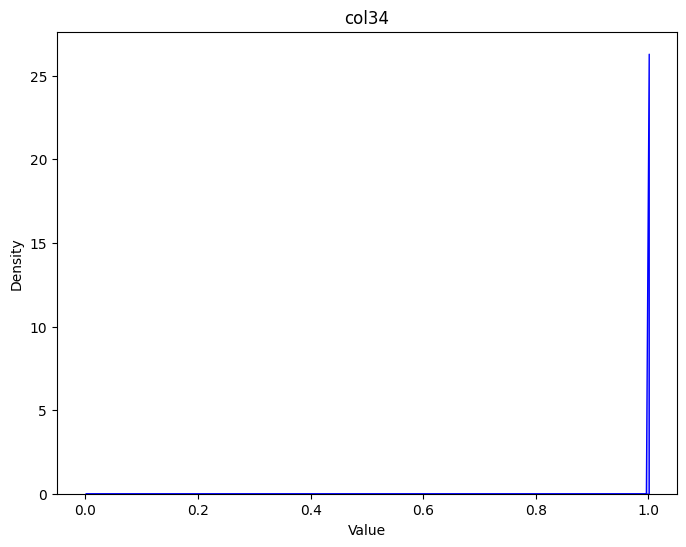

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


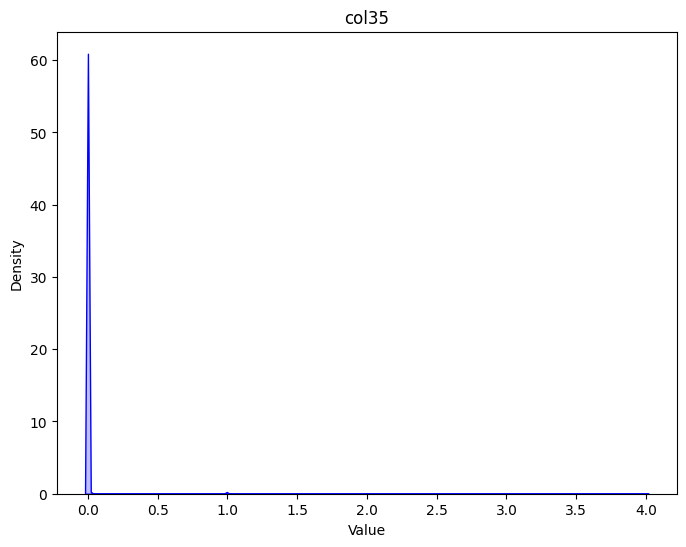

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


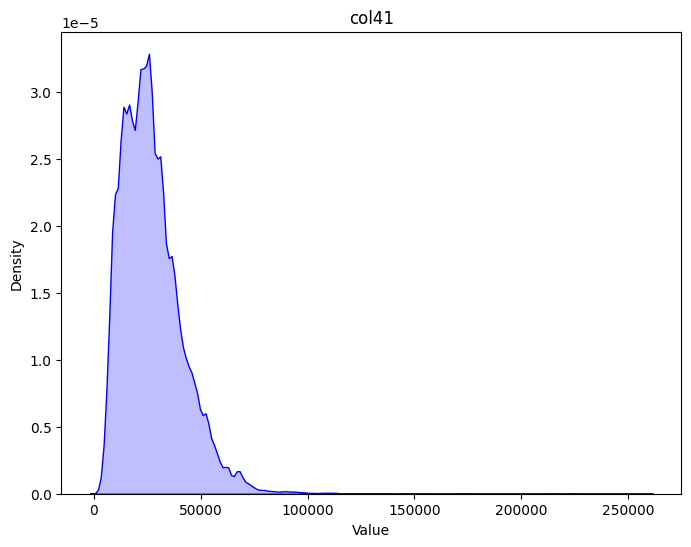

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


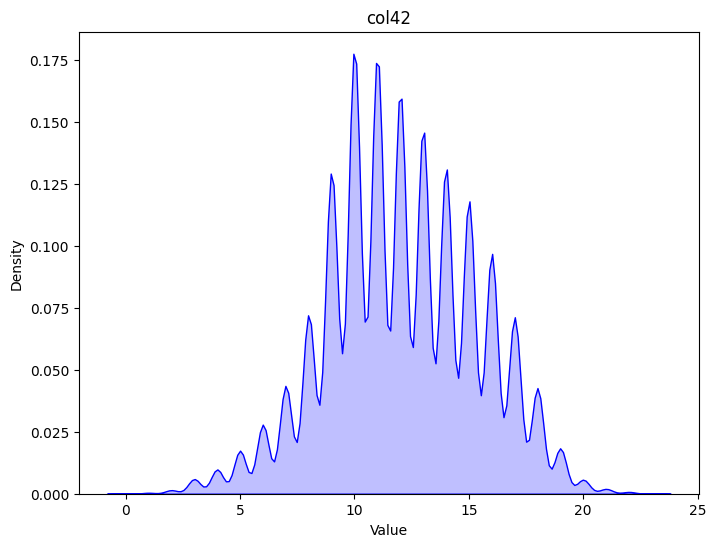

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


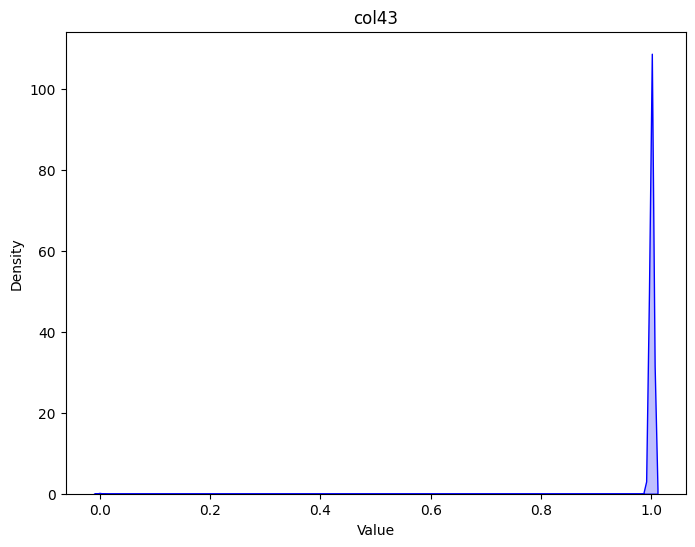

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


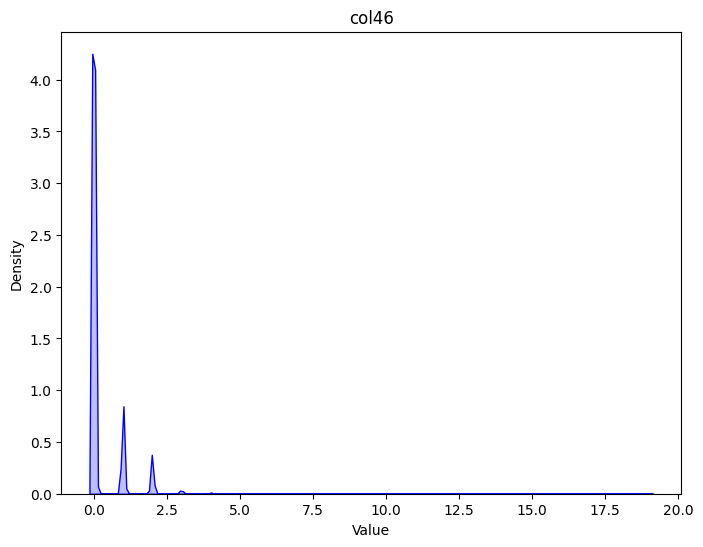

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


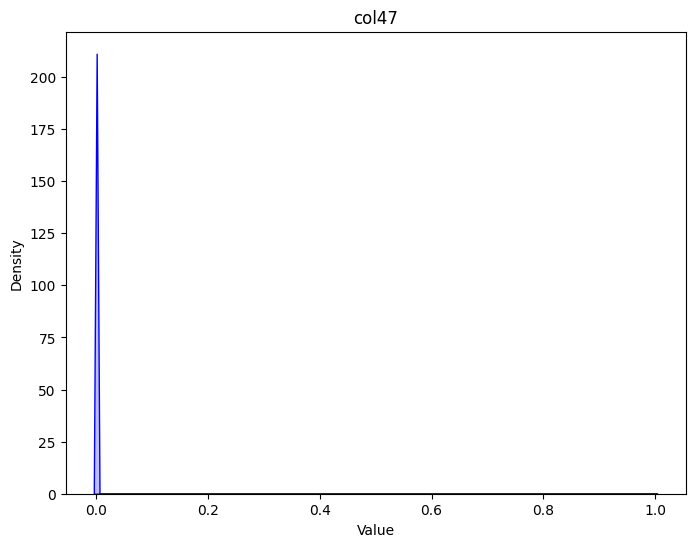

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


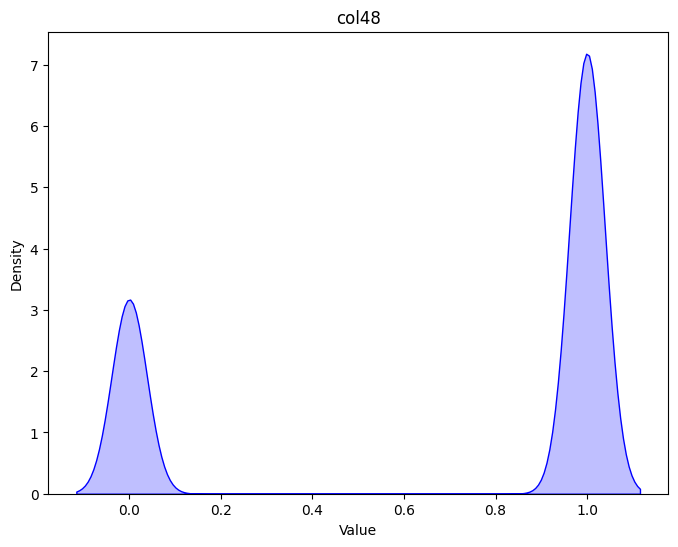

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


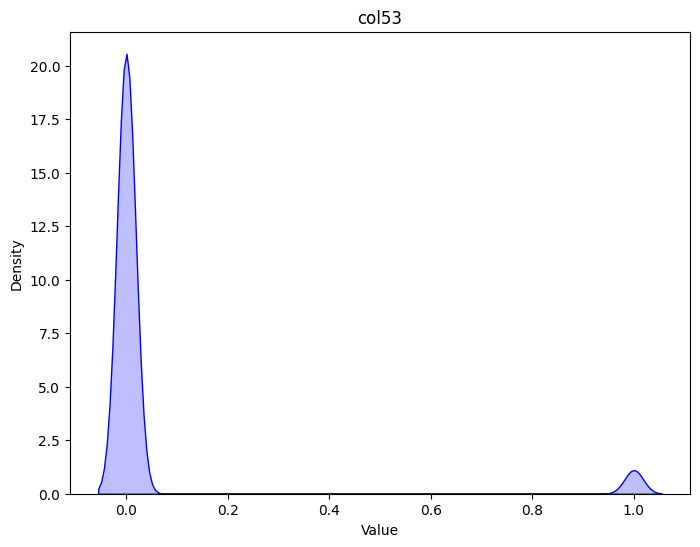

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


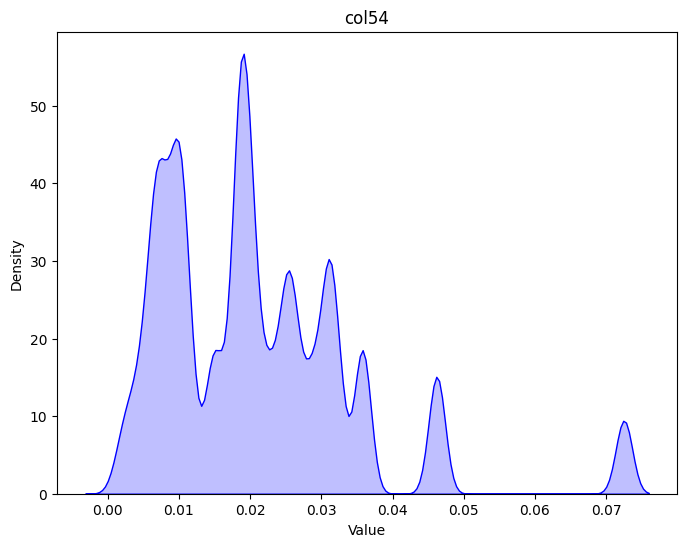

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


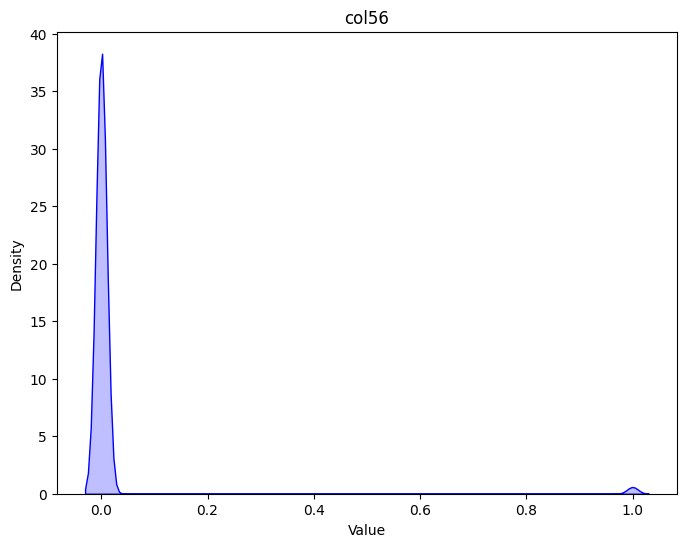

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


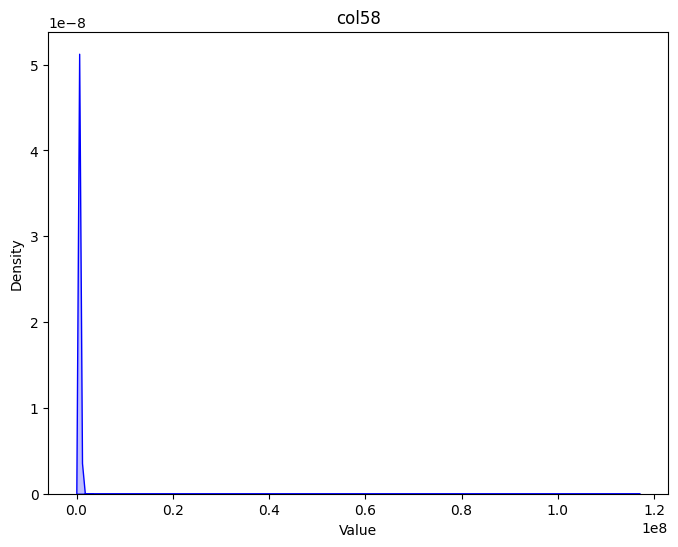

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


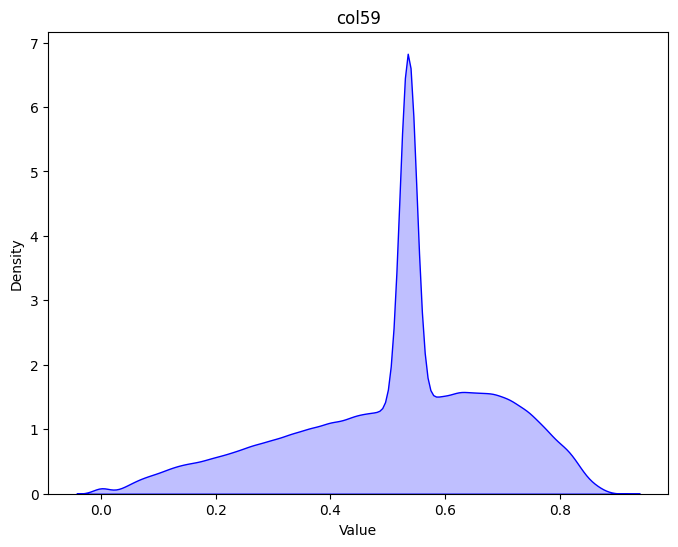

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


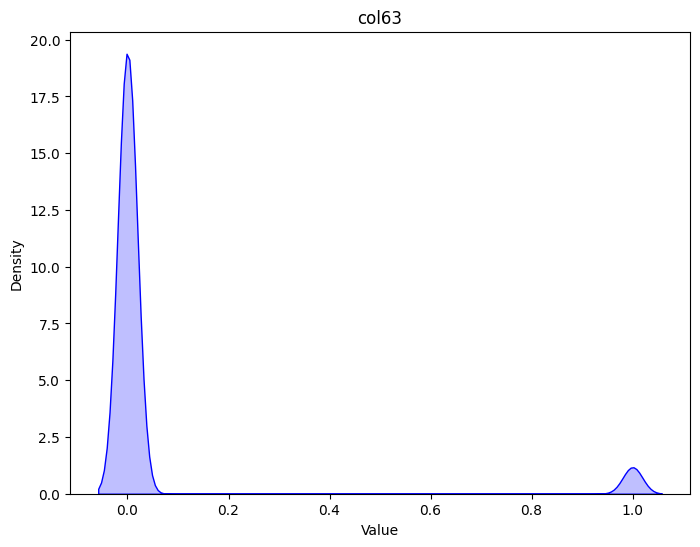

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


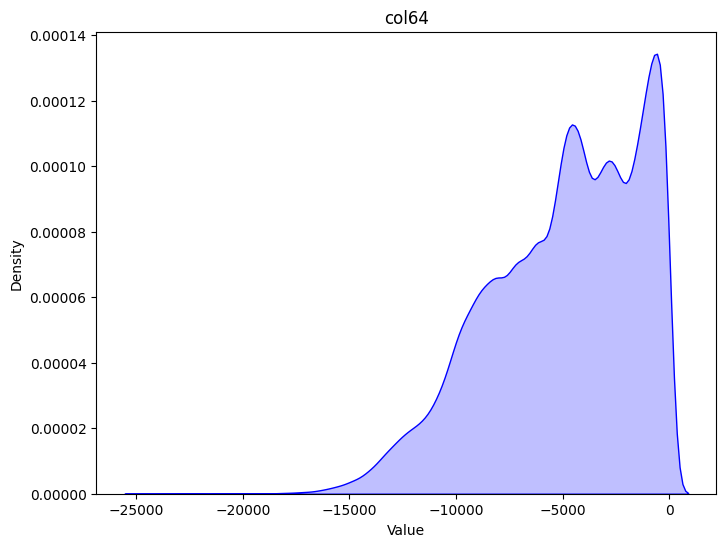

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


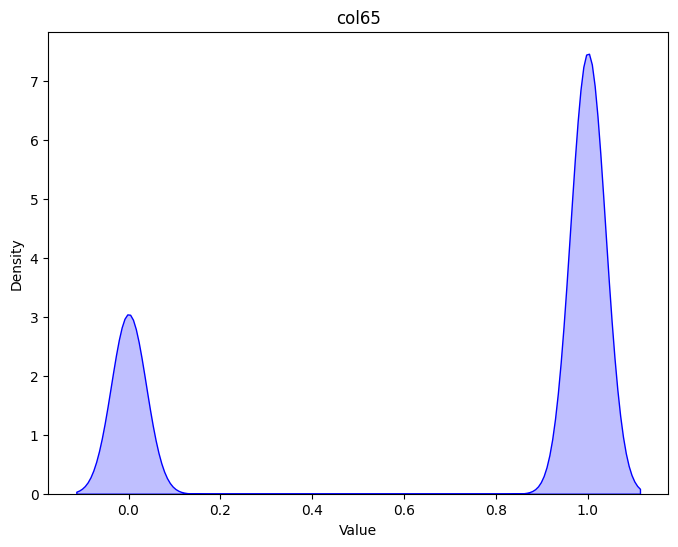

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


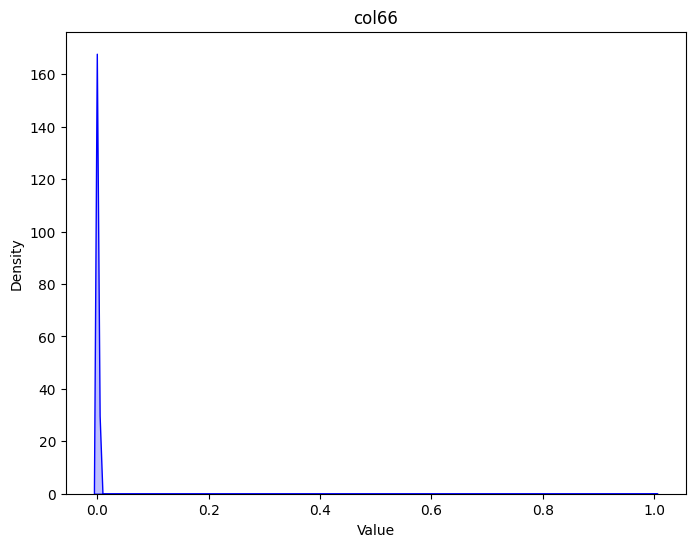

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


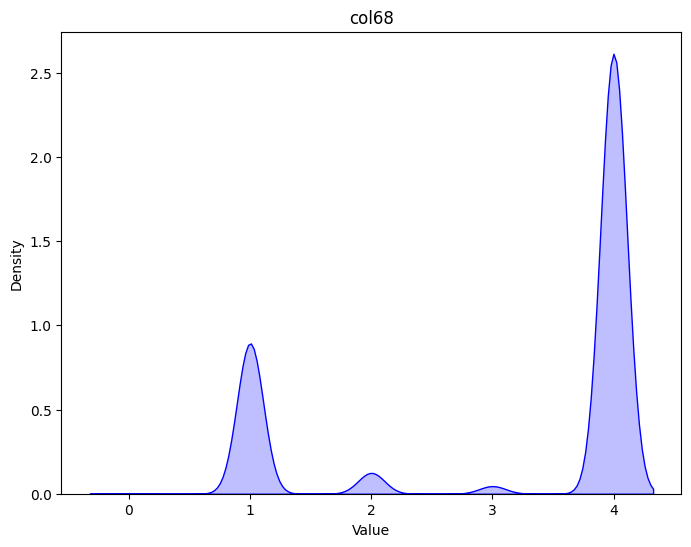

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


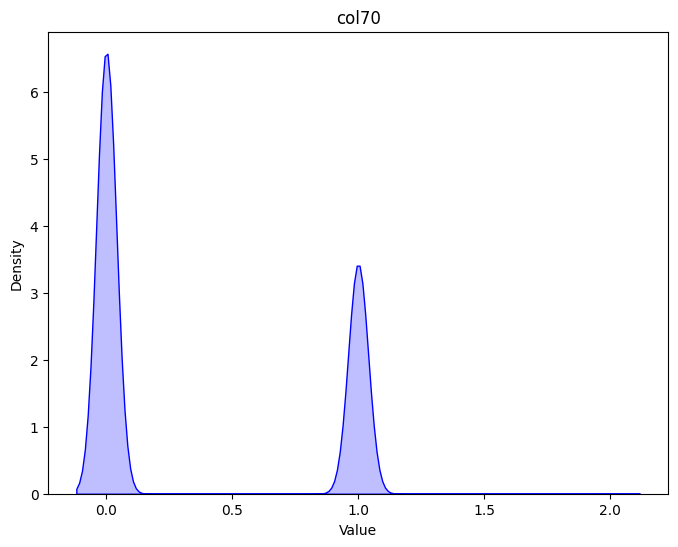

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


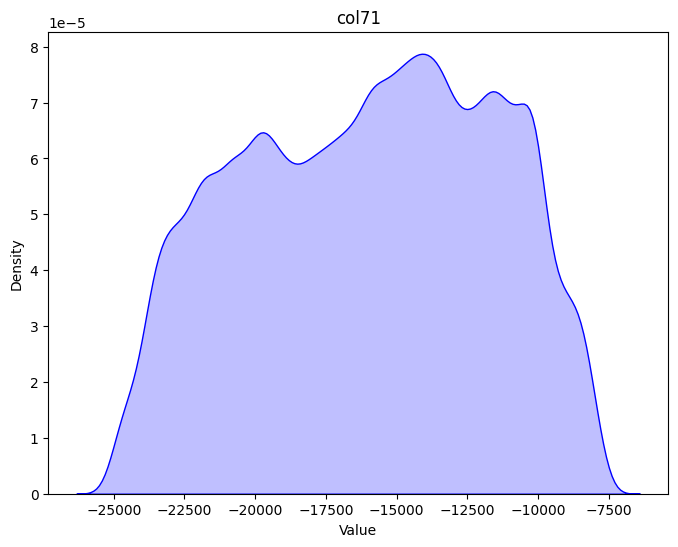

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


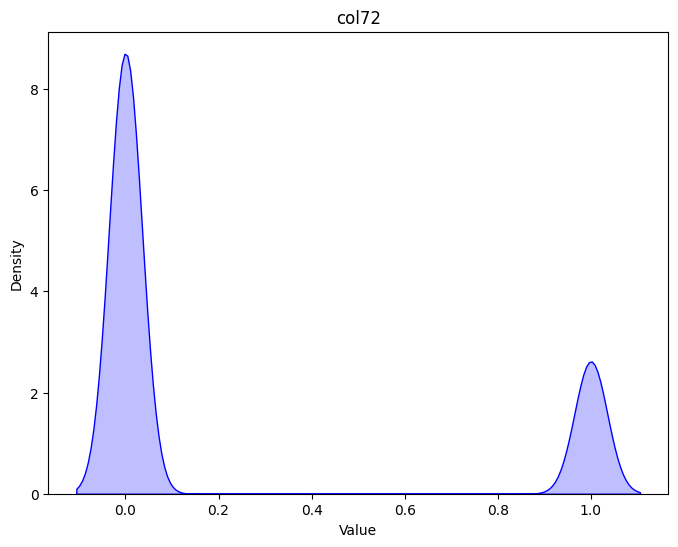

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


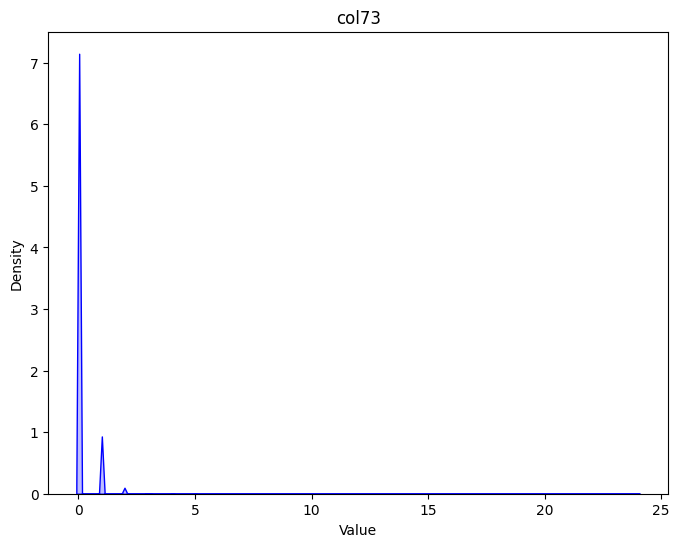

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


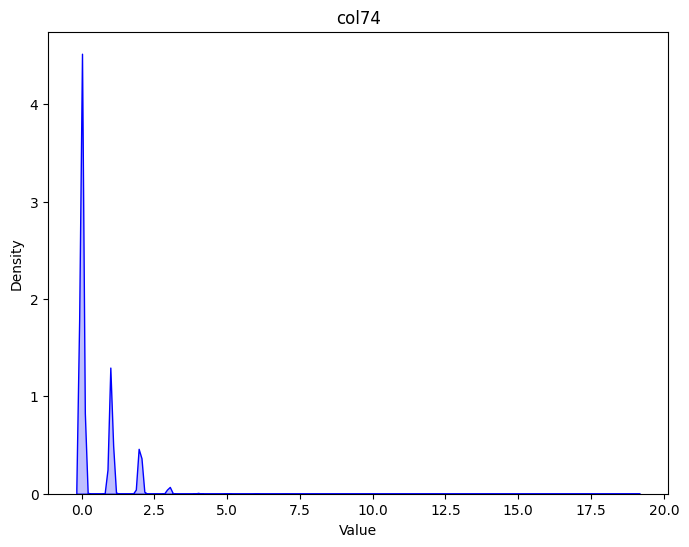

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


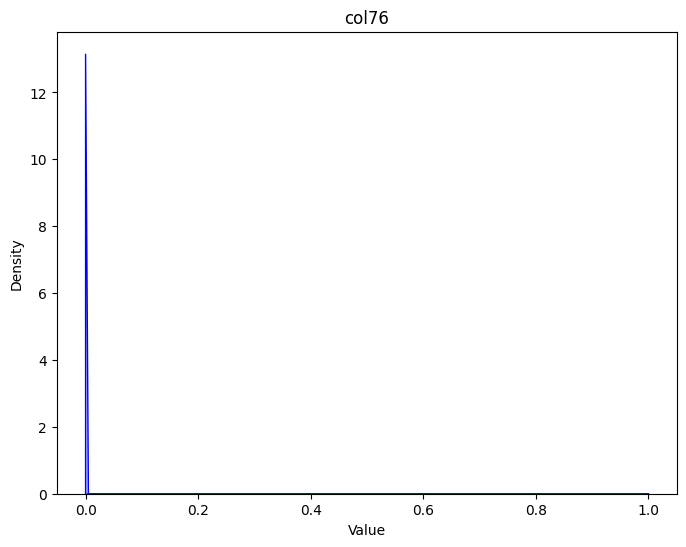

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


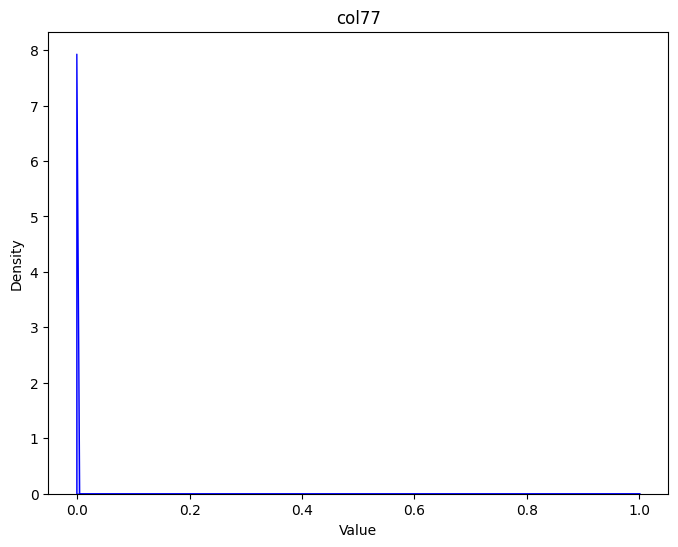

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


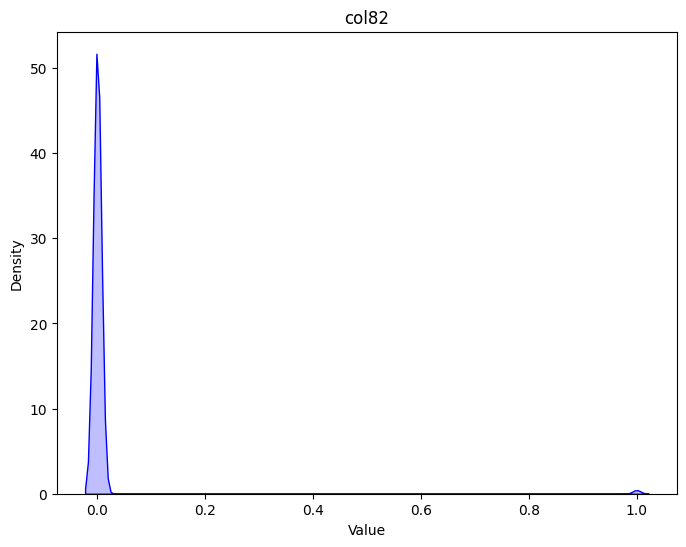

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


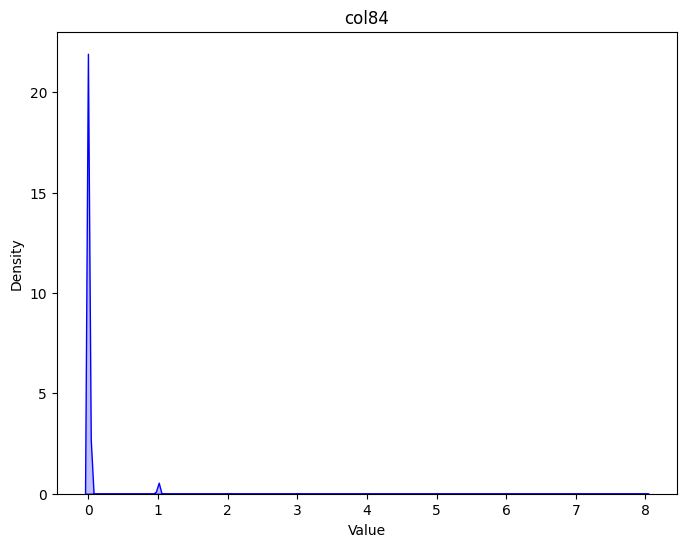

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


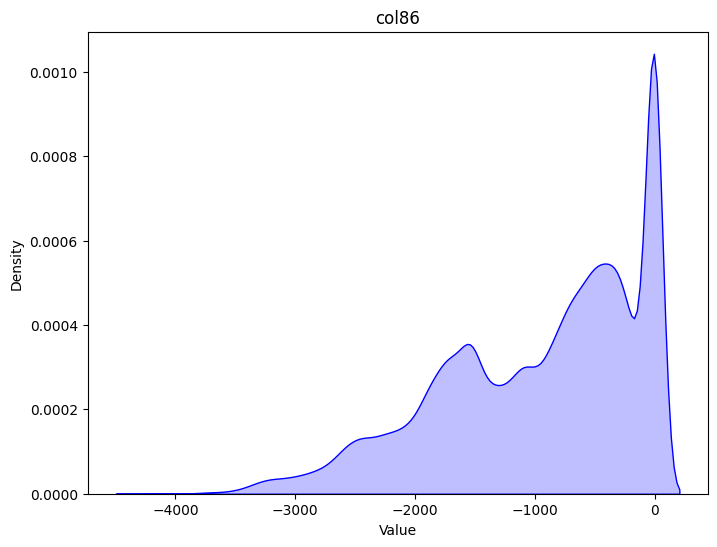

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


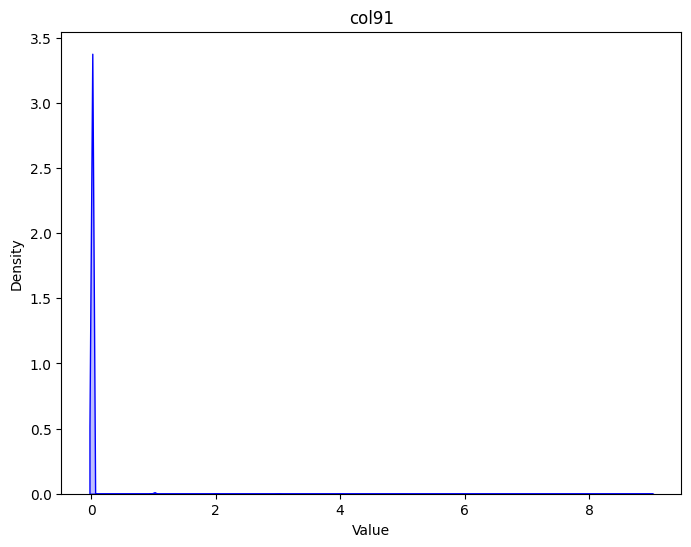

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


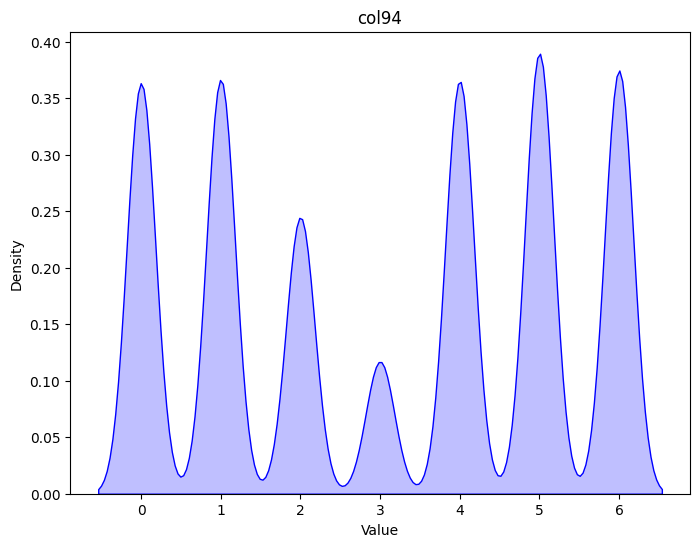

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


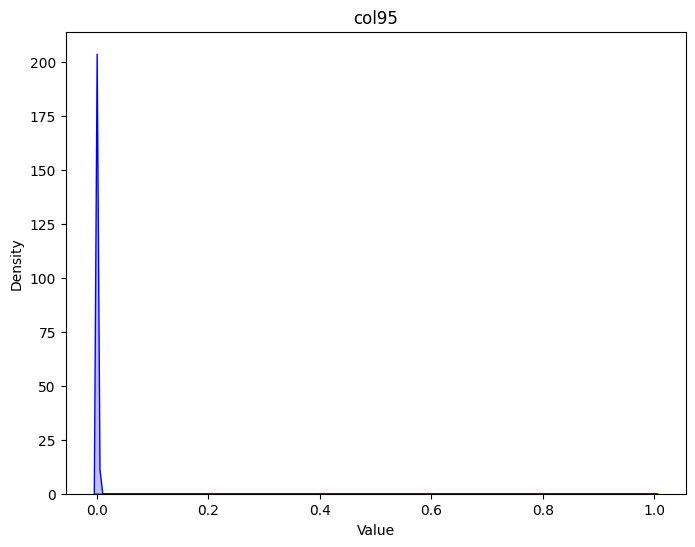

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


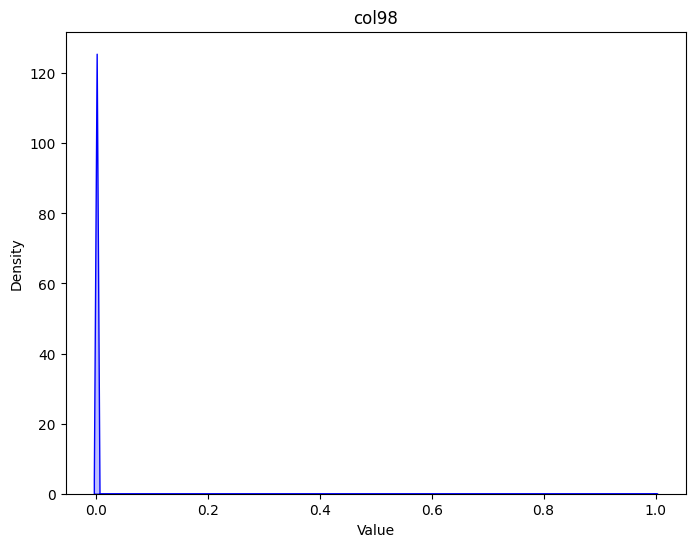

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


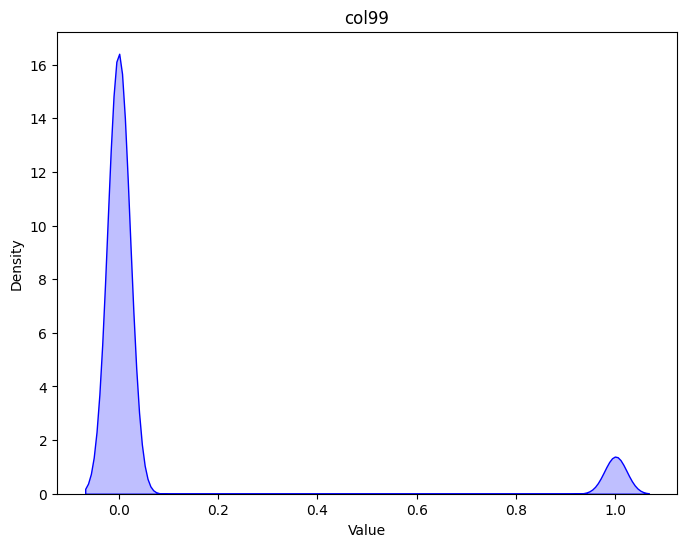

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


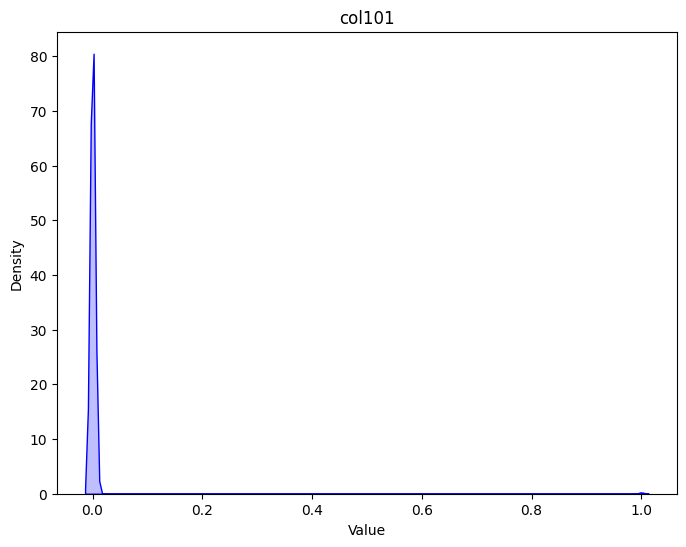

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


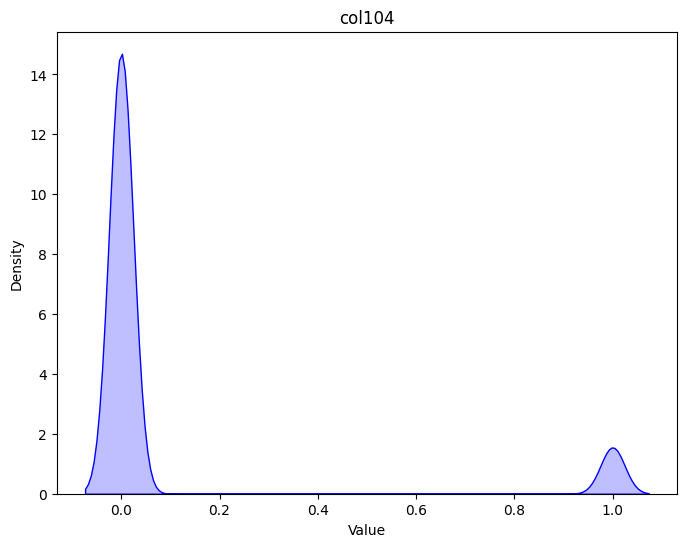

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


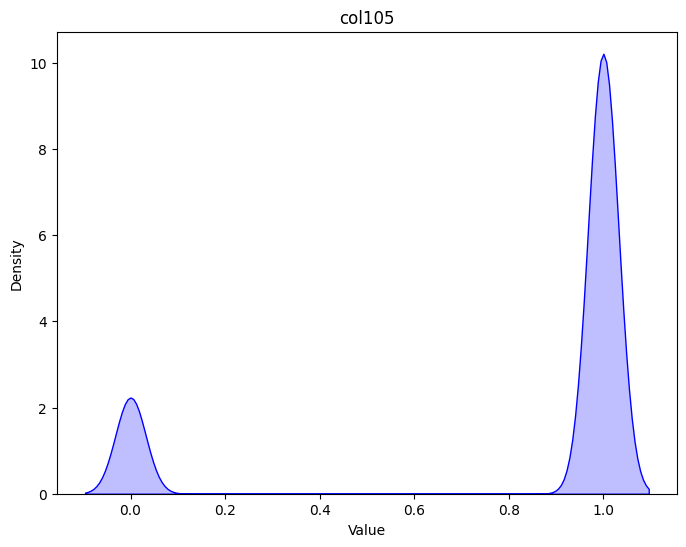

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


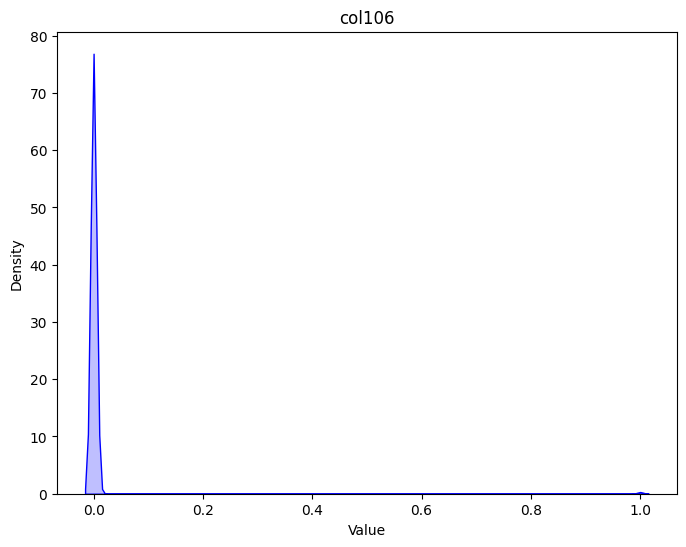

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


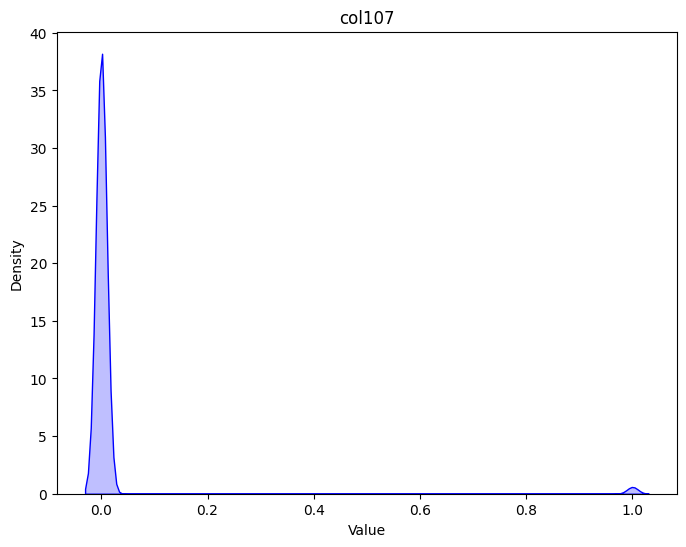

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


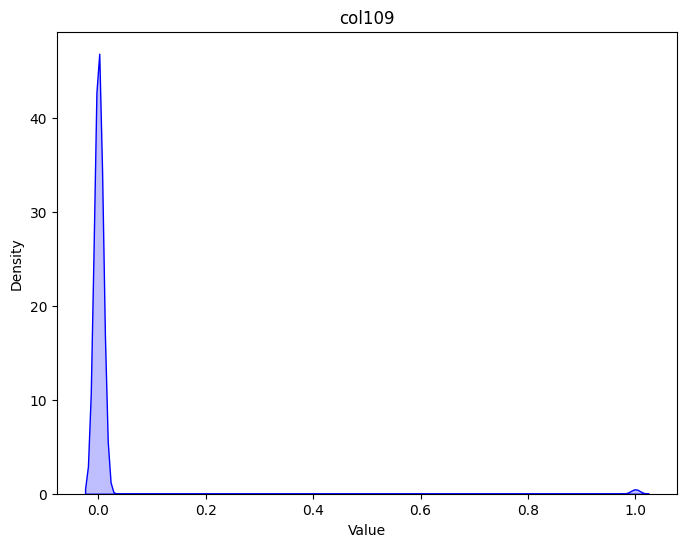

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


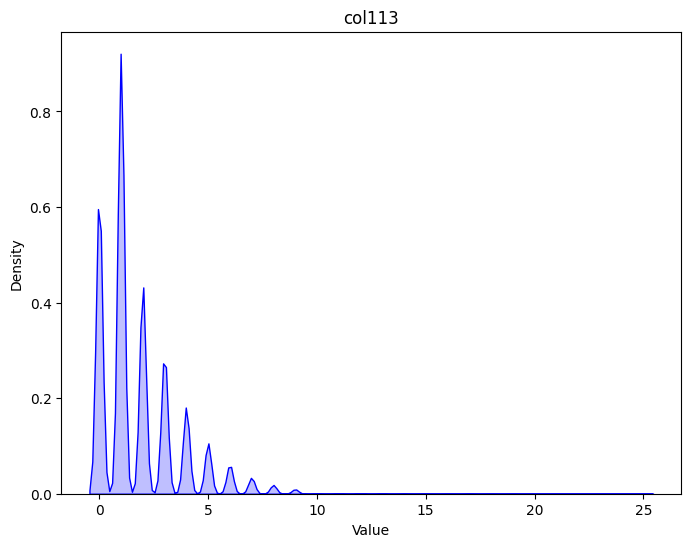

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


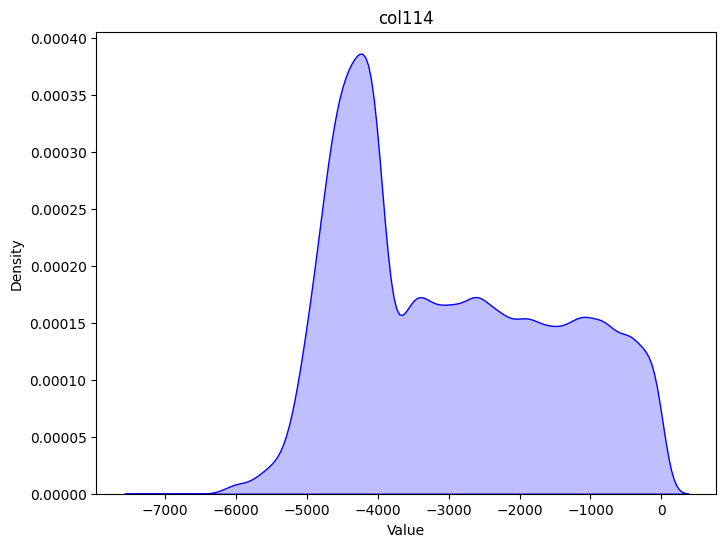

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


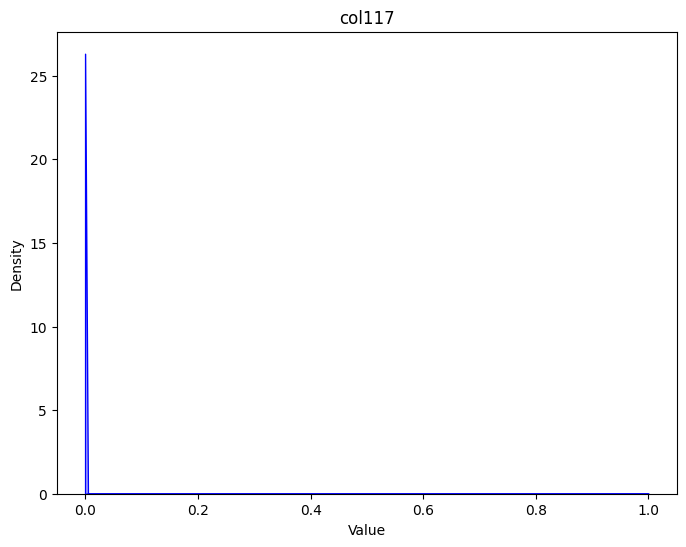

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


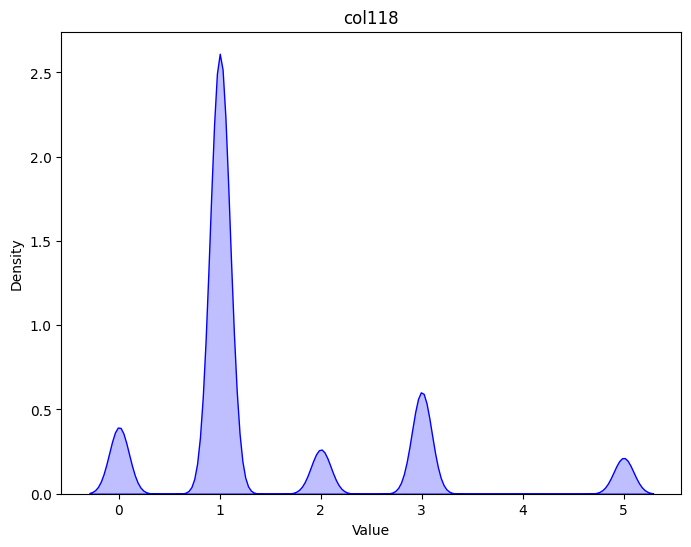

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


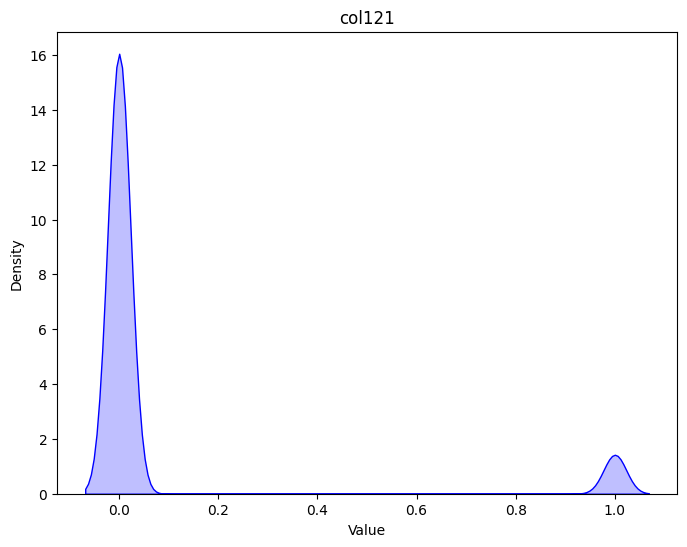

<ipython-input-42-1988238f55b1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


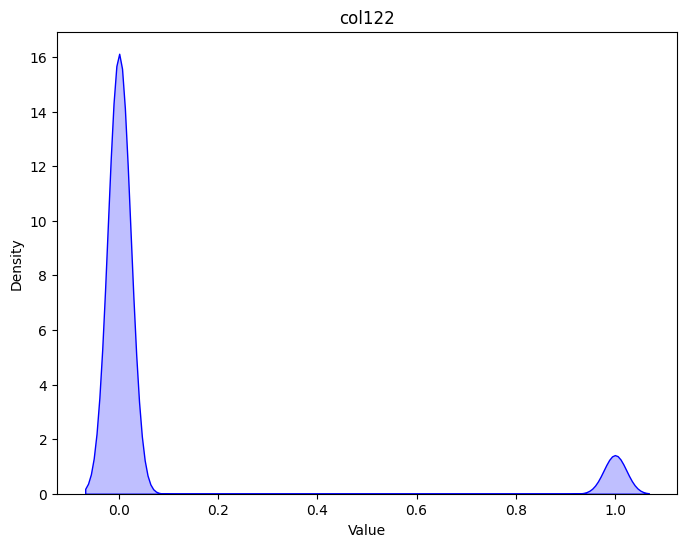

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(train[col], color='blue', shade=True)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()


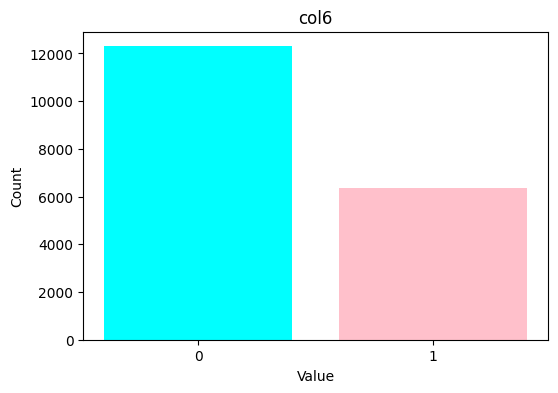

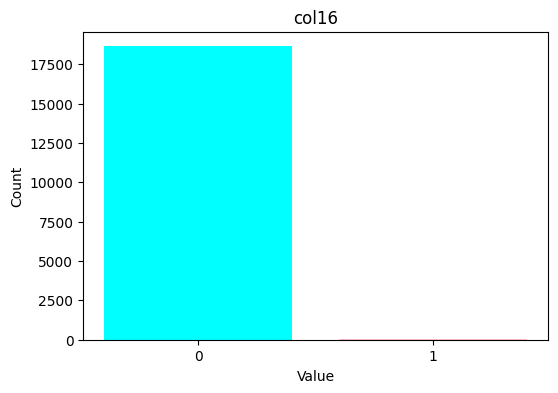

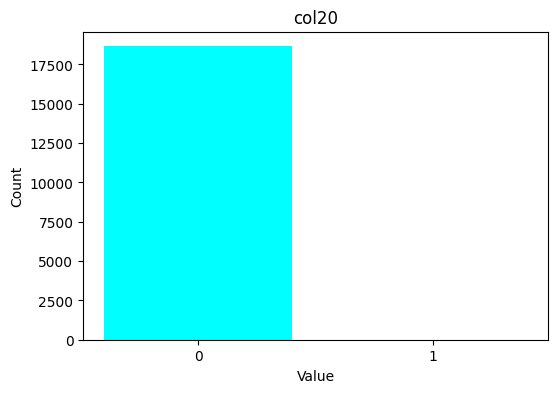

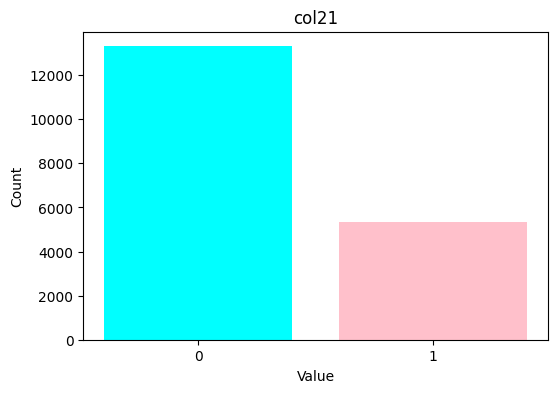

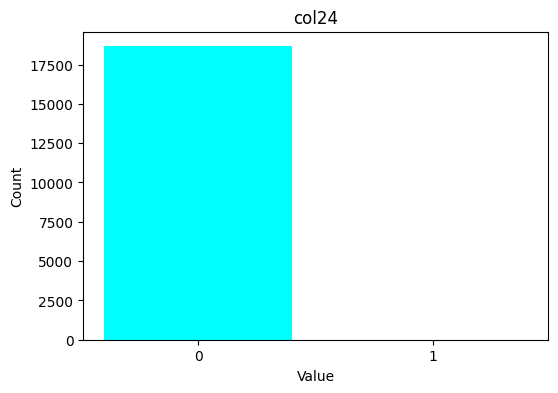

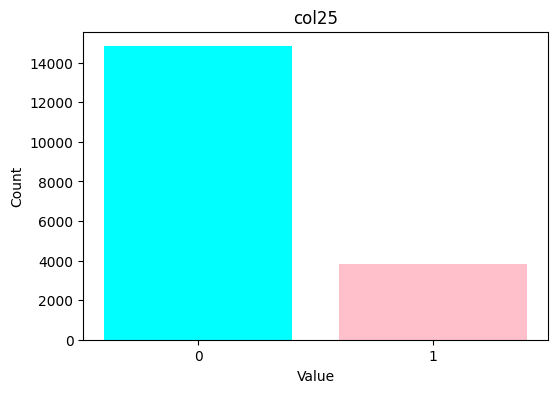

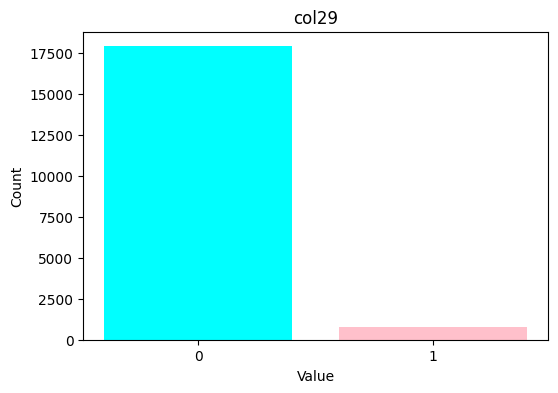

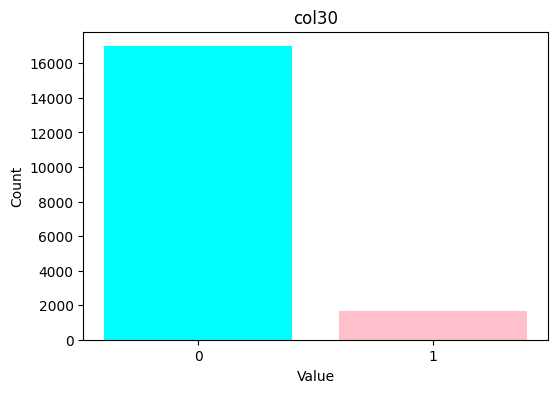

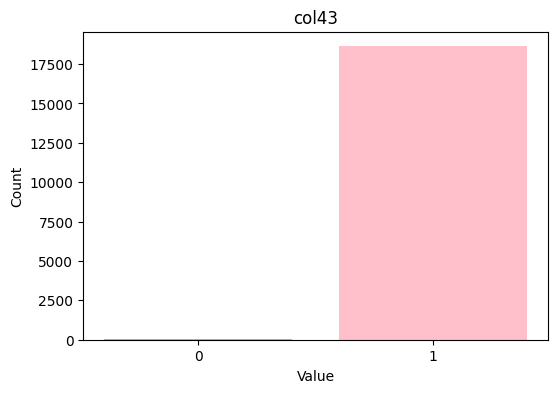

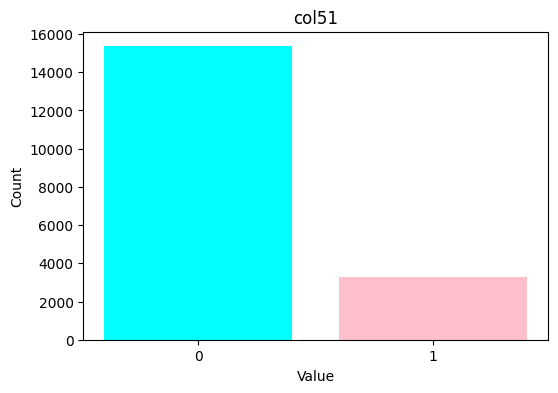

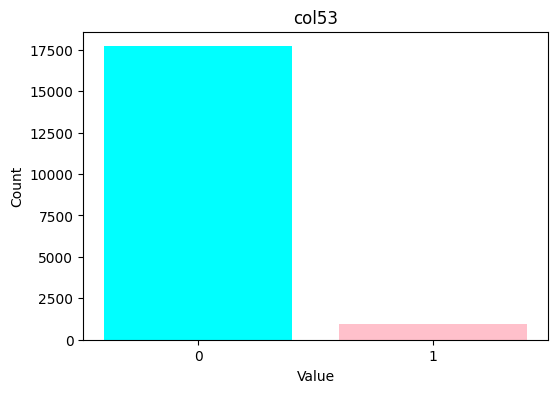

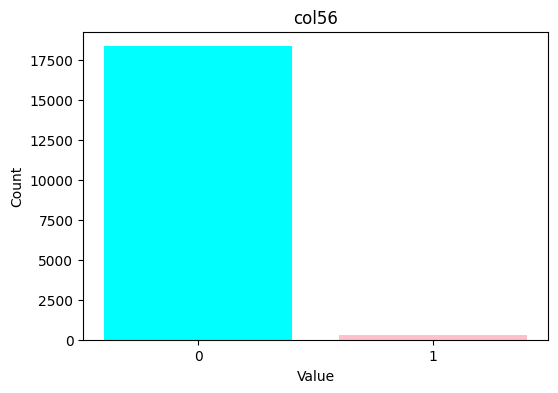

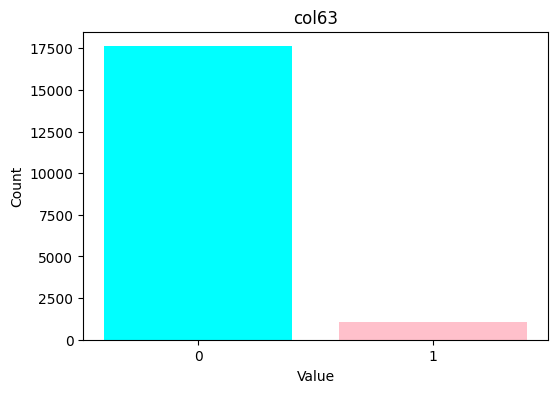

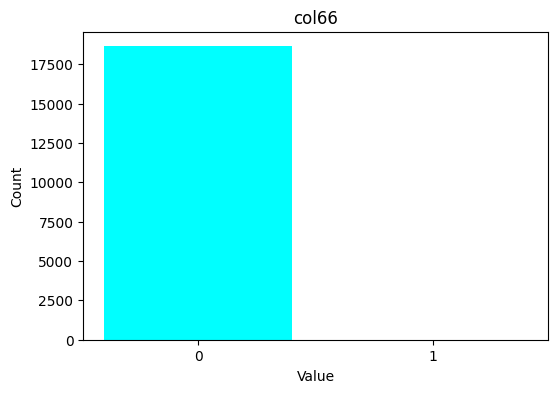

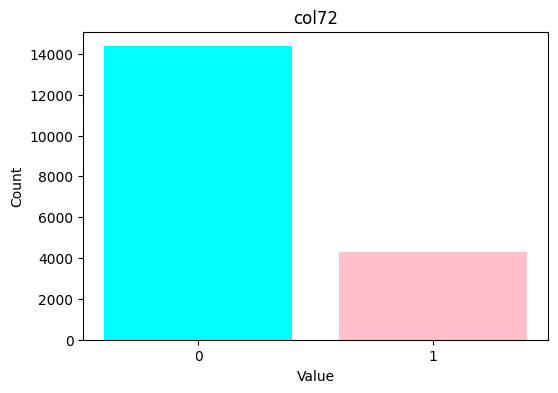

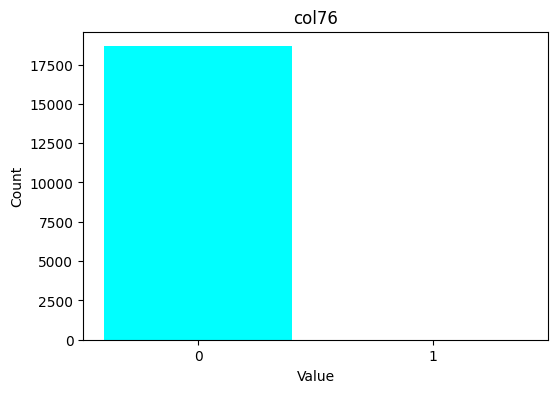

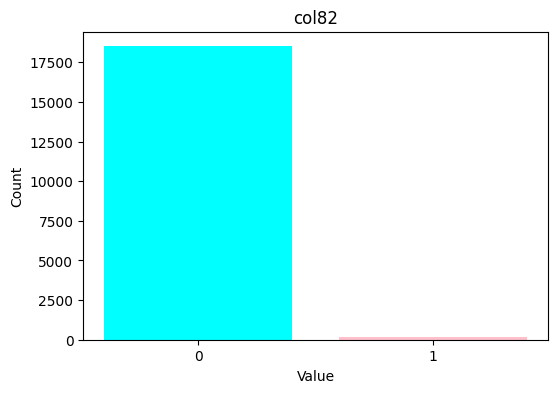

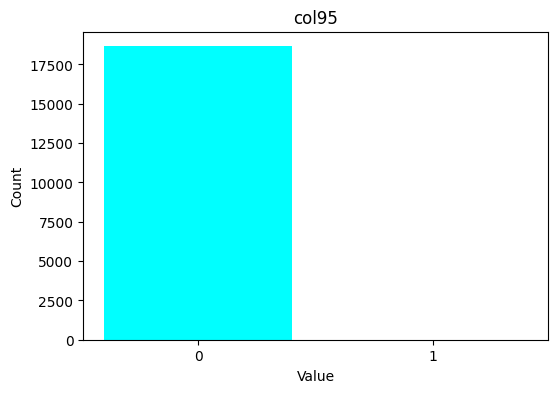

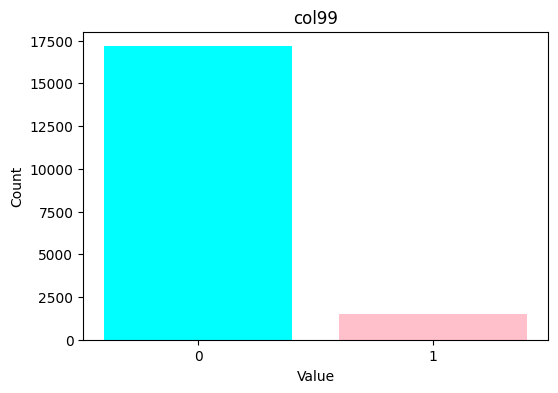

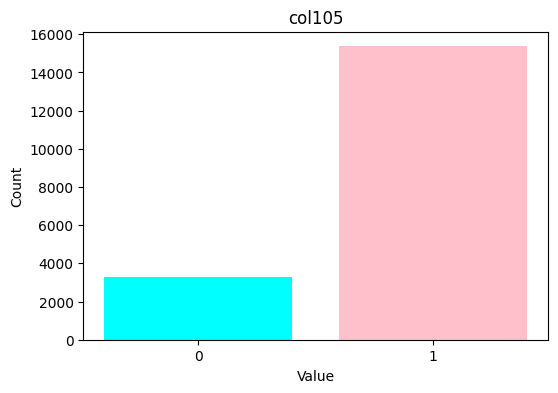

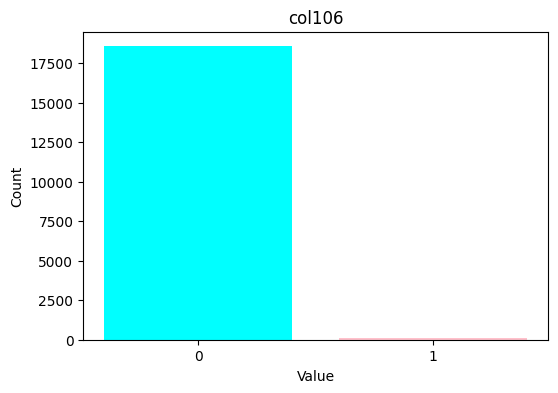

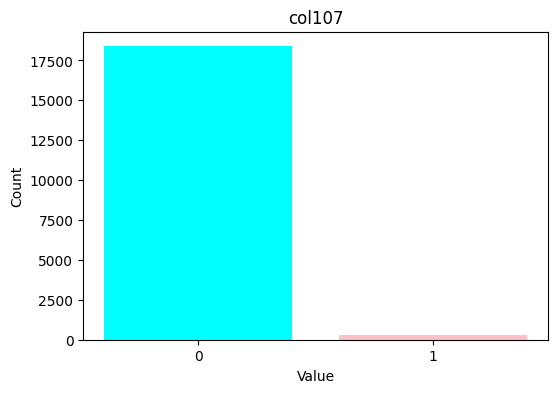

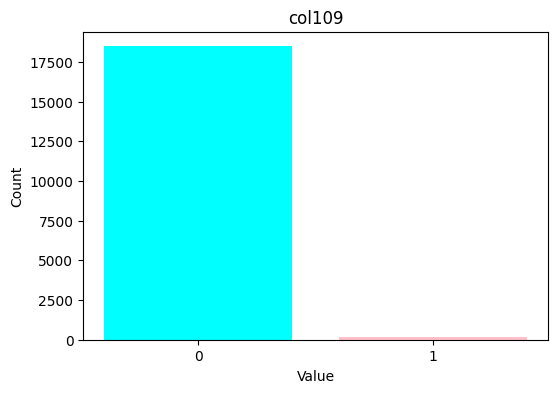

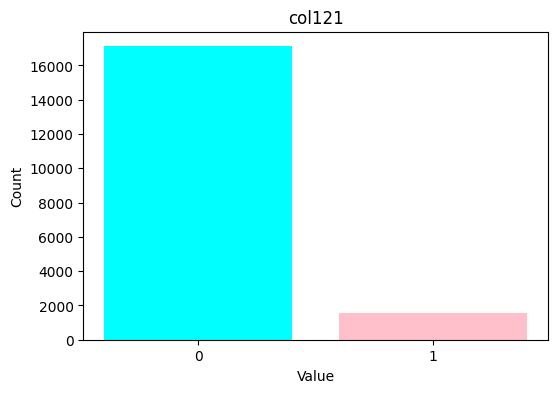

In [ ]:
# Renk paleti
colors = ['cyan', 'pink']

#  binary_feats için histogramları çizme
for feature in twouniquevalue:
    plt.figure(figsize=(6, 4))
    counts = np.bincount(train[feature])
    labels = ['0', '1']
    plt.bar(labels, counts, color=colors)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()



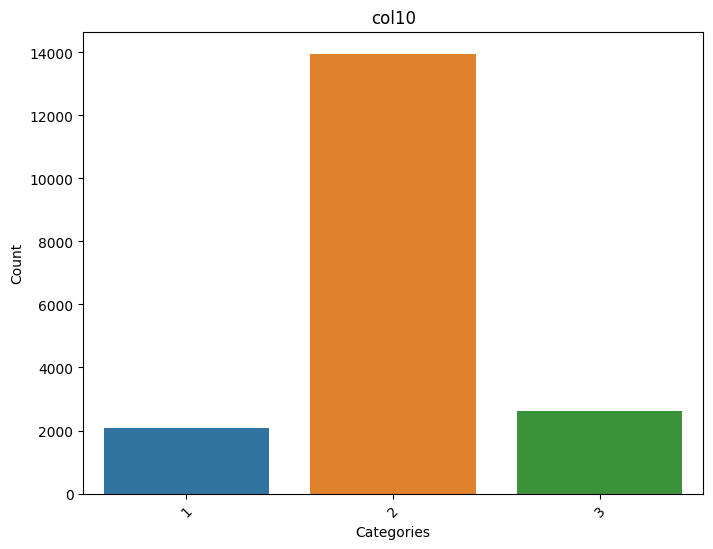

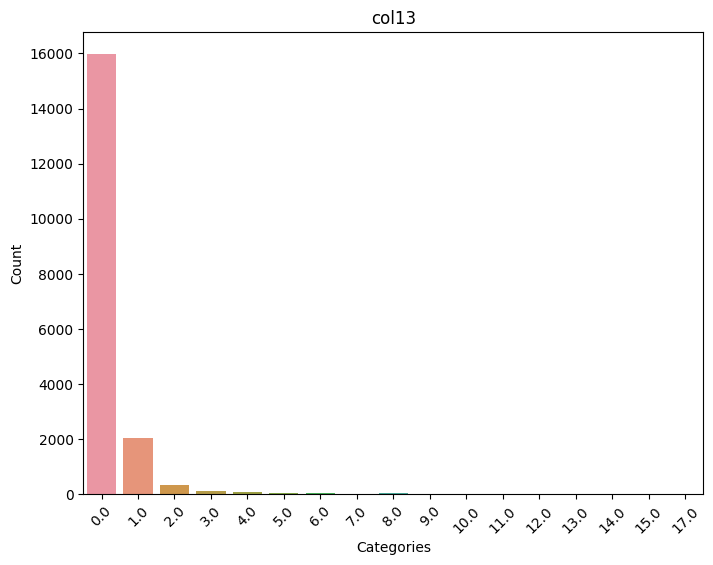

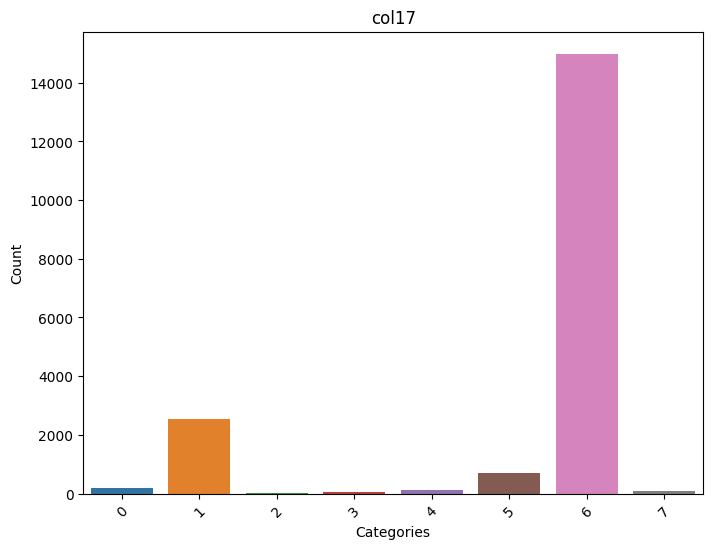

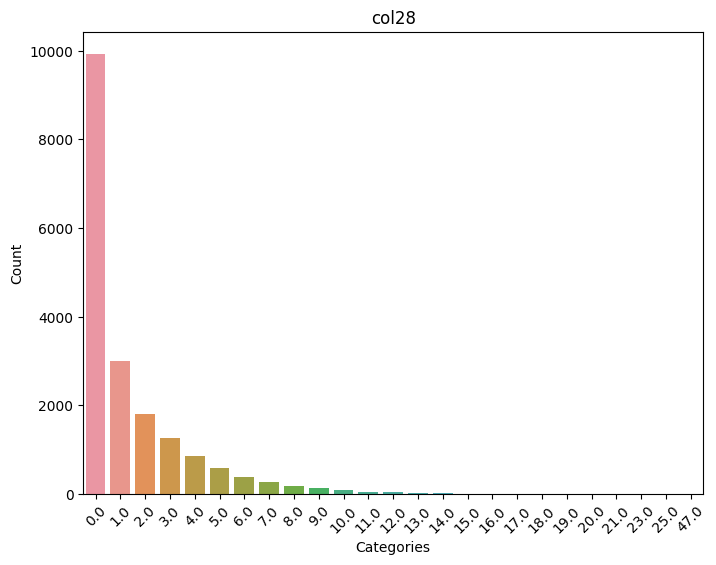

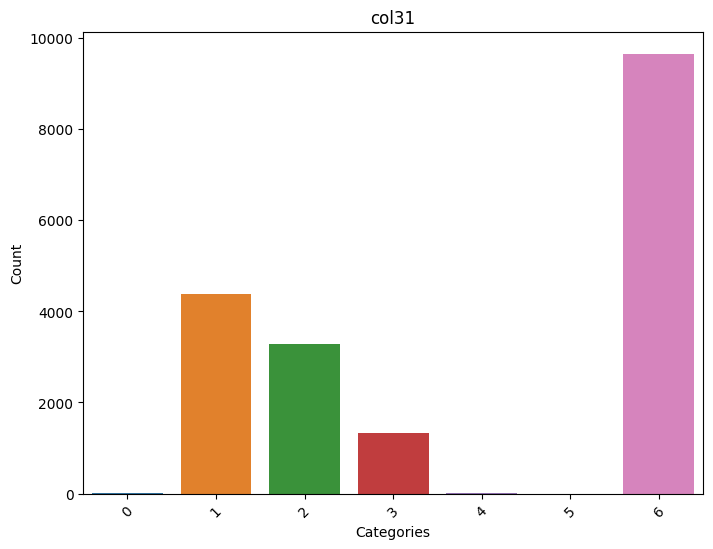

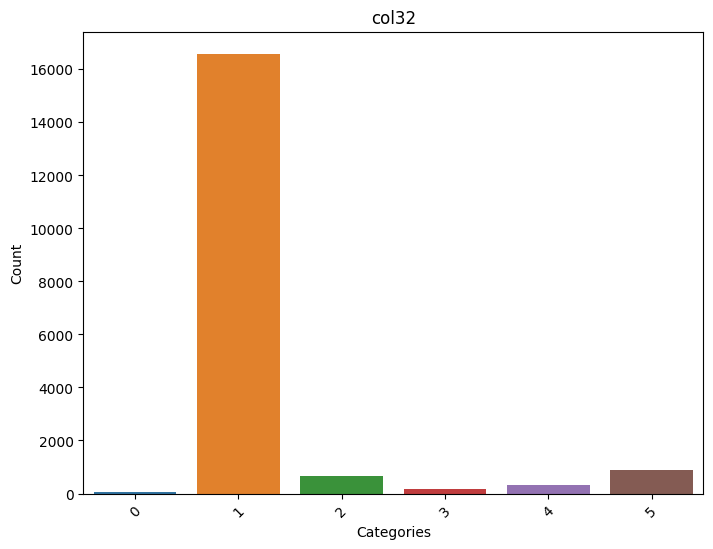

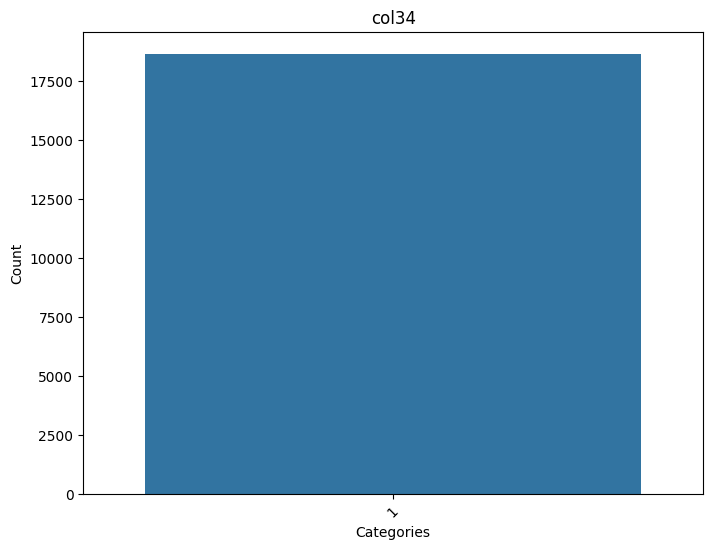

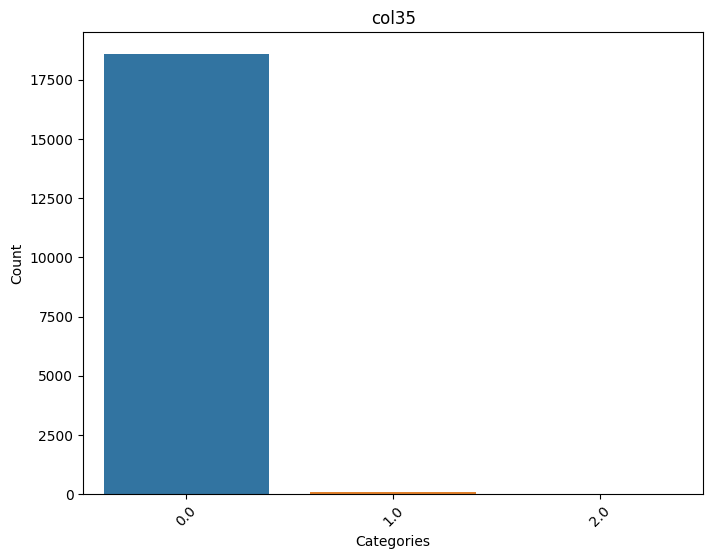

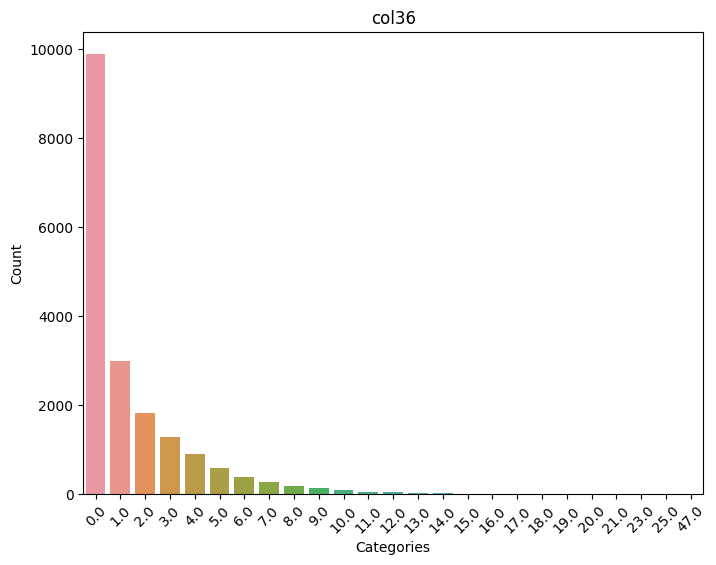

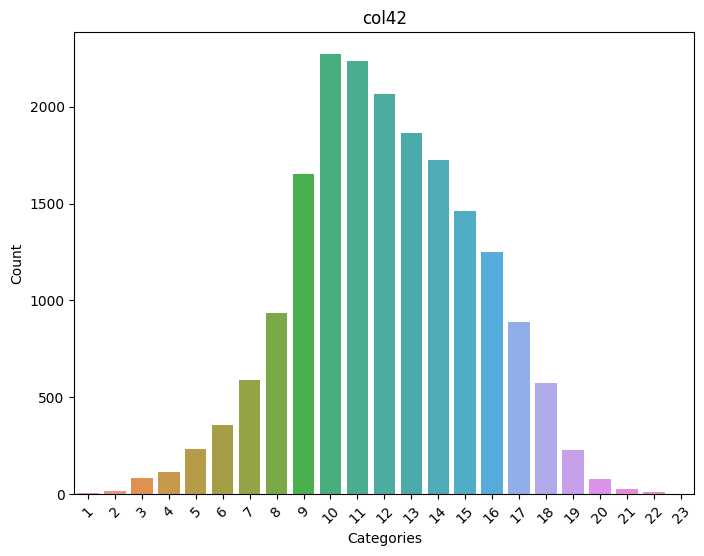

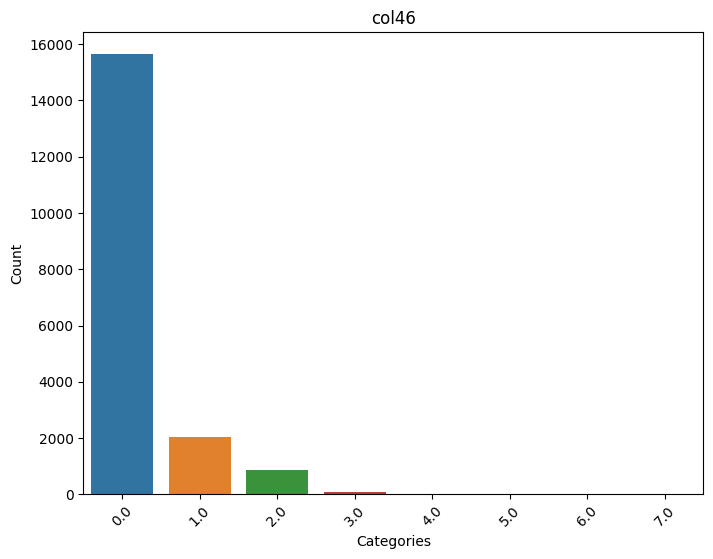

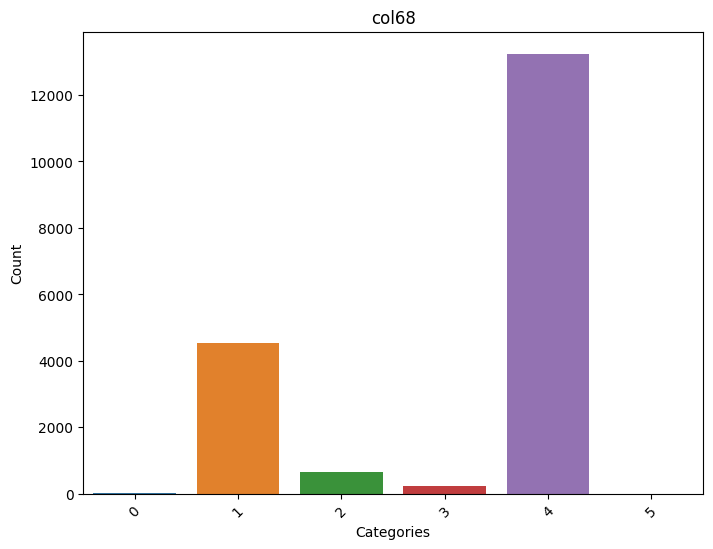

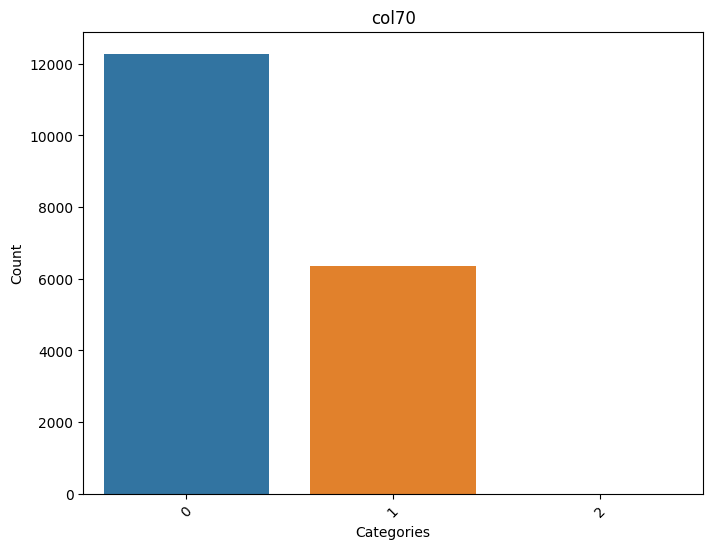

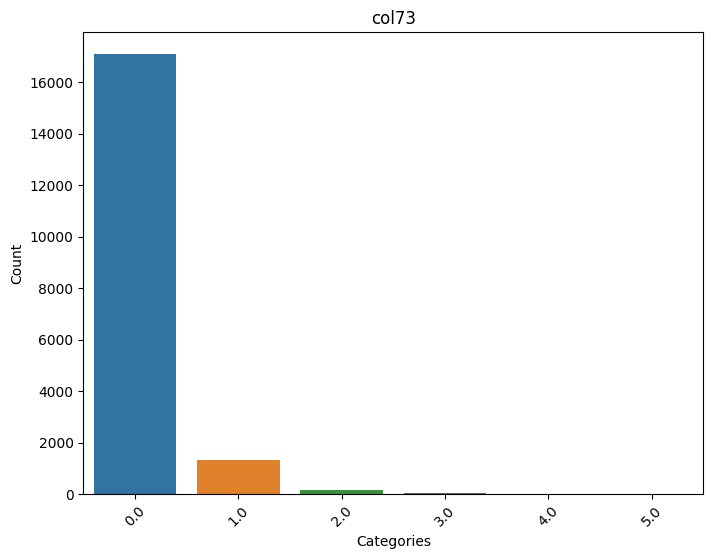

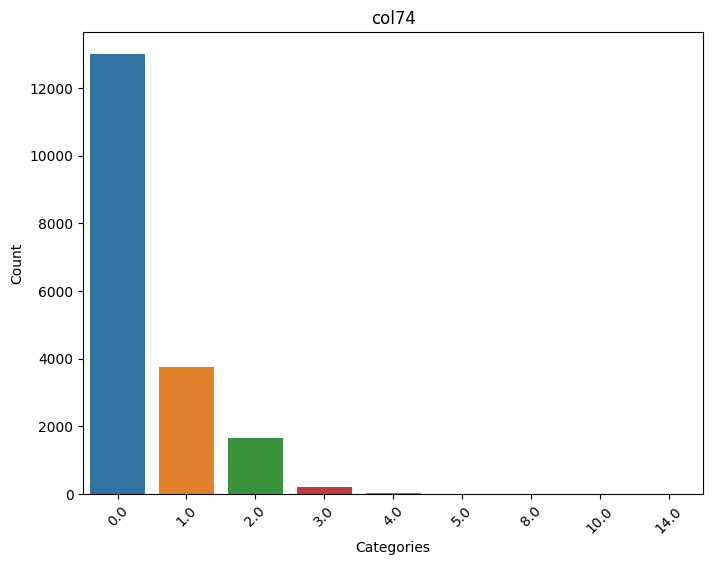

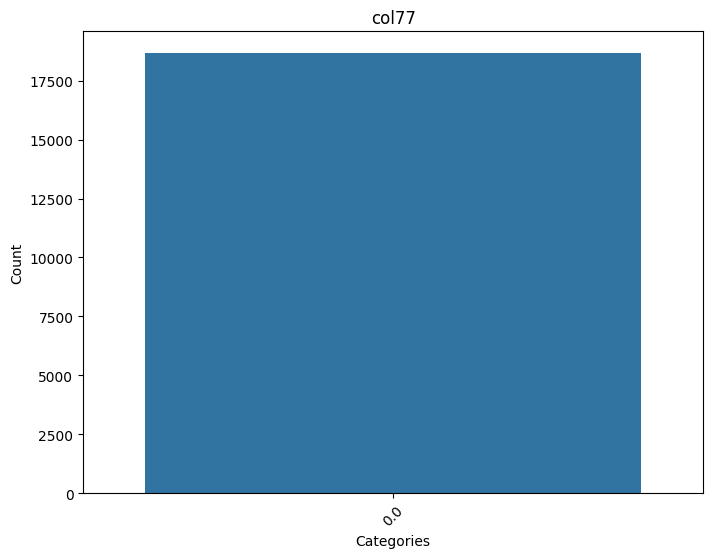

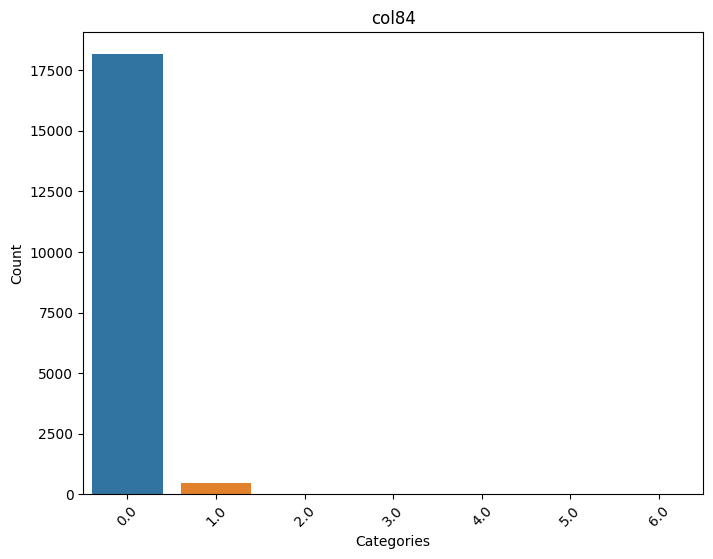

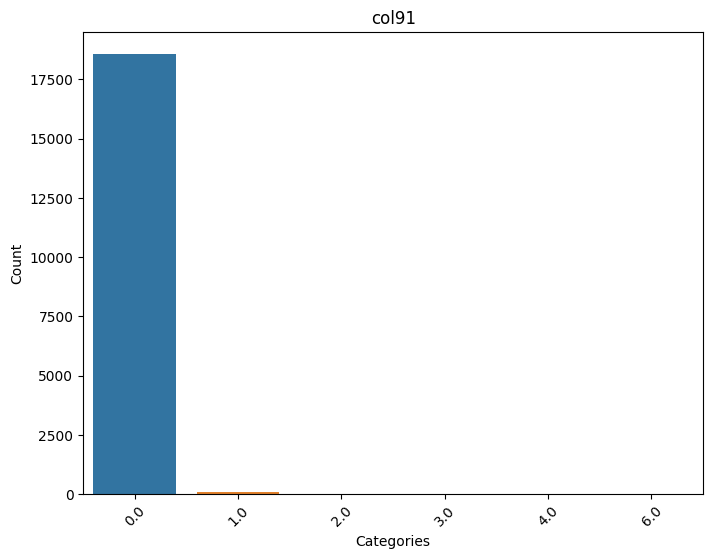

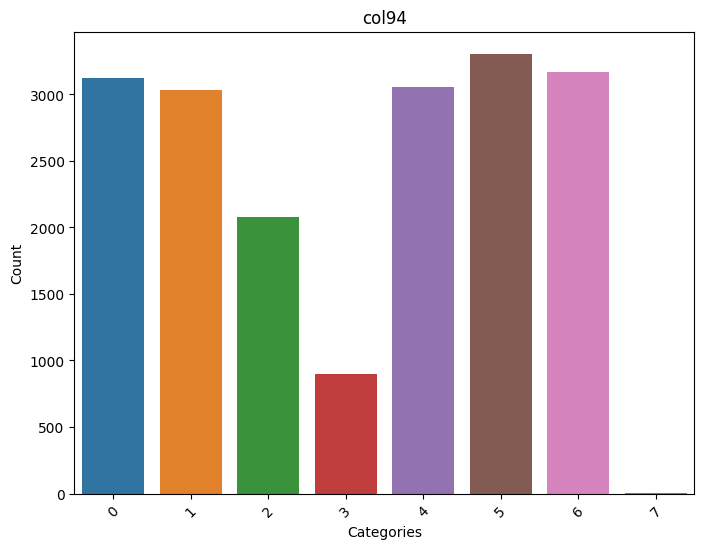

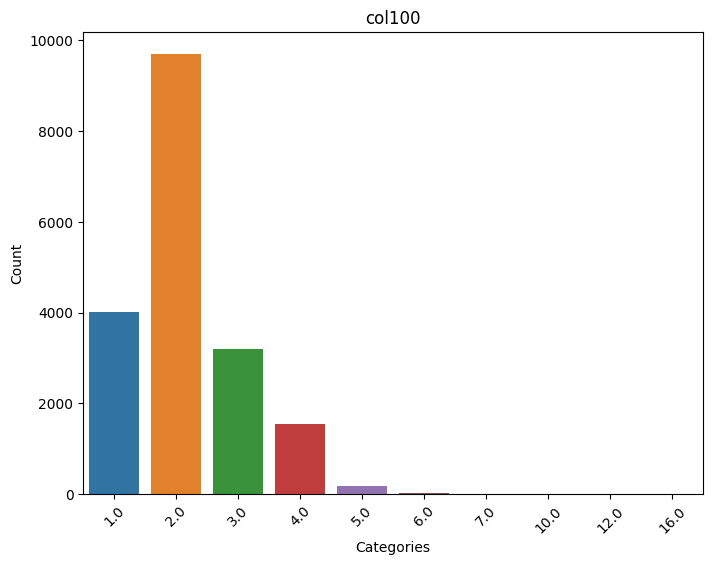

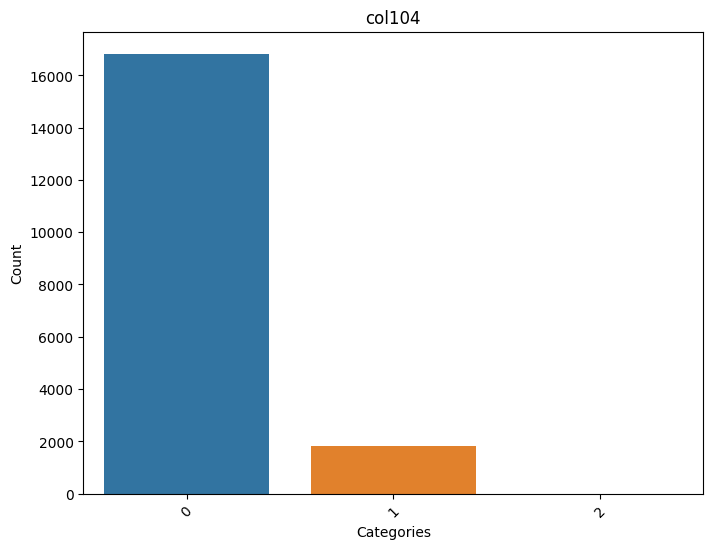

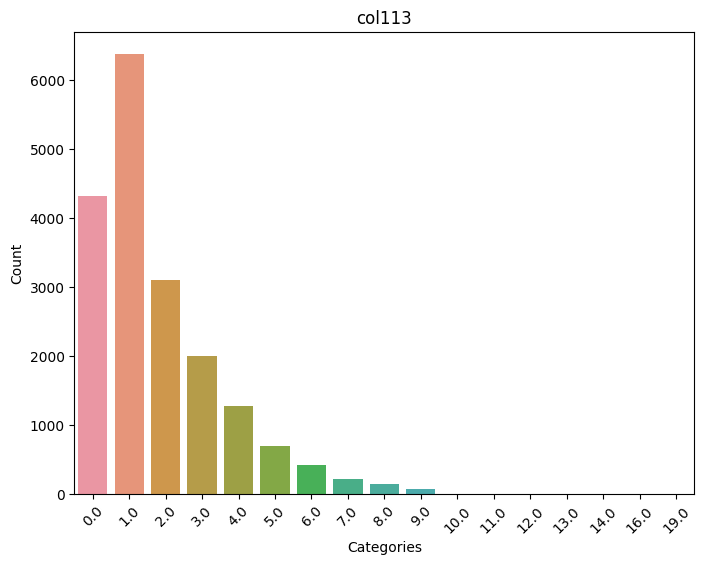

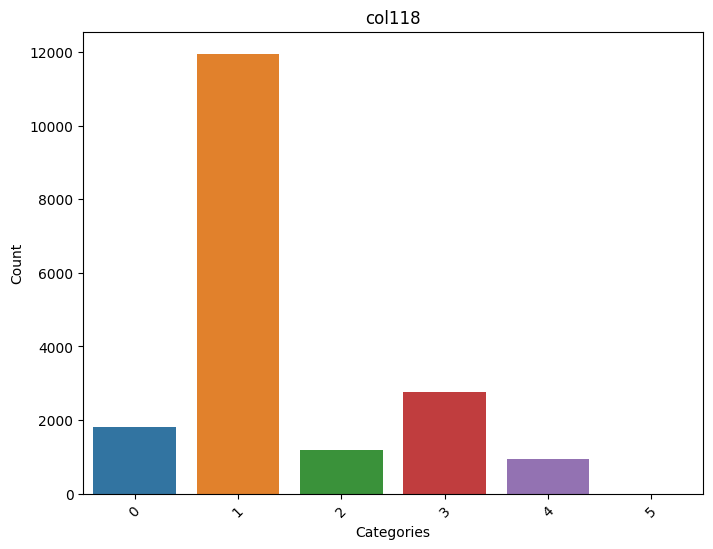

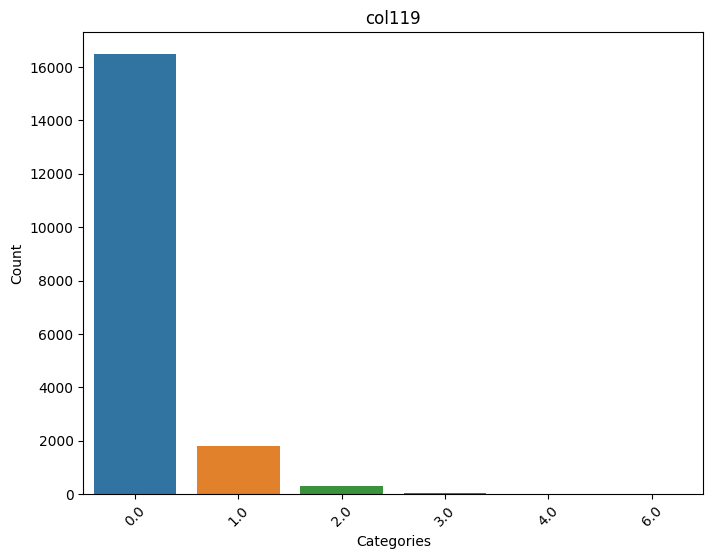

In [ ]:
# Dört kategori (categorical) özelliğinin plotunu çizme
for feature in leftover:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=train)
    plt.title(feature)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Veri Setini Hazırlama:

Train dosyanızı özellik matrisi (X) ve hedef değişken (y) olarak ayırın.
Eğer kategorik özellikler varsa, bunları sayısal değerlere dönüştürün veya kodlayın.
Eksik verileri doldurun veya çıkartın.
Veri setini train ve test kümelerine ayırın. 

Veri setini hazırlamak için aşağıdaki adımları takip edebilirsiniz:

Özellik Matrisi (X) ve Hedef Değişken (y) Ayırma:
Train dosyanızdaki özellikleri (bağımsız değişkenleri) X olarak ayırın.
Hedef değişkeni (bağımlı değişkeni) y olarak ayırın.



Preparing the Data Set:

Split your train file into feature matrix (X) and target variable (y). If there are categorical properties, convert them to numeric values or encode them. Fill in or subtract missing data. Split the dataset into train and test sets.

You can follow the steps below to prepare the dataset:

Feature Matrix (X) and Target Variable (y) Separation: Separate the features (arguments) in your Train file by X. Split the target variable (dependent variable) into y

In [ ]:
train.shape

(246008, 65)

In [ ]:
train.head()

col1  col2  col6  col7  col9  col10  col13     col14  col16  col17  ...  \
0   69769  -946     0     4     0      2    0.0  180000.0      0      6  ...   
1  236977   -92     1    30     0      3    0.0  135000.0      0      6  ...   
2  168821 -1646     0     5     0      2    0.0  553500.0      0      5  ...   
3   94708 -1651     0     5     0      2    0.0  391500.0      0      6  ...   
4   84556  -977     0    35     0      2    0.0  225000.0      0      6  ...   

   col105  col106  col107  col109  col113  col114  col117  col118  col121  \
0       1       0       0       0     1.0   -4670       0       1       0   
1       1       0       0       0     1.0   -1994       0       1       0   
2       1       0       0       0     2.0   -2842       0       3       0   
3       1       0       0       0     4.0   -1345       0       3       0   
4       1       0       0       0     1.0    -852       0       3       0   

   col122  
0       0  
1       0  
2       1  
3       1  
4       0  

[5 rows x 65 columns]

## Machine Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Veri setini özellikler (X) ve hedef değişken (y) olarak ayırma
X = train.drop(columns=['col122'])
y = train['col122']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42, stratify=y)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Doğruluk (accuracy) hesaplama
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Kesinlik (precision) hesaplama
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Duyarlılık (recall) hesaplama
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# F1-Score hesaplama
f1 = f1_score(y_test, predictions)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.8501483679525222
Precision: 0.1324832504862762
Recall: 0.15433031218529708
F1-Score: 0.142574717990464
ROC-AUC Score: 0.5327919524667365


In [ ]:

# X_train, X_test, y_train ve y_test'in şekillerini alın
X_train_shape = np.shape(X_train)
X_test_shape = np.shape(X_test)
y_train_shape = np.shape(y_train)
y_test_shape = np.shape(y_test)

print("X_train şekli: ", X_train_shape)
print("X_test şekli: ", X_test_shape)
print("y_train şekli: ", y_train_shape)
print("y_test şekli: ", y_test_shape)


X_train şekli:  (196806, 64)
X_test şekli:  (49202, 64)
y_train şekli:  (196806,)
y_test şekli:  (49202,)


In [ ]:
import joblib
# Modeli kaydetme
joblib.dump(model, '/content/drive/MyDrive/model.pkl')

model = joblib.load('/content/drive/MyDrive/model.pkl')

model.feature_names_ = X_train.columns

# İlgili satırın indeksini belirtin
satir_index = 24


# x_test DataFrame'inden satırı alın
satir = X.iloc[satir_index]
print(satir)

# Satırı tahmin etmek için modele besleyin
tahmin = model.predict([satir])

# Tahmini görüntüle
print(tahmin)


col1       71876.0
col2      365243.0
col6           0.0
col7          50.0
col9           0.0
            ...   
col113         3.0
col114     -4525.0
col117         0.0
col118         1.0
col121         0.0
Name: 24, Length: 64, dtype: float64
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:

# Veri setini özellikler (X) ve hedef değişken (y) olarak ayırma
X = train.drop(columns=['col122'])
y = train['col122']

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# Modeli eğitme işlemi burada gerçekleştirilir

# Eğitim veri seti üzerinde tahmin yapma
y_train_pred = model.predict(X_train)

# Eğitim veri seti doğruluğu
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim veri seti doğruluğu:", train_accuracy)

# Test veri seti üzerinde tahmin yapma
y_test_pred = model.predict(X_test)

# Test veri seti doğruluğu
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test veri seti doğruluğu:", test_accuracy)


Eğitim veri seti doğruluğu: 1.0
Test veri seti doğruluğu: 0.8506158286248526


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd



X = train.drop(columns=['col122'])
y = train['col122']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)


# Verileri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)

# Doğruluk (accuracy) hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Kesinlik (precision) hesaplama
precision1 = precision_score(y_test, y_pred)
print("Precision:", precision1)

# Duyarlılık (recall) hesaplama
recall1 = recall_score(y_test, y_pred)
print("Recall:", recall1)

# F1-Score hesaplama
f1_1 = f1_score(y_test, y_pred)
print("F1-Score:", f1_1)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.9191699524409577
Precision: 0.35384615384615387
Recall: 0.005811015664477008
F1-Score: 0.0114342530449913
ROC-AUC Score: 0.5024413578897047


In [ ]:
#burada bütün modelleri ımport ediyoruz.
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

#burada modelleri bir listenin içerisine alıp parametreleri ile beraber tanımlıyoruz.
models = []
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('MLPClassifier', MLPClassifier()))

#burada bir döngü vasıtasıyla tek tek bütün modelleri deneyerek sonuçları karşılaştırıyoruz. 
for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics

    print("%s -> ACC: %%%.2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Gradient Boosting Classifier -> ACC: %92.02
AdaBoostClassifier -> ACC: %92.03
BaggingClassifier -> ACC: %91.80
MLPClassifier -> ACC: %92.03


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

# Create an AdaBoostClassifier model
model = AdaBoostClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

predictions

NameError: ignored

In [ ]:
pd.DataFrame(data = predictions )

0
0      0
1      0
2      0
3      0
4      0
...   ..
49197  0
49198  0
49199  0
49200  0
49201  0

[49202 rows x 1 columns]

In [ ]:
import pandas as pd

# DataFrame'i oluşturun
predictions_df = pd.DataFrame(data=predictions)

# DataFrame'i Excel dosyasına dönüştürmek ve indirmek için BytesIO kullanın
from io import BytesIO

excel_file = BytesIO()
predictions_df.to_excel(excel_file, index=False)

# Dosyayı indirme
import os

dosya_yolu = "/content/drive/MyDrive/predictions.csv"
with open(dosya_yolu, 'wb') as f:
    f.write(excel_file.getbuffer())

print("Excel dosyası indirildi: ", dosya_yolu)


Excel dosyası indirildi:  /content/drive/MyDrive/predictions.csv


In [ ]:


# Doğruluk (accuracy) hesaplama
accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

# Kesinlik (precision) hesaplama
precision1 = precision_score(y_test, predictions)
print("Precision:", precision1)

# Duyarlılık (recall) hesaplama
recall1 = recall_score(y_test, predictions)
print("Recall:", recall1)

# F1-Score hesaplama
f1_1 = f1_score(y_test, predictions)
print("F1-Score:", f1_1)


Accuracy: 0.9193935205885939
Precision: 0.47058823529411764
Recall: 0.01616978271854472
F1-Score: 0.03126526624328285


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Accuracy:", accuracy)

# Doğruluk (accuracy) hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Kesinlik (precision) hesaplama
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Duyarlılık (recall) hesaplama
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-Score hesaplama
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC Score:", roc_auc)

K-Nearest Neighbors Accuracy: 0.9169749197187106
Accuracy: 0.9169749197187106
Precision: 0.13387978142076504
Recall: 0.012837306785433586
F1-Score: 0.02342816160650251
ROC-AUC Score: 0.5032050939955423


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

# Create an AdaBoostClassifier model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Doğruluk (accuracy) hesaplama
accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

# Kesinlik (precision) hesaplama
precision1 = precision_score(y_test, predictions)
print("Precision:", precision1)

# Duyarlılık (recall) hesaplama
recall1 = recall_score(y_test, predictions)
print("Recall:", recall1)

# F1-Score hesaplama
f1_1 = f1_score(y_test, predictions)
print("F1-Score:", f1_1)

roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9221373114914028
Precision: 0.4
Recall: 0.007335603877390621
F1-Score: 0.014406997684589657
ROC-AUC Score: 0.5032050939955423


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

model = BaggingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Doğruluk (accuracy) hesaplama
accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

# Kesinlik (precision) hesaplama
precision1 = precision_score(y_test, predictions)
print("Precision:", precision1)

# Duyarlılık (recall) hesaplama
recall1 = recall_score(y_test, predictions)
print("Recall:", recall1)

# F1-Score hesaplama
f1_1 = f1_score(y_test, predictions)
print("F1-Score:", f1_1)

Accuracy: 0.9193731962115361
Precision: 0.2641509433962264
Recall: 0.02200681163217186
F1-Score: 0.04062877871825876


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 0)

model = MLPClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Doğruluk (accuracy) hesaplama
accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

# Kesinlik (precision) hesaplama
precision1 = precision_score(y_test, predictions)
print("Precision:", precision1)

# Duyarlılık (recall) hesaplama
recall1 = recall_score(y_test, predictions)
print("Recall:", recall1)

# F1-Score hesaplama
f1_1 = f1_score(y_test, predictions)
print("F1-Score:", f1_1)

Accuracy: 0.9202606940097287
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Veri setini özellikler (X) ve hedef değişken (y) olarak ayırma
X = train.drop(columns=['col122'])
y = train['col122']

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

# Modeli eğitme işlemi burada gerçekleştirilir
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(x_test)

score= accuracy_score(y_test,predictions)
score

0.8509410186577782

In [ ]:

from sklearn.tree import DecisionTreeClassifier
import joblib

# Modeli oluşturma ve eğitme işlemi
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Modeli kaydetme
joblib.dump(model, 'model.pkl')


# Modeli yükleme
model = joblib.load('model.pkl')

# Tahminler yapma
predictions = model.predict(X_test)
predictions



array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Veri setini özellikler ve hedef değişken olarak ayırma
X = train.drop(columns=['col122'])
y = train['col122']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE'u kullanarak eğitim setini dengeleme
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Eğitim setinin boyutunu kontrol etme
print("Eğitim seti örnek sayısı (önce):", len(X_train))
print("Eğitim seti örnek sayısı (sonra):", len(X_train_resampled))

# Modelinizi eğitme
model.fit(X_train_resampled, y_train_resampled)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Metrikleri hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Sonuçları yazdırma
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)


Eğitim seti örnek sayısı (önce): 196806
Eğitim seti örnek sayısı (sonra): 361808
Accuracy: 0.8235031096296899
Precision: 0.1162715167262098
Recall: 0.18089944416371906
F1-Score: 0.14155792803479633
ROC-AUC Score: 0.5303091509564064


In [ ]:
# Özelliklerin ve hedef değişkenin ayrıştırılması
X = train.drop(columns=['col122'])  # Hedef değişkeni çıkarın
y = train['col122']  # Hedef değişkeni ayırın

# Veri setini eğitim ve test kümelerine ayırma (stratifikasyon uygulayarak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Eğitim ve test kümelerinin sınıf dağılımını kontrol edelim
print("Eğitim kümesi sınıf dağılımı:")
print(y_train.value_counts())

print("Test kümesi sınıf dağılımı:")
print(y_test.value_counts())


Eğitim kümesi sınıf dağılımı:
0    180918
1     15888
Name: col122, dtype: int64
Test kümesi sınıf dağılımı:
0    45230
1     3972
Name: col122, dtype: int64


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X: Özellikler, y: Hedef değişken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SMOTE ile oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Oversampling sonrası sınıf dağılımı kontrolü
print("Eğitim kümesi sınıf dağılımı:")
print(y_train_resampled.value_counts())

print("Test kümesi sınıf dağılımı:")
print(y_test.value_counts())


Eğitim kümesi sınıf dağılımı:
0    180763
1    180763
Name: col122, dtype: int64
Test kümesi sınıf dağılımı:
0    45385
1     3817
Name: col122, dtype: int64


In [ ]:
# Veri setini özellikler (X) ve hedef değişken (y) olarak ayırma
X = train.drop(columns=['col122'])
y = train['col122']

# Eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

# Modeli eğitme işlemi burada gerçekleştirilir
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions= model.predict(x_test)

score= accuracy_score(y_test,predictions)
score

In [ ]:

# Makine öğrenimi modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
predictions = model.predict(X_test)

LinearRegression sınıfını kullanarak bir doğrusal regresyon modeli oluşturuyoruz ve fit fonksiyonunu kullanarak eğitim verileriyle modeli eğitiyoruz.

Son olarak, predict fonksiyonunu kullanarak modeli test verileri üzerinde çalıştırıyoruz ve tahminleri predictions değişkenine atıyoruz. Tahminleri değerlendirmek için ilgili hata metriklerini kullanabilirsiniz.

In [ ]:
predictions

array([-0.02987066,  0.11407562,  0.20521357, ..., -0.01640365,
       -0.00778357,  0.21472357])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Tahminleri değerlendirme
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.06995603244194364
R-squared (R2): 0.05429888689075468


Yukarıdaki kodda, mean_squared_error ve r2_score fonksiyonlarını scikit-learn kütüphanesinden alıyoruz. Bu fonksiyonları kullanarak gerçek hedef değerleri (y_test) ve modelin yaptığı tahminleri (predictions) karşılaştırıyoruz.

Elde ettiğimiz mse ve r2 değerlerini ekrana bastırarak tahmin performansını değerlendirebiliriz. MSE değeri ne kadar düşükse, modelin tahminleri gerçek değerlere o kadar yakın demektir. R2 değeri ise modelin veri setindeki değişkenliği ne kadar açıkladığını gösterir. R2 değeri 1'e ne kadar yakınsa, modelin verileri daha iyi açıkladığı anlamına gelir.

İhtiyaçlarınıza göre farklı hata metriklerini de kullanabilirsiniz. Scikit-learn kütüphanesinde farklı metrikler mevcuttur ve belirli bir problem bağlamına uygun olanları seçebilirsiniz.

Elde ettiğiniz sonuçlara göre, elde edilen hata metrikleri ve R-kare değeri hakkında şunları söyleyebiliriz:

Mean Squared Error (MSE): MSE, tahminlerinizin gerçek değerlerden ne kadar uzak olduğunu ölçen bir hata metriğidir. MSE değeri ne kadar düşükse, modelinizin tahminleri gerçek değerlere o kadar yakındır. MSE'nin kendine özgü bir birimı yoktur ve değerler genellikle orijinal hedef değişkenin ölçü birimine bağlı olarak yorumlanır. MSE değeri küçük olduğunda, modelin tahminleri daha iyi bir şekilde uyarlanmış demektir.

R-squared (R2): R-kare değeri, modelin bağımsız değişkenler tarafından açıklanan toplam varyansın yüzdesini temsil eder. R2 değeri 0 ile 1 arasında değişir. 1'e yaklaştıkça, modelin bağımsız değişkenlerin hedef değişkeni açıklama yeteneği artar. R2 değeri 0'ın altında olabilir, bu durumda model, veriyi tahmin etme yetenezinden daha kötüdür. Verilerin karmaşıklığına bağlı olarak, R2 değeri farklı yorumlar gerektirebilir. R2 değeri düşükse, modelin verileri açıklama gücü düşüktür.

Bu durumda, MSE değeri 0.07 olarak hesaplanmış ve R2 değeri 0.054 olarak bulunmuştur. MSE değeri oldukça düşük olduğu için modelinizin tahminleri gerçek değerlere yakın bir şekilde uyum sağladığını söyleyebiliriz. Ancak, R2 değeri oldukça düşük olduğu için modelin bağımsız değişkenler tarafından açıklanan varyansın düşük olduğunu gösterir. Bu durumda, modelin verileri açıklama gücünün sınırlı olduğunu ifade eder.

In [ ]:

# Özelliklerin ve hedef değişkenin ayrıştırılması
X = train.drop(columns=['col122'])  # Hedef değişkeni çıkarın
y = train['col122']  # Hedef değişkeni ayırın

# Veri setini eğitim ve test kümelerine ayırma (stratifikasyon uygulayarak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Eğitim ve test kümelerinin sınıf dağılımını kontrol edelim
print("Eğitim kümesi sınıf dağılımı:")
print(y_train.value_counts())

print("Test kümesi sınıf dağılımı:")
print(y_test.value_counts())


Eğitim kümesi sınıf dağılımı:
0    180918
1     15888
Name: col122, dtype: int64
Test kümesi sınıf dağılımı:
0    45230
1     3972
Name: col122, dtype: int64


Verdiğiniz çıktılara bakarak stratifikasyonun doğru bir şekilde uygulandığını söyleyebiliriz. Eğitim ve test kümelerinin sınıf dağılımları, orijinal veri setindeki sınıf dağılımına benzerlik gösteriyor. 

Eğitim kümesinde sınıf 0'a ait örnek sayısı 180.918, sınıf 1'e ait örnek sayısı ise 15.888'dir. Test kümesinde ise sınıf 0'a ait örnek sayısı 45.230, sınıf 1'e ait örnek sayısı ise 3.972'dir. Bu dağılımlar, orijinal veri setindeki sınıf dağılımına yakın olduğunu gösteriyor.

Sonuç olarak, eğitim ve test kümelerinin sınıf dağılımları, stratifikasyonun doğru bir şekilde uygulandığını doğruluyor. Stratifikasyon sayesinde eğitim ve test kümeleri, orijinal veri setinin sınıf oranlarını koruyarak oluşturulmuştur.


In [ ]:
# Tahmin sonuçlarını ve gerçek değerleri yan yana gösterme
results = pd.DataFrame({'Gerçek Değer': y_test, 'Tahmin Sonucu': y_pred})
print(results)


        Gerçek Değer  Tahmin Sonucu
151273             0              0
11983              0              0
13216              0              0
238516             0              0
114515             0              0
...              ...            ...
75198              0              1
63848              0              0
156823             0              1
8988               0              0
100521             0              0

[196807 rows x 2 columns]


Stratify, veri kümesini belirli bir özellik veya sınıf bazında dengeli bir şekilde bölmenizi sağlayan bir yöntemdir. Bu yöntem, veri kümesinin bir sınıf veya özellik dağılımını korumak için kullanılabilir. Örneğin, bir sınıflandırma probleminde, veri kümesindeki sınıf oranlarını korumak isteyebilirsiniz


In [ ]:
class_counts = train['col122'].value_counts()
total_samples = len(train['col122'])

class_percentages = class_counts / total_samples * 100
print("Sınıf Dağılımı Yüzdelikleri:")
print(class_percentages)

#Data is inbalance

Sınıf Dağılımı Yüzdelikleri:
0    91.927092
1     8.072908
Name: col122, dtype: float64


frÖrnek olarak, bir veri kümesi üzerinde çalıştığımızı varsayalım ve bu veri kümesinde X özellikleri ve y hedef değişkeni bulunmaktadır. Bu veri kümesini eğitim ve test verilerine ayırmak istiyoruz.

train_test_split(X, y, test_size=0.2, random_state=42) kodunu kullanarak, veri kümesini %80 eğitim verisi ve %20 test verisi olarak ayırabiliriz. Bu kod, test_size=0.2 parametresiyle test verilerinin oranını %20 olarak belirler.

Ayrıca, random_state=42 parametresiyle de verilerin rastgele bölünmesinde kullanılacak olan sayıyı belirleriz. Bu sayı, 0 veya 42 olabilir veya başka bir sayı da olabilir. Ancak, önceden belirlenmiş örnekler olan 0 veya 42 gibi belirli sayılar önerilir.

Eğer random_state=0 olarak belirlersek, veri kümesi rastgele bölündüğünde her zaman aynı sonuçları alacağız. Ancak, random_state parametresinin başka bir sayı ile belirlenmesi durumunda, veriler farklı şekilde bölünebilir ve sonuçlar da değişebilir.

Özetle, train_test_split fonksiyonu kullanılarak veri kümesini eğitim ve test verilerine ayırmak için belirli bir rastgele bölünme yapmak istiyorsak, random_state parametresini belirleyerek aynı sonuçları elde edebiliriz. Ancak, bu parametrenin başka bir sayı ile belirlenmesi durumunda sonuçlar farklı olabilir.

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_lr = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Logistic Regression Accuracy:",accuracy_lr)


Logistic Regression Accuracy: 92.01


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy_gnb = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Gaussian NB Accuracy:",accuracy_gnb)

Gaussian NB Accuracy: 92.01


This code snippet is written to calculate the accuracy of the Gaussian Naive Bayes (GNB) classifier on a test dataset.

Here's how it works:

1. First, predictions of the classification model on a test dataset (`y_test`) are generated and stored in `y_pred`.

2. Then, the function `metrics.accuracy_score(y_test, y_pred)` is used to calculate the accuracy between the true classes and the predicted classes. This function returns the accuracy score as a percentage.

3. Finally, the accuracy value is rounded using the `round()` function and printed to the screen along with the `%` sign.

This code snippet is written to evaluate the performance of the GNB classifier on a dataset. Accuracy represents the percentage of correct predictions made by the model and is a commonly used evaluation metric in classification problems. A high accuracy value indicates the model's ability to correctly predict the classes, while a low accuracy value suggests weaker performance of the model.

This code snippet is used to assess the accuracy of the GNB classifier and understand its performance.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

# Create new target variable y_new
y_new = np.where(y == 1, 0.5, y)

# Perform train-test split with stratification on y_new
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y_new)
#veri setini eğitim ve test kümelerine bölerek makine öğrenimi modellerinizi eğitebilir ve performanslarını değerlendirebilir.

In [ ]:
#karar ağacı sııfladırması oluşturduk
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#modeli kullaarak tahmi ya
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8558027338515143


In [ ]:
X = train.drop('col122', axis=1)  # Hedef değişkeni hariç tutarak özellik matrisi oluşturun
y = train['col122']  # Hedef değişkeni ayırın

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8558027338515143


In [ ]:
from sklearn import metrics

In [ ]:
accuracy_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Decision Tree Accuracy:",accuracy_dt)

Decision Tree Accuracy: 85.58


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Decision Tree modelinizi oluşturun
decision_tree = DecisionTreeClassifier()

# Random Forest modelinizi oluşturun ve Decision Tree modelini kullanarak ensemble yapın
random_forest = RandomForestClassifier(n_estimators=10)

# Modelinizi eğitin
random_forest.fit(X_train, y_train)

# Tahminler yapın
y_pred = random_forest.predict(X_test)

# Modelin doğruluğunu değerlendirin
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.9190565532028947


In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

In [ ]:
# Modelinizi oluşturun ve eğitin
model = SVC()
model.fit(X_train, y_train)

# Train veri seti üzerinde tahmin yapın
y_pred_train = model.predict(X_train)

# Recall değerini hesaplayın
recall_train = recall_score(y_train, y_pred_train)

# Precision değerini hesaplayın
precision_train = precision_score(y_train, y_pred_train)

print("Train Recall:", recall_train)
print("Train Precision:", precision_train)

We understand that Train Recall: 0.0 and Train Precision: 0.0 results indicate that there are no correct predictions or that the classification algorithm did not correctly predict any positive samples.

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3434
         1.0       0.00      0.00      0.00       297

    accuracy                           0.92      3731
   macro avg       0.46      0.50      0.48      3731
weighted avg       0.85      0.92      0.88      3731



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Accuracy:", accuracy)


K-Nearest Neighbors Accuracy: 0.9150361833288663


In [ ]:
# create a RandomForestClassifier object
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

# train the model on the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9224218527702126


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Doğruluk (accuracy) hesaplama
accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

# Kesinlik (precision) hesaplama
precision1 = precision_score(y_test, predictions)
print("Precision:", precision1)

# Duyarlılık (recall) hesaplama
recall1 = recall_score(y_test, predictions)
print("Recall:", recall1)

# F1-Score hesaplama
f1_1 = f1_score(y_test, predictions)
print("F1-Score:", f1_1)

Accuracy: 0.9222592577537498
Precision: 0.25
Recall: 0.001047943411055803
F1-Score: 0.002087138012001044


Feature Engineering

In [ ]:

from sklearn.preprocessing import PolynomialFeatures

# Örnek bir train veri seti
train = pd.DataFrame({'x1': [1, 2, 3], 'x2': [4, 5, 6]})

# Etkileşim özelliği oluşturma
train['interaction'] = train['x1'] * train['x2']

# Polinom özellikleri oluşturma
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train = poly_features.fit_transform(train)

# Dönüşüm özelliği oluşturma
train['x1_squared'] = np.square(train['x1'])

# Oluşturulan yeni özellikleri görüntüleme
print("Train Verisi:")
print(train)

print("Polinom Özellikleri:")
print(poly_train)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Eğitim ve test veri setlerinin ayrıştırılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model 1: Lineer Regresyon
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)

# Model 2: Karar Ağacı Regresyonu
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)

# Model 3: Rastgele Orman Regresyonu
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)

# MSE değerlerini karşılaştırma
print("Lineer regression MSE:", mse1)
print("decision tree regression MSE:", mse2)
print("random forest regression MSE:", mse3)


Lineer regression MSE: 0.06774325243793708
decision tree regression MSE: 0.1492622251128003
random forest regression MSE: 0.07006324133165316


random forest regression için elde ettiğiniz MSE değeri, tahminlerinizin gerçek değerlere olan ortalama karesel hata miktarını gösterir. MSE değeri ne kadar küçükse, modelin tahminlerinin gerçek değerlere daha yakın olduğunu gösterir.

TRANSFORMERLAR : STANDARDSCALER UYGULANDI. ŞİMDİ: NORMALIZATION,  Polynomial Transformation UYGULANACAK. 